In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# 1.  Section

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Loading the training dataset of house price.
df = pd.read_csv('train.csv')

In [4]:
# Loading the testing dataset of house price.
df_testing = pd.read_csv('test.csv')

In [5]:
df.shape

(1460, 81)

In [6]:
df_testing.shape

(1459, 80)

In [7]:
df_testing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
df = df.drop(['Id'], axis = 1)

In [9]:
# Open the file in read mode
f = open("data_description.txt", "r")

# Read the entire content of the file and print it
print(f.read())

# Close the file after reading
f.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# 2. Section

In [10]:
# first lets check for datatypes 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
def separate_columns_by_dtype(df):
    int_columns = df.select_dtypes(include=['int64']).columns.tolist()
    float_columns = df.select_dtypes(include=['float64']).columns.tolist()
    object_columns = df.select_dtypes(include=['object']).columns.tolist()

    return int_columns, float_columns, object_columns

In [12]:
int_columns, float_columns, object_columns = separate_columns_by_dtype(df)

In [13]:
print(int_columns,'int------float', float_columns,'float-------obj', object_columns)

['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'] int------float ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'] float-------obj ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageTy

In [14]:
def check_null(df, title):
    # Map NULL (NaN) values to 0 and non-null values to 1
    counts = pd.DataFrame({
        'NULL': df.isnull().sum(),      # Count NULLs directly
        'NON-NULL': df.notnull().sum()  # Count NON-NULLs directly
    })

    # Set a color palette
    sns.set_palette(['#ff9999', '#66b3ff'])  # Red for NULL and Blue for NON-NULL
    
    # Create the bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette())

    # Set plot title and labels
    plt.title(f'Count of NULL and NON-NULL Entries in the Dataset of {title}',)
    plt.xlabel('Features')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.yticks(fontsize=10,)

    # Adding counters at the top of each bar
    for i in ax.containers:
        ax.bar_label(i, label_type='center', fontsize=9, color='black')

    # Set plot layout to avoid overlap
    plt.tight_layout()

    # Customize legend
    legend = plt.legend(loc='upper right')
    legend.get_texts()[0].set_text('NULL')
    legend.get_texts()[1].set_text('NON-NULL')

    # Show the plot
    plt.show()


In [15]:
# now lets explore the each features and try to remove null values 

# Feature Engineering


## Feature Transformation
### missing value, handeling categorical features, outlaier ditiction, feature scaling

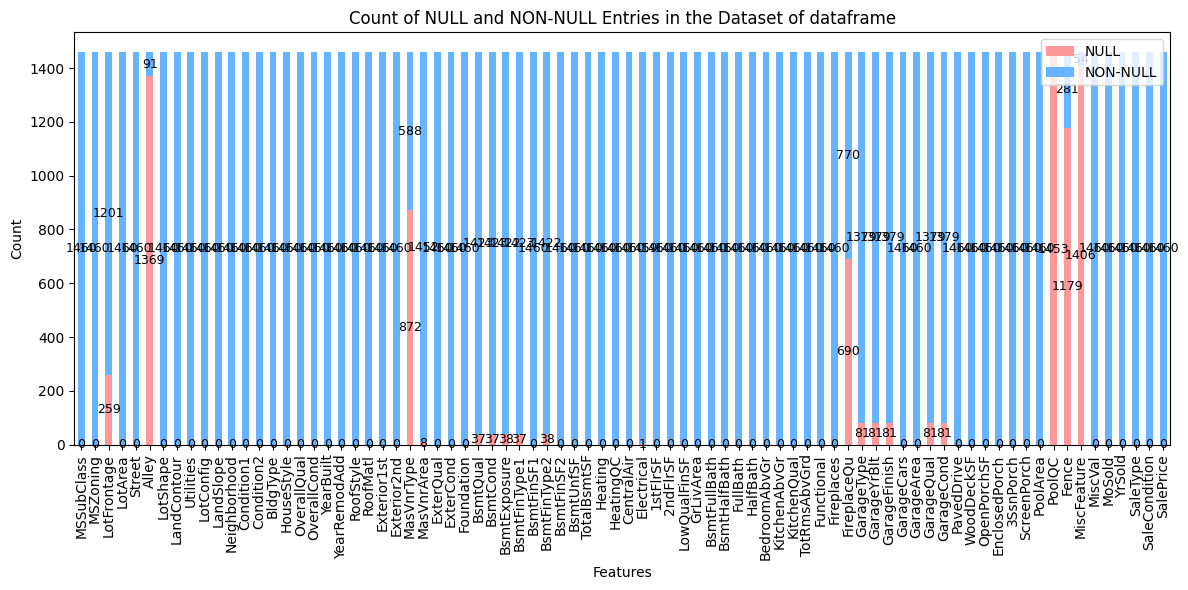

In [16]:
check_null(df, 'dataframe')

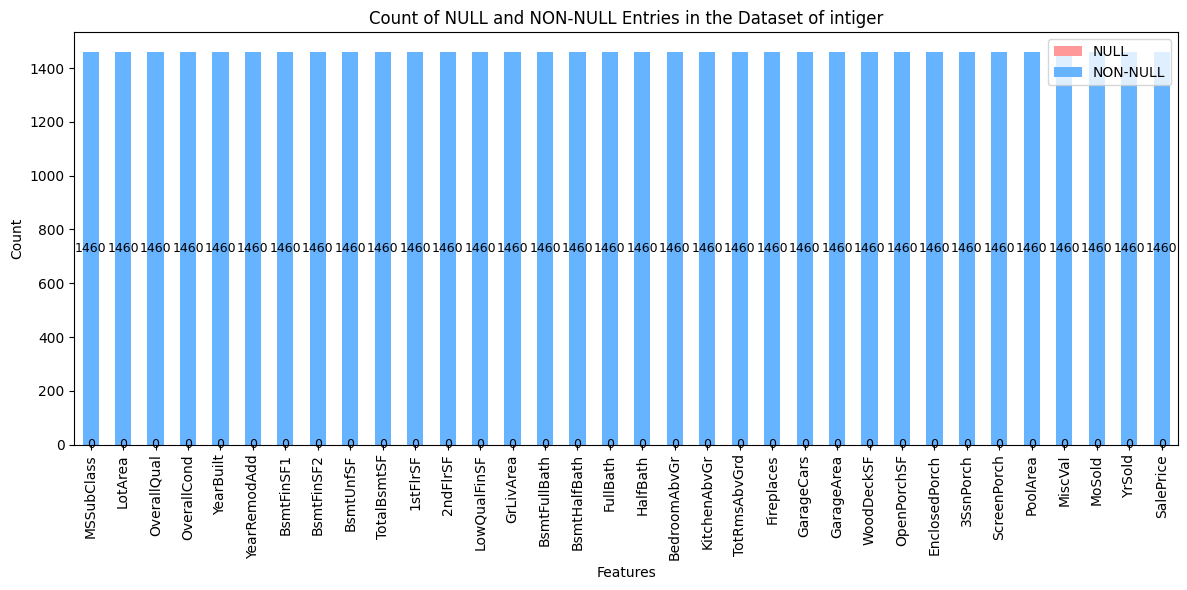

In [17]:
check_null(df[int_columns], 'intiger')

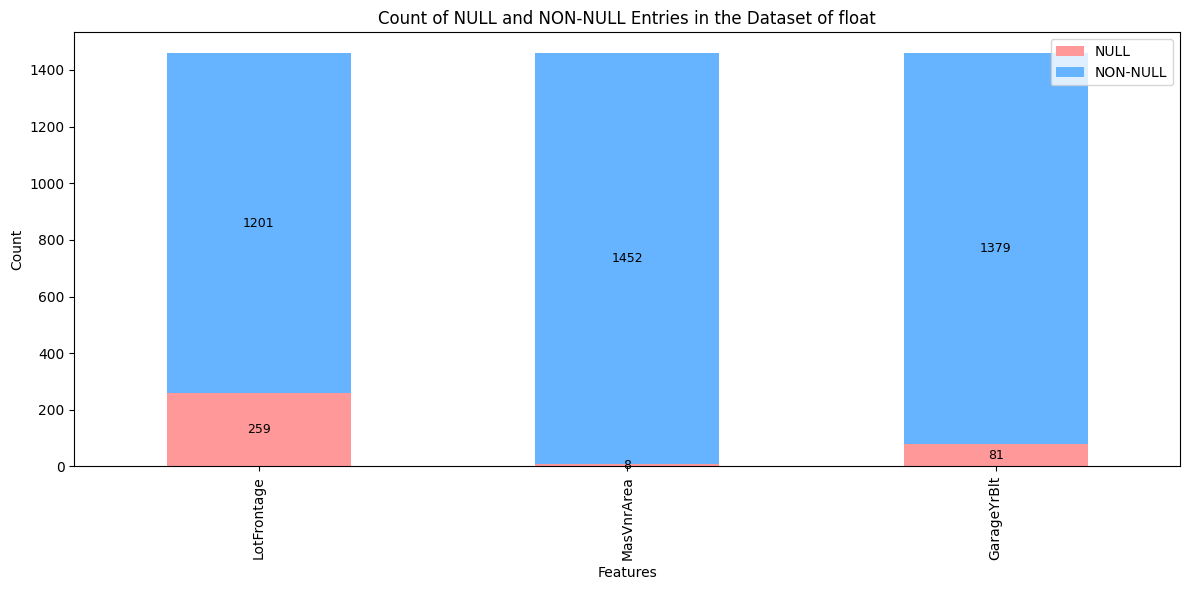

In [18]:
check_null(df[float_columns], 'float')

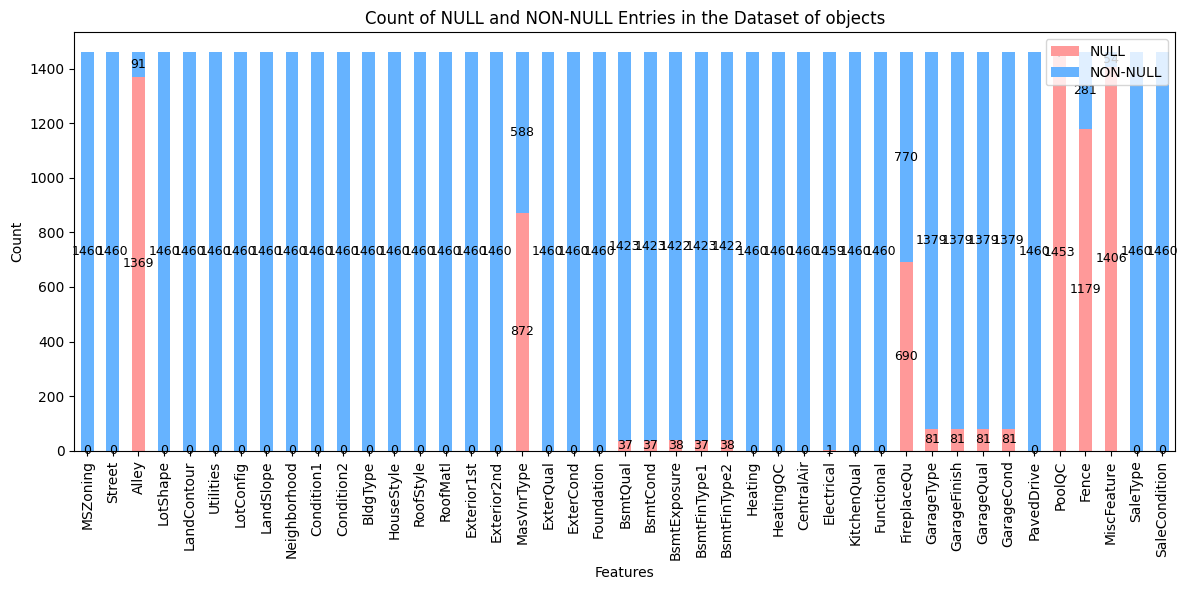

In [19]:
check_null(df[object_columns], 'objects')

In [20]:
### lets remove null and explore the numerical features 

In [21]:
def distribution_plot(df, feature):
    
    plt.figure(figsize=(6, 4), dpi=200)
    sns.histplot(df[feature], kde=True, linewidth=1.5)
    
    plt.title(f'Distribution of {feature}', fontsize=12)
    plt.xlabel(f'Range of {feature}', fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


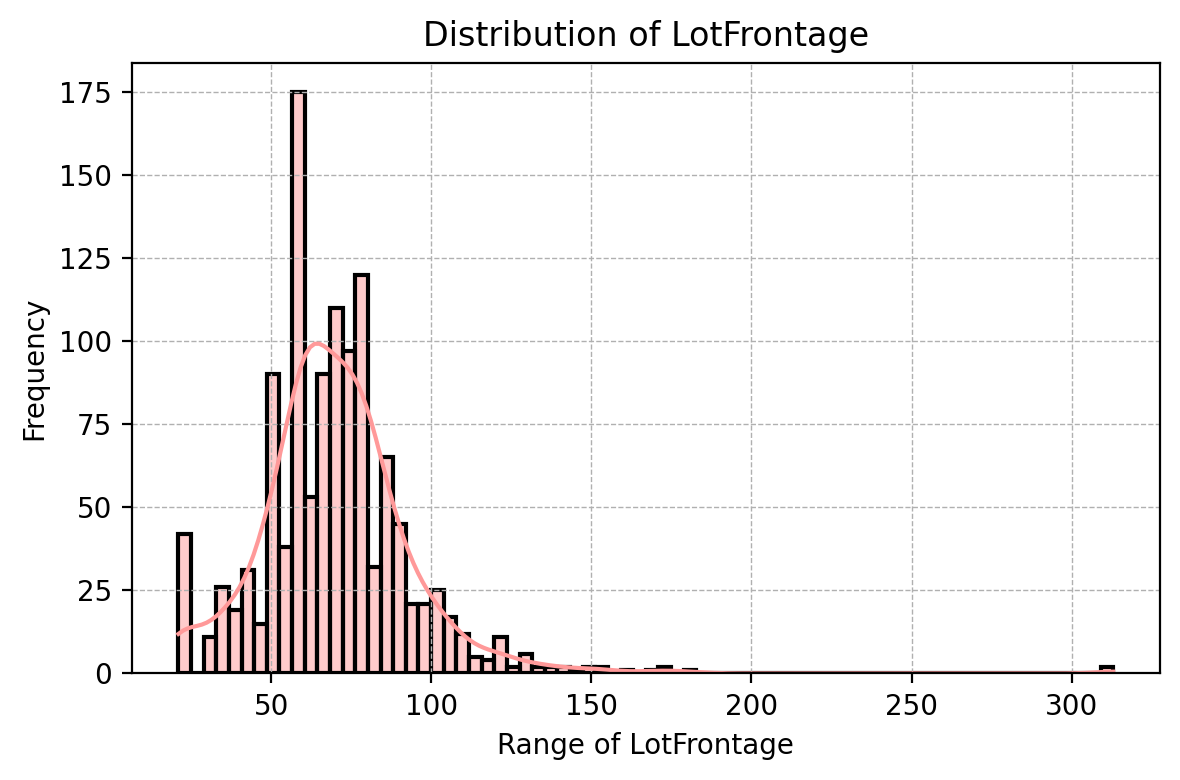

In [22]:
distribution_plot(df, 'LotFrontage')
    

In [191]:
# df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

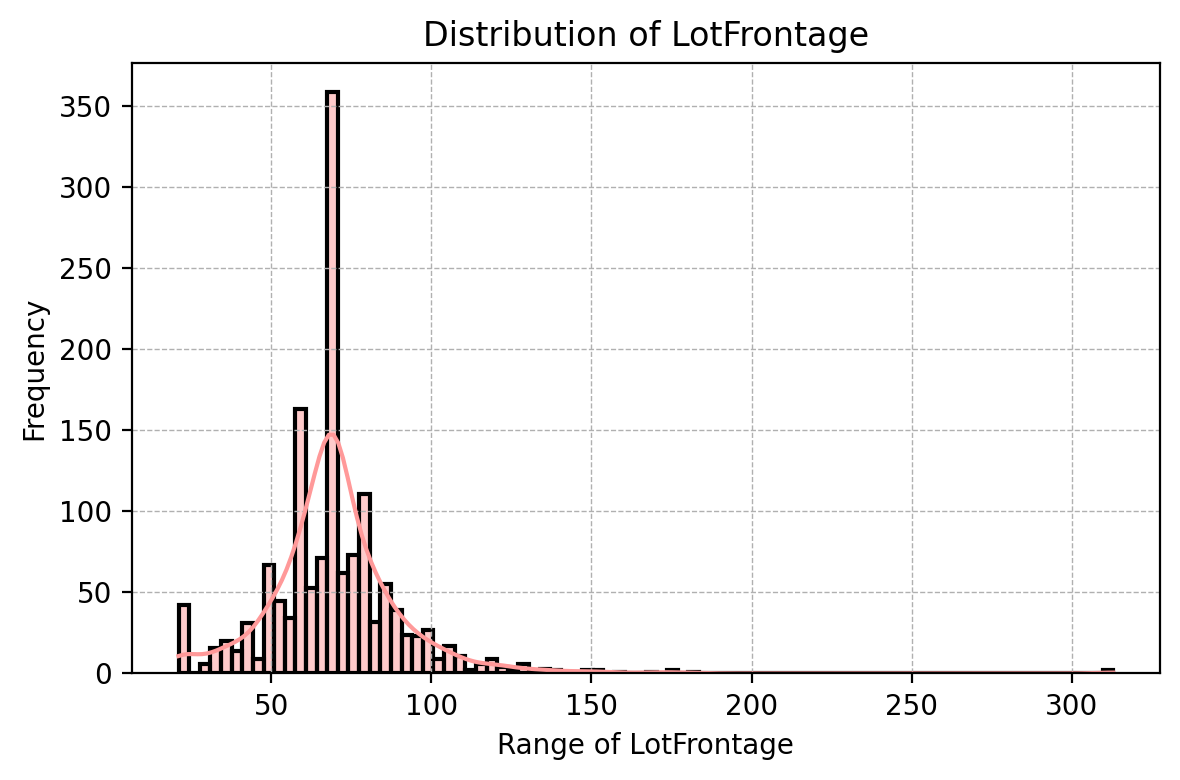

In [24]:
distribution_plot(df, 'LotFrontage')


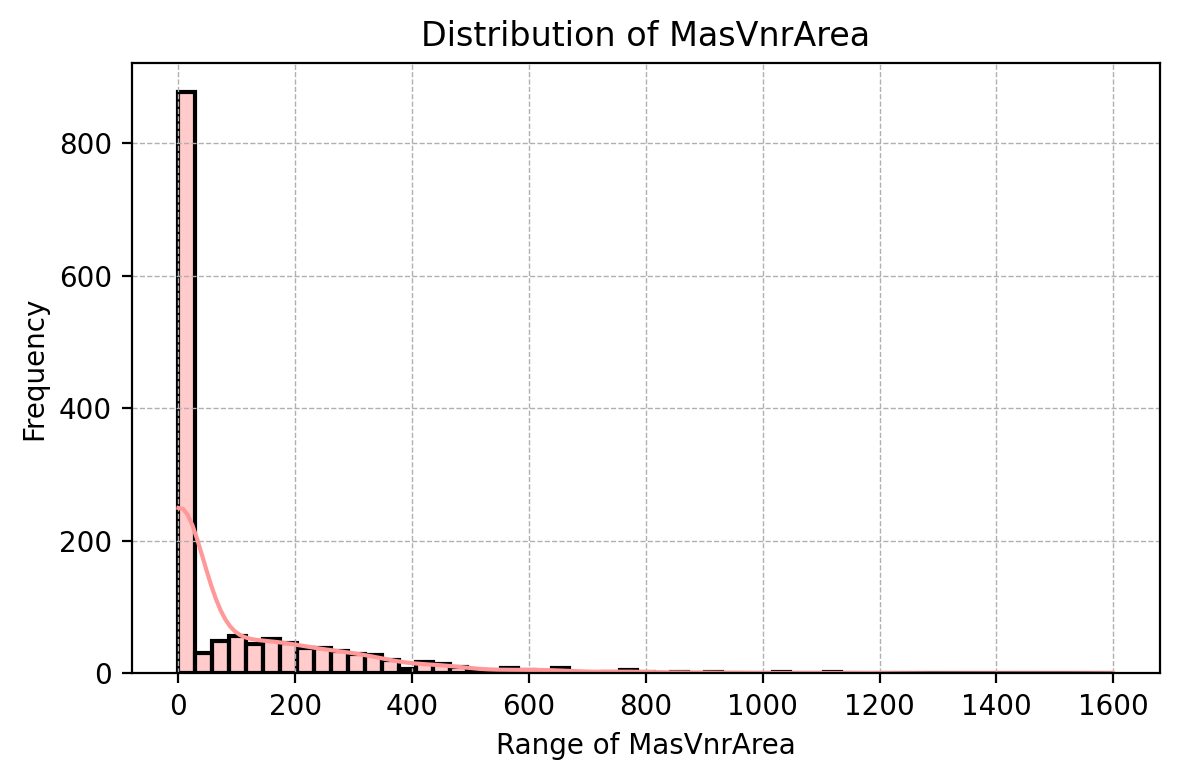

In [25]:

distribution_plot(df, 'MasVnrArea')


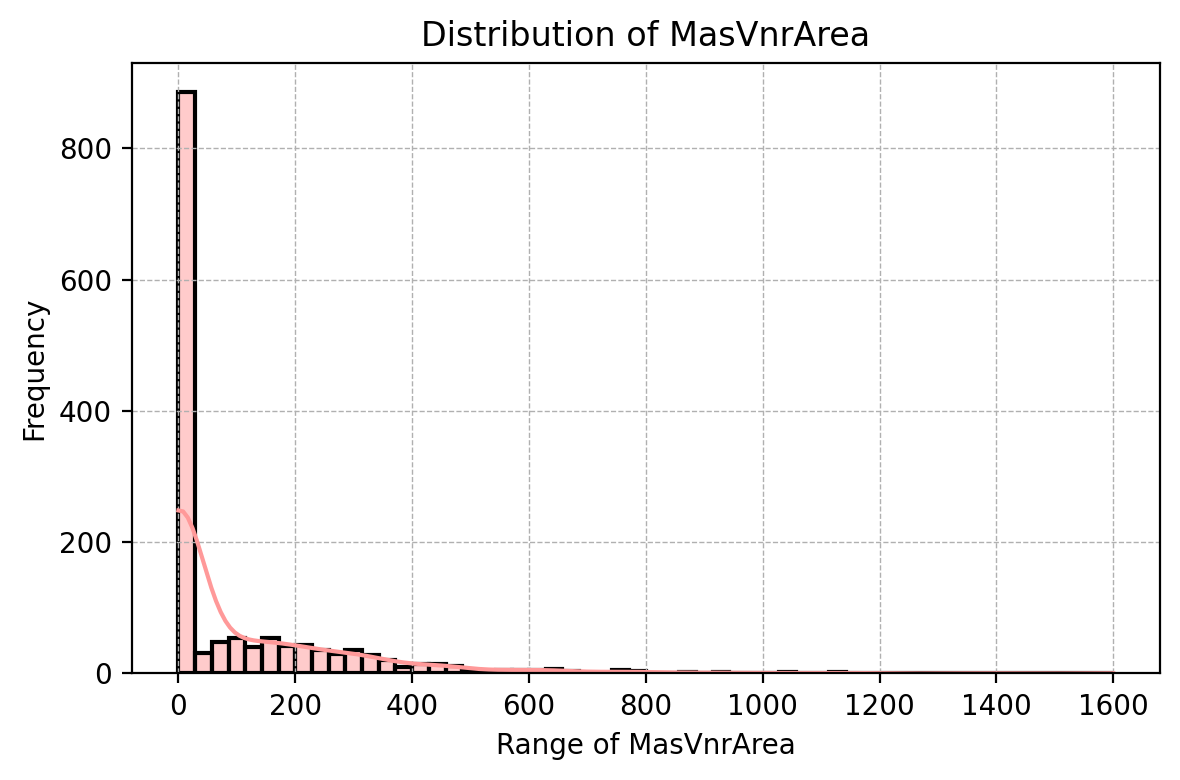

In [26]:
# df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
distribution_plot(df, 'MasVnrArea')


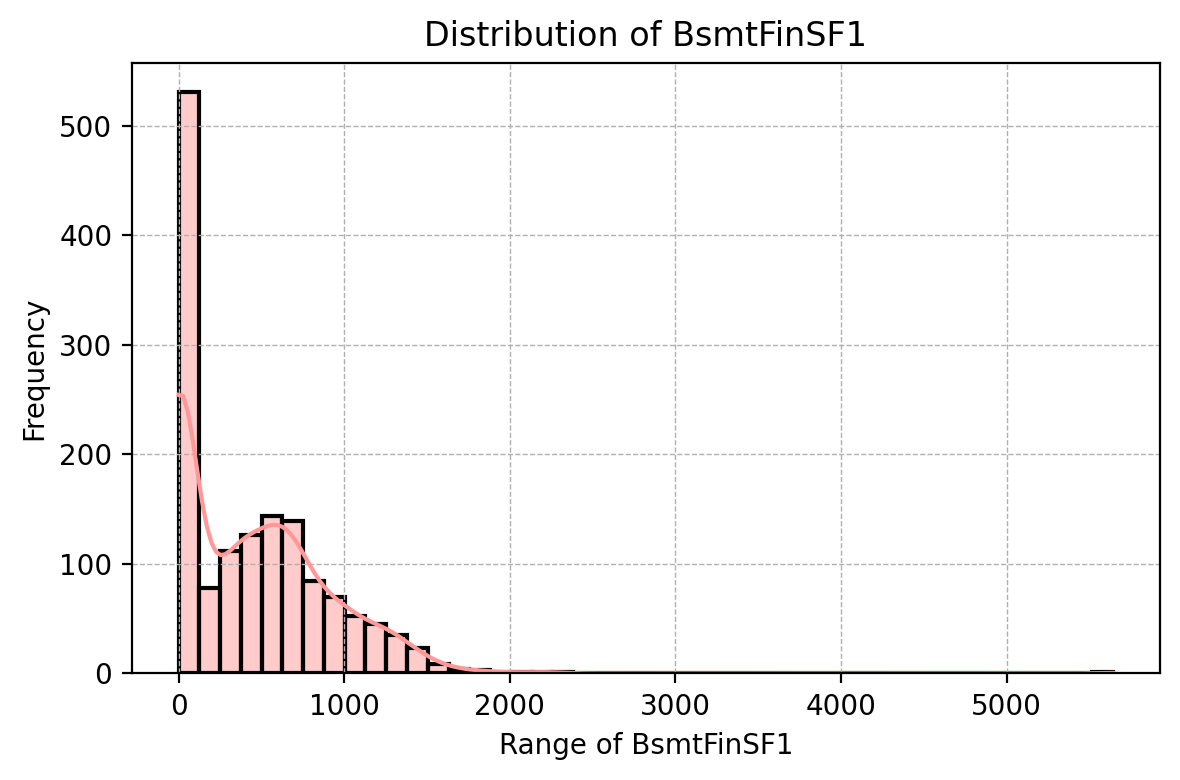

In [27]:

distribution_plot(df, 'BsmtFinSF1')


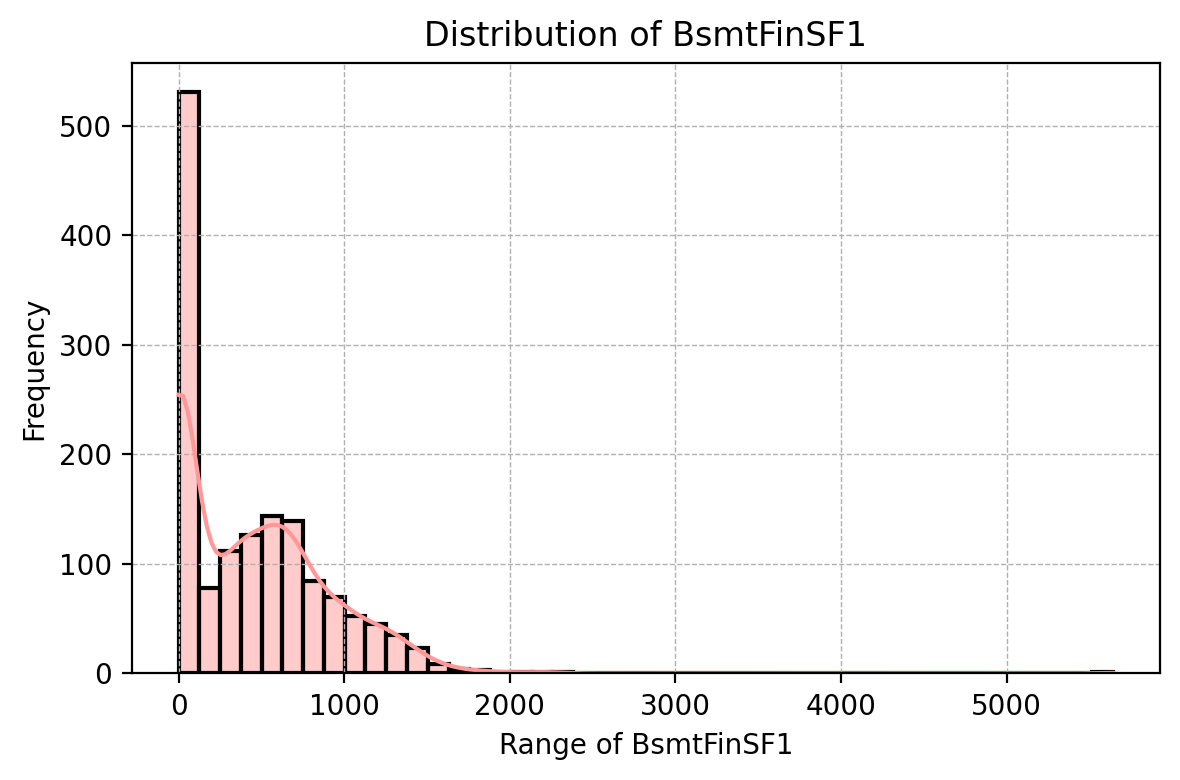

In [28]:
df['BsmtFinSF1'] = df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].median())
distribution_plot(df, 'BsmtFinSF1')

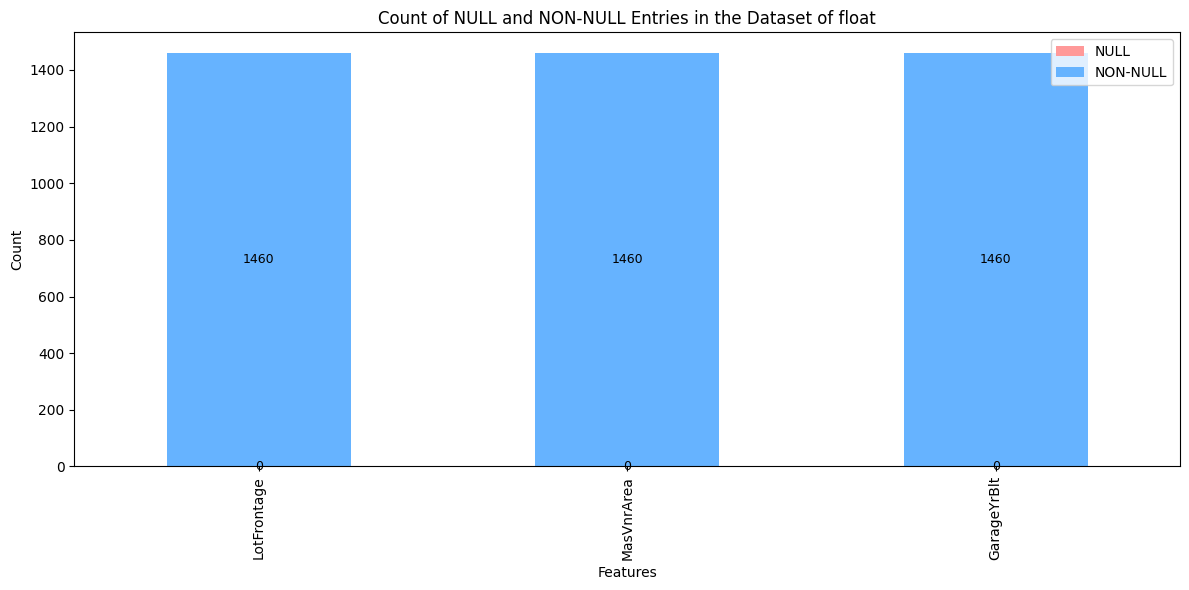

In [29]:
check_null(df[float_columns], 'float')

In [30]:
# LETS EXPLORE AND REMOVE NULL VALUES AND REPLACE WITH APPROPRATE MEANINGS in the object df

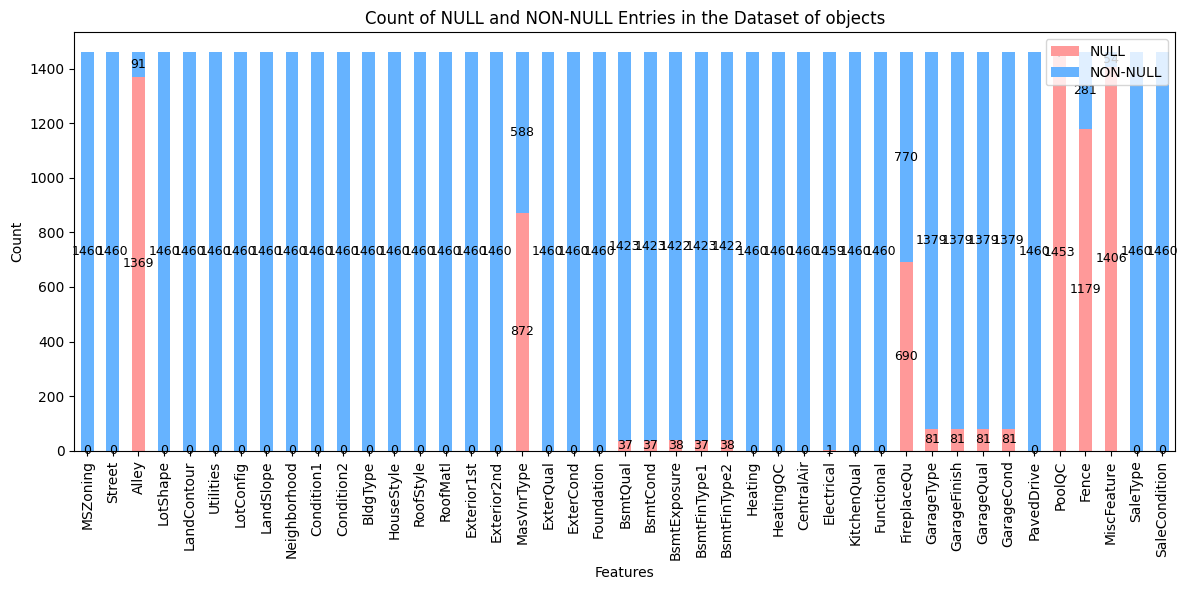

In [31]:
check_null(df[object_columns], 'objects')

In [32]:
df['MSZoning'].value_counts()
# MSZoning: Identifies the general zoning classification of the sale.
		
#        A	Agriculture
#        C	Commercial
#        FV	Floating Village Residential
#        I	Industrial
#        RH	Residential High Density
#        RL	Residential Low Density
#        RP	Residential Low Density Park 
#        RM	Residential Medium Density

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [33]:
zoning_dict = {
    'A': 'Agriculture',
    'C (all)': 'Commercial',
    'FV': 'Floating Village Residential',
    'I': 'Industrial',
    'RH': 'Residential High Density',
    'RL': 'Residential Low Density',
    'RP': 'Residential Low Density Park',
    'RM': 'Residential Medium Density'
}
# df['MSZoning'] = df['MSZoning'].replace(zoning_dict)
df['MSZoning'].unique()

array(['Residential Low Density', 'Residential Medium Density',
       'Commercial', 'Floating Village Residential',
       'Residential High Density'], dtype=object)

In [34]:
df['Street'].value_counts()

# Street: Type of road access to property

#        Grvl	Gravel	
#        Pave	Paved

### Drop

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [35]:
street_dic = {'Pave': 1,
             'Grvl' : 2}
# df['Street'] = df['Street'].replace(zoning_dict)
df['Street'].value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [36]:
df['Alley'].value_counts()
# Alley: Type of alley access to property

#        Grvl	Gravel
#        Pave	Paved
#        NA 	No alley access
#  this is type of road

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [37]:
# Define the mapping dictionary
dic = { 'Grvl': 3, 'Pave': 2 }
# df['Alley'] = df['Alley'].fillna(1)

# Replace values based on the dictionary
# df['Alley'] = df['Alley'].replace(dic)

df['Alley'].value_counts()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/737834698.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Alley'] = df['Alley'].replace(dic)


Alley
1    1369
3      50
2      41
Name: count, dtype: int64

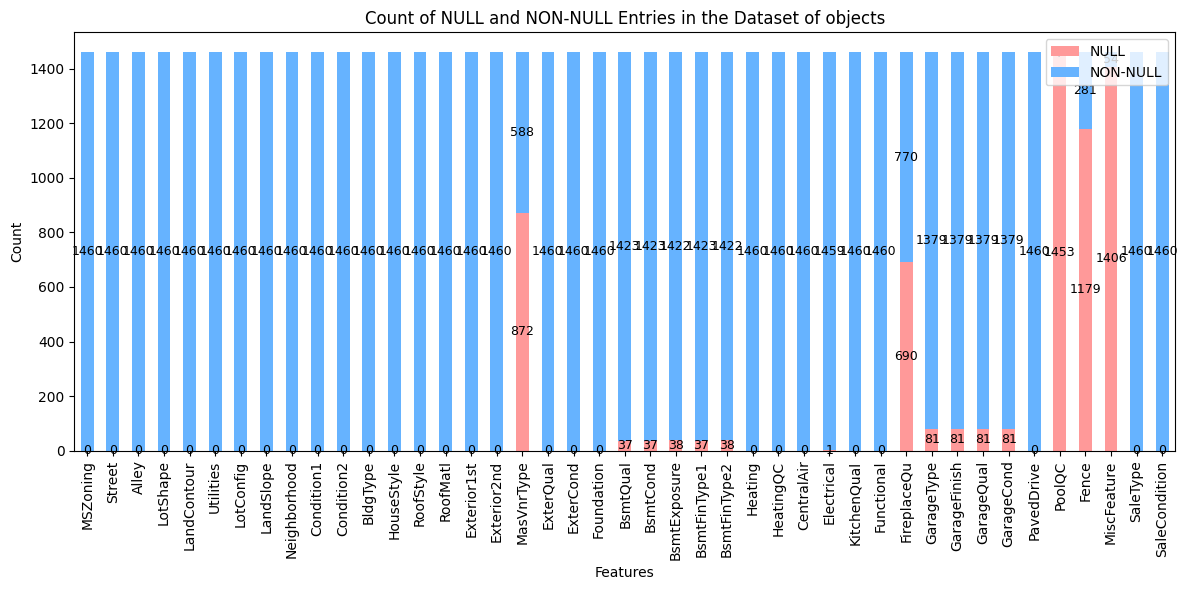

In [38]:
check_null(df[object_columns], 'objects')

In [39]:
df['LotShape'].value_counts()
# LotShape: General shape of property

#        Reg	Regular	
#        IR1	Slightly irregular
#        IR2	Moderately Irregular
#        IR3	Irregular

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [40]:
shape_dict = {
    'Reg': 4,
    'IR1': 3,
    'IR2': 2,
    'IR3': 1
}
# df['LotShape'] = df['LotShape'].replace(dic)
df['LotShape'].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [41]:
df['LandContour'].value_counts()

# LandContour: Flatness of the property

#        Lvl	Near Flat/Level	
#        Bnk	Banked - Quick and significant rise from street grade to building
#        HLS	Hillside - Significant slope from side to side
#        Low	Depression

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [42]:

land_contour_mapping = {
    'Lvl': 4,
    'Bnk': 3,
    'HLS': 2,
    'Low': 1
}

# Applying the mapping
# df['LandContour'] = df['LandContour'].map(land_contour_mapping)
df['LandContour'].value_counts()

LandContour
4    1311
3      63
2      50
1      36
Name: count, dtype: int64

In [43]:
df['Utilities'].value_counts()
# Utilities: Type of utilities available
		
#        AllPub	All public Utilities (E,G,W,& S)	
#        NoSewr	Electricity, Gas, and Water (Septic Tank)
#        NoSeWa	Electricity and Gas Only
#        ELO	Electricity only


### drop

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [44]:
df['LotConfig'].value_counts()
# LotConfig: Lot configuration

#        Inside	Inside lot
#        Corner	Corner lot
#        CulDSac	Cul-de-sac
#        FR2	Frontage on 2 sides of property
#        FR3	Frontage on 3 sides of property

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [45]:
df['LandSlope'].value_counts()
# LandSlope: Slope of property
		
#        Gtl	Gentle slope
#        Mod	Moderate Slope	
#        Sev	Severe Slope

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [46]:
# df['Neighborhood'].value_counts()
# Neighborhood: Physical locations within Ames city limits

#        Blmngtn	Bloomington Heights
#        Blueste	Bluestem
#        BrDale	Briardale
#        BrkSide	Brookside
#        ClearCr	Clear Creek
#        CollgCr	College Creek
#        Crawfor	Crawford
#        Edwards	Edwards
#        Gilbert	Gilbert
#        IDOTRR	Iowa DOT and Rail Road
#        MeadowV	Meadow Village
#        Mitchel	Mitchell
#        Names	North Ames
#        NoRidge	Northridge
#        NPkVill	Northpark Villa
#        NridgHt	Northridge Heights
#        NWAmes	Northwest Ames
#        OldTown	Old Town
#        SWISU	South & West of Iowa State University
#        Sawyer	Sawyer
#        SawyerW	Sawyer West
#        Somerst	Somerset
#        StoneBr	Stone Brook
#        Timber	Timberland
#        Veenker	Veenker

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

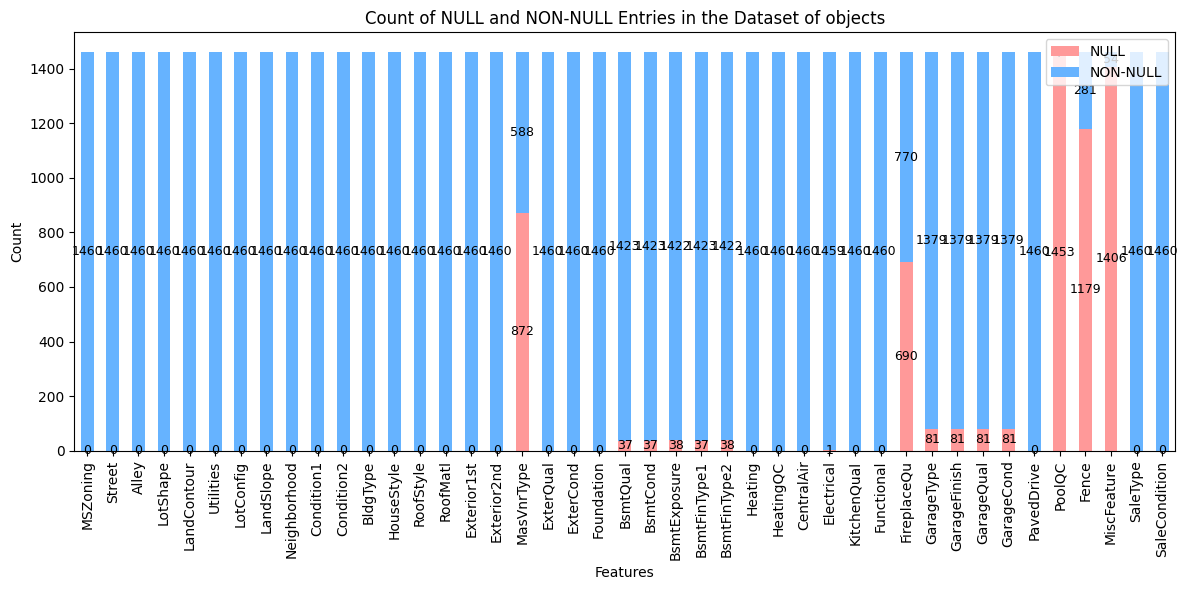

In [47]:
check_null(df[object_columns], 'objects')

In [48]:
df['Condition1'].value_counts()

# Condition1: Proximity to various conditions
	
       # Artery	Adjacent to arterial street
       # Feedr	Adjacent to feeder street	
       # Norm	Normal	
       # RRNn	Within 200' of North-South Railroad
       # RRAn	Adjacent to North-South Railroad
       # PosN	Near positive off-site feature--park, greenbelt, etc.
       # PosA	Adjacent to postive off-site feature
       # RRNe	Within 200' of East-West Railroad
       # RRAe	Adjacent to East-West Railroad

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [49]:
df['Condition2'].value_counts()

# Condition2: Proximity to various conditions (if more than one is present)
		
#        Artery	Adjacent to arterial street
#        Feedr	Adjacent to feeder street	
#        Norm	Normal	
#        RRNn	Within 200' of North-South Railroad
#        RRAn	Adjacent to North-South Railroad
#        PosN	Near positive off-site feature--park, greenbelt, etc.
#        PosA	Adjacent to postive off-site feature
#        RRNe	Within 200' of East-West Railroad
#        RRAe	Adjacent to East-West Railroad


#### drop

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [50]:
df['BldgType'].value_counts()

# BldgType: Type of dwelling
		
#        1Fam	Single-family Detached	
#        2FmCon	Two-family Conversion; originally built as one-family dwelling
#        Duplx	Duplex
#        TwnhsE	Townhouse End Unit
#        TwnhsI	Townhouse Inside Unit

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [51]:
df['HouseStyle'].value_counts()


# HouseStyle: Style of dwelling
	
#        1Story	One story
#        1.5Fin	One and one-half story: 2nd level finished
#        1.5Unf	One and one-half story: 2nd level unfinished
#        2Story	Two story
#        2.5Fin	Two and one-half story: 2nd level finished
#        2.5Unf	Two and one-half story: 2nd level unfinished
#        SFoyer	Split Foyer
#        SLvl	Split Level

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [52]:
df['RoofStyle'].value_counts()
# RoofStyle: Type of roof

#        Flat	Flat
#        Gable	Gable
#        Gambrel	Gabrel (Barn)
#        Hip	Hip
#        Mansard	Mansard
#        Shed	Shed

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [53]:
df['RoofMatl'].value_counts()

# RoofMatl: Roof material

#        ClyTile	Clay or Tile
#        CompShg	Standard (Composite) Shingle
#        Membran	Membrane
#        Metal	Metal
#        Roll	Roll
#        Tar&Grv	Gravel & Tar
#        WdShake	Wood Shakes
#        WdShngl	Wood Shingles

### drop

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [54]:
df['Exterior1st'].value_counts()
# Exterior1st: Exterior covering on house

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast	
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [56]:
df['Exterior2nd'].value_counts()

# Exterior2nd: Exterior covering on house (if more than one material)

#        AsbShng	Asbestos Shingles
#        AsphShn	Asphalt Shingles
#        BrkComm	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        CemntBd	Cement Board
#        HdBoard	Hard Board
#        ImStucc	Imitation Stucco
#        MetalSd	Metal Siding
#        Other	Other
#        Plywood	Plywood
#        PreCast	PreCast
#        Stone	Stone
#        Stucco	Stucco
#        VinylSd	Vinyl Siding
#        Wd Sdng	Wood Siding
#        WdShing	Wood Shingles

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [55]:
df['MasVnrType'].value_counts()
# MasVnrType: Masonry veneer type

#        BrkCmn	Brick Common
#        BrkFace	Brick Face
#        CBlock	Cinder Block
#        None	None
#        Stone	Stone
### Drop

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [57]:
# Define the mapping dictionary
dic = { 'BrkCmn': 'Brick Common', 'BrkFace': 'Brick Face', 'CBlock':'Cinder Block' }

# df['MasVnrType'] = df['MasVnrType'].fillna('None')
# Replace values based on the dictionary
# df['MasVnrType'] = df['MasVnrType'].replace(dic)

df['MasVnrType'].unique()

array(['Brick Face', 'None', 'Stone', 'Brick Common'], dtype=object)

In [58]:
df['MasVnrType'].value_counts()

MasVnrType
None            872
Brick Face      445
Stone           128
Brick Common     15
Name: count, dtype: int64

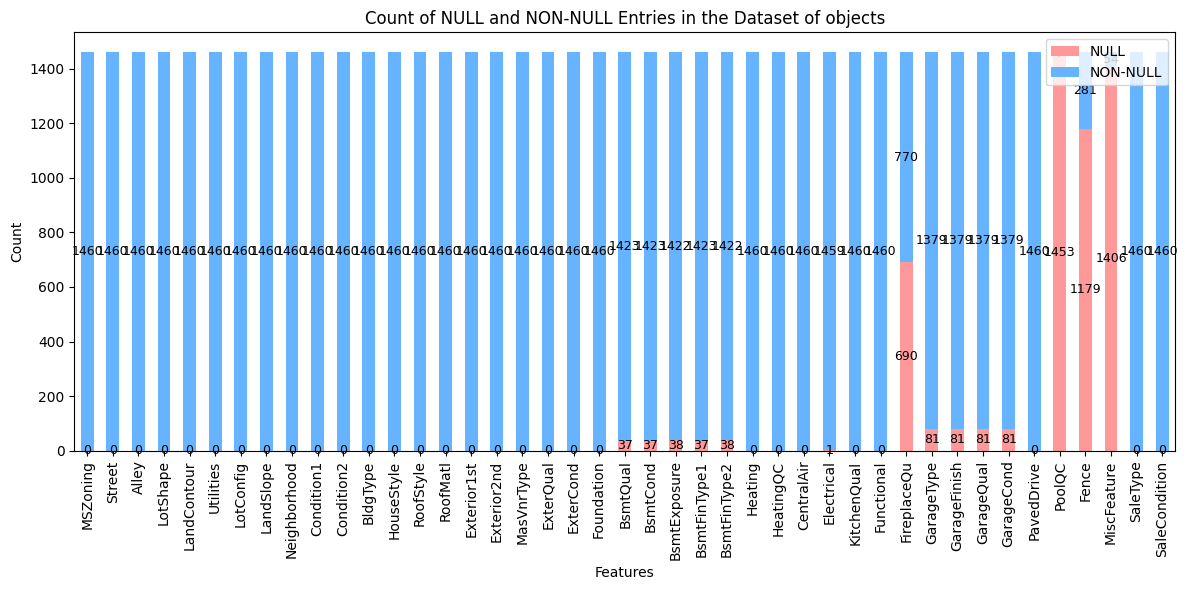

In [59]:
check_null(df[object_columns], 'objects')

In [60]:
df['ExterQual'].value_counts()
# ExterQual: Evaluates the quality of the material on the exterior 
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [61]:
quality_dict = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}
# df['ExterQual'] = df['ExterQual'].replace(quality_dict)
df['ExterQual'].value_counts()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/2574260456.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ExterQual'] = df['ExterQual'].replace(quality_dict)


ExterQual
3    906
4    488
5     52
2     14
Name: count, dtype: int64

In [62]:
df['ExterCond'].value_counts()

# ExterCond: Evaluates the present condition of the material on the exterior
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [63]:
quality_dict = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}
df['ExterCond'] = df['ExterCond'].replace(quality_dict)
df['ExterCond'].value_counts()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/4138452859.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ExterCond'] = df['ExterCond'].replace(quality_dict)


ExterCond
3    1282
4     146
2      28
5       3
1       1
Name: count, dtype: int64

In [64]:
df['Foundation'].value_counts()


# Foundation: Type of foundation
		
#        BrkTil	Brick & Tile
#        CBlock	Cinder Block
#        PConc	Poured Contrete	
#        Slab	Slab
#        Stone	Stone
#        Wood	Wood

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

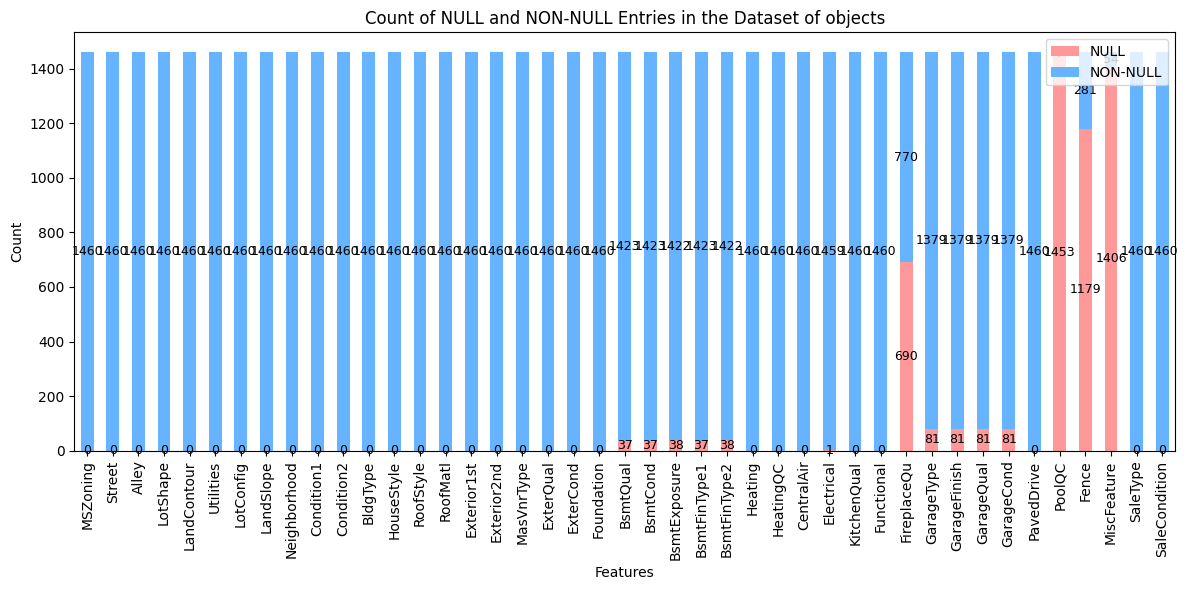

In [65]:
check_null(df[object_columns], 'objects')

In [66]:
df['BsmtQual'].unique()
# BsmtQual: Evaluates the height of the basement

#        Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [67]:
# Define the mapping dictionary
bsmt_qual_dict = {
    'Ex': 6,  # Excellent (100+ inches)
    'Gd': 5,  # Good (90-99 inches)
    'TA': 4,  # Typical (80-89 inches)
    'Fa': 3,  # Fair (70-79 inches)
    'Po': 2,  # Poor (<70 inches)
}

df['BsmtQual'] = df['BsmtQual'].fillna(1)

# Replace values based on the dictionary
# df['BsmtQual'] = df['BsmtQual'].replace(bsmt_qual_dict)

df['BsmtQual'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/40947664.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtQual'] = df['BsmtQual'].replace(bsmt_qual_dict)


array([5, 4, 6, 1, 3])

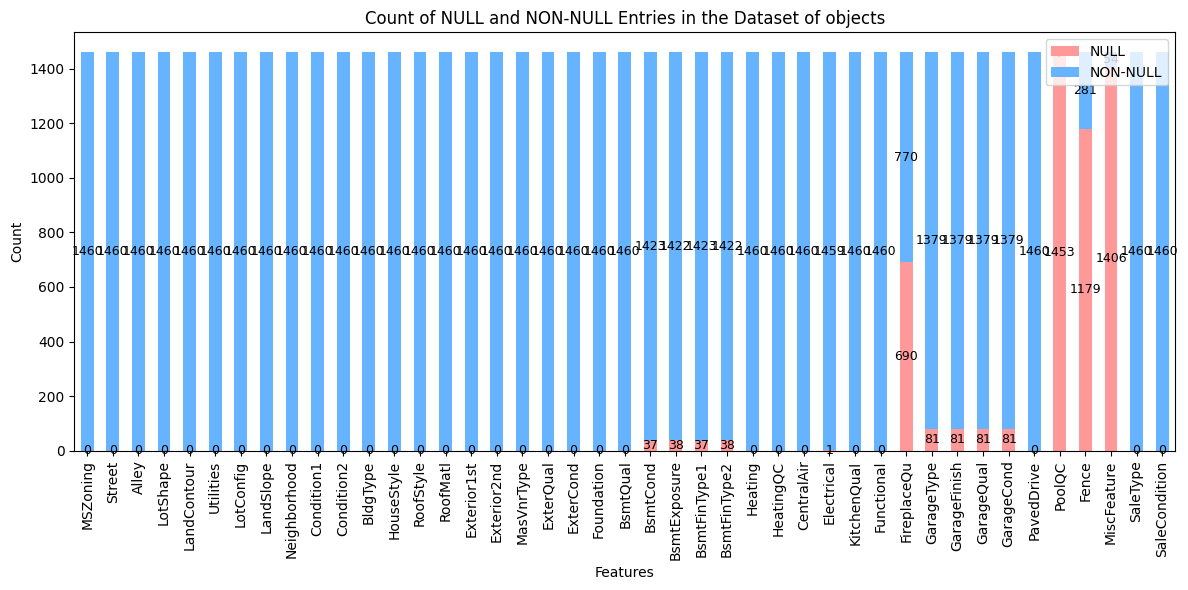

In [68]:
check_null(df[object_columns], 'objects')

In [69]:
df['BsmtCond'].unique()
# BsmtCond: Evaluates the general condition of the basement

#        Ex	Excellent
#        Gd	Good
#        TA	Typical - slight dampness allowed
#        Fa	Fair - dampness or some cracking or settling
#        Po	Poor - Severe cracking, settling, or wetness
#        NA	No Basement

# lets replace all the representaions with numbers 

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [70]:
bsmt_qual_dict = {
    'Ex': 6,  # Excellent (100+ inches)
    'Gd': 5,  # Good (90-99 inches)
    'TA': 4,  # Typical (80-89 inches)
    'Fa': 3,  # Fair (70-79 inches)
    'Po': 2,  # Poor (<70 inches)
}

df['BsmtCond'] = df['BsmtCond'].fillna(1)

# Replace values based on the dictionary
# df['BsmtCond'] = df['BsmtCond'].replace(bsmt_qual_dict)

df['BsmtCond'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/2809996792.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtCond'] = df['BsmtCond'].replace(bsmt_qual_dict)


array([4, 5, 1, 3, 2])

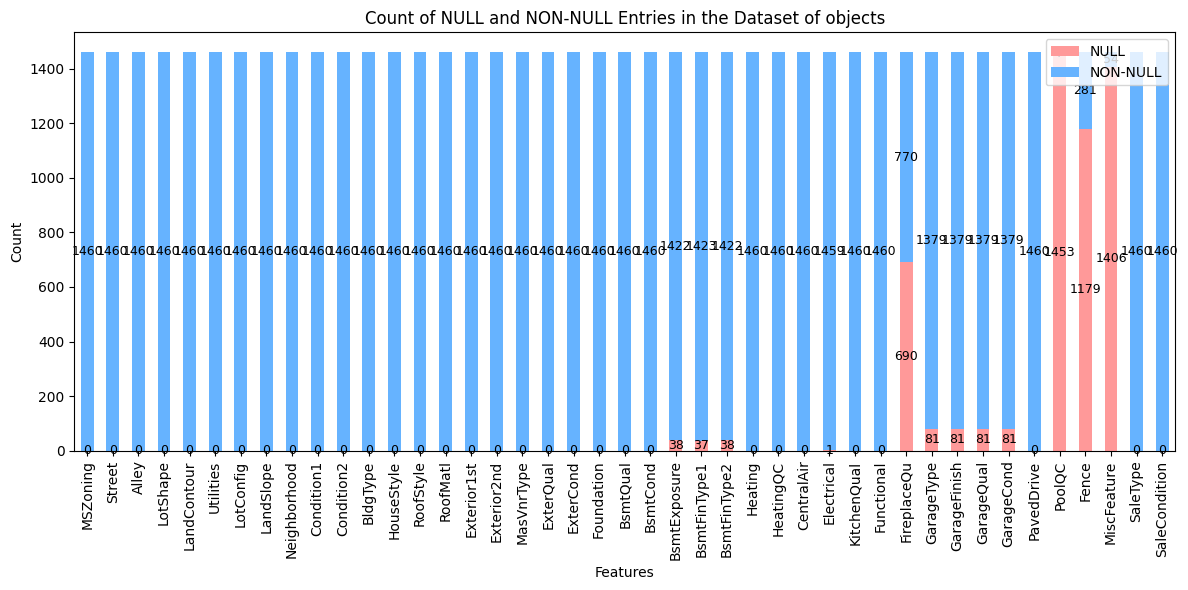

In [71]:
check_null(df[object_columns], 'objects')

In [72]:
df['BsmtExposure'].unique()
# BsmtExposure: Refers to walkout or garden level walls

#        Gd	Good Exposure
#        Av	Average Exposure (split levels or foyers typically score average or above)	
#        Mn	Mimimum Exposure
#        No	No Exposure


array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [73]:
bsmt_exposure_dict = {
    'Gd': 4,  # Good Exposure
    'Av': 3,  # Average Exposure
    'Mn': 2,  # Minimum Exposure
    'No': 1   # No Exposure
}

# df['BsmtExposure'] = df['BsmtExposure'].fillna(1)

# Replace values based on the dictionary
# df['BsmtExposure'] = df['BsmtExposure'].replace(bsmt_exposure_dict)

df['BsmtExposure'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/2666850573.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtExposure'] = df['BsmtExposure'].replace(bsmt_exposure_dict)


array([1, 4, 2, 3])

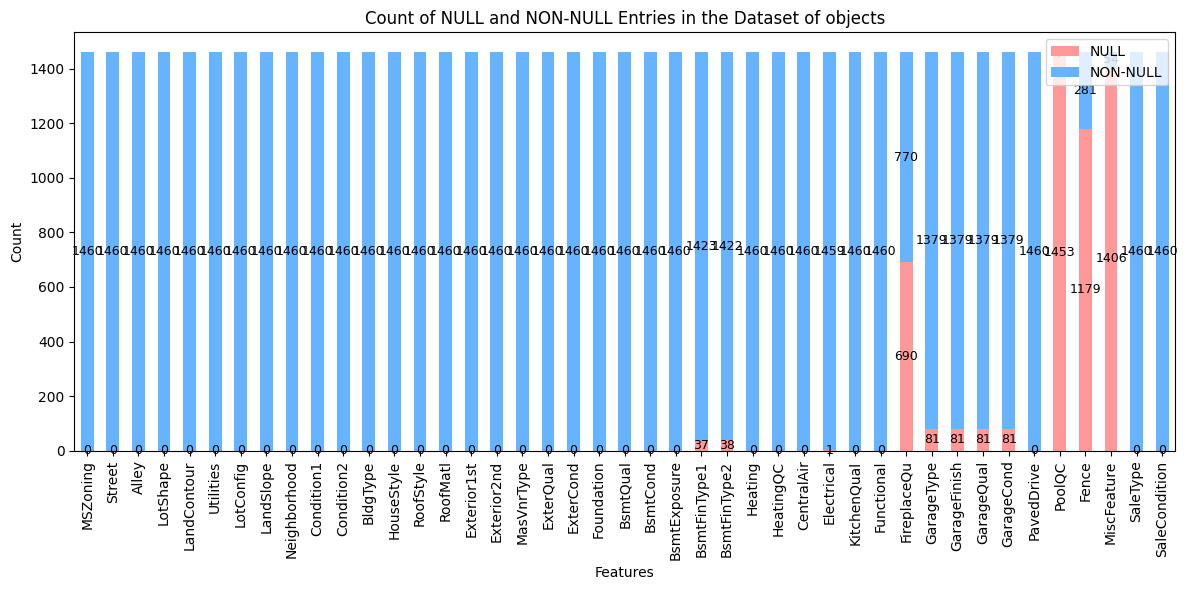

In [74]:
check_null(df[object_columns], 'objects')

In [75]:
df['BsmtFinType1'].unique()
# BsmtFinType1: Rating of basement finished area

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [76]:


bsmt_fin_type1_dict = {
    'GLQ': 7,  # Good Living Quarters
    'ALQ': 6,  # Average Living Quarters
    'BLQ': 5,  # Below Average Living Quarters
    'Rec': 4,  # Average Rec Room
    'LwQ': 3,  # Low Quality
    'Unf': 2,  # Unfinished
}

# df['BsmtFinType1'] = df['BsmtFinType1'].fillna(1)

# Replace values based on the dictionary
# df['BsmtFinType1'] = df['BsmtFinType1'].replace(bsmt_fin_type1_dict)

df['BsmtFinType1'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/1275792331.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtFinType1'] = df['BsmtFinType1'].replace(bsmt_fin_type1_dict)


array([7, 6, 2, 4, 5, 1, 3])

In [77]:
df['BsmtFinType2'].unique()
# BsmtFinType2: Rating of basement finished area (if multiple types)

#        GLQ	Good Living Quarters
#        ALQ	Average Living Quarters
#        BLQ	Below Average Living Quarters	
#        Rec	Average Rec Room
#        LwQ	Low Quality
#        Unf	Unfinshed
#        NA	No Basement

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [78]:
bsmt_fin_type2_dict = {
    'GLQ': 7,  # Good Living Quarters
    'ALQ': 6,  # Average Living Quarters
    'BLQ': 5,  # Below Average Living Quarters
    'Rec': 4,  # Average Rec Room
    'LwQ': 3,  # Low Quality
    'Unf': 2,  # Unfinished
}

df['BsmtFinType2'] = df['BsmtFinType2'].fillna(1)

# Replace values based on the dictionary
df['BsmtFinType2'] = df['BsmtFinType2'].replace(bsmt_fin_type2_dict)

df['BsmtFinType2'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/2613044823.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['BsmtFinType2'] = df['BsmtFinType2'].replace(bsmt_fin_type2_dict)


array([2, 5, 1, 6, 4, 3, 7])

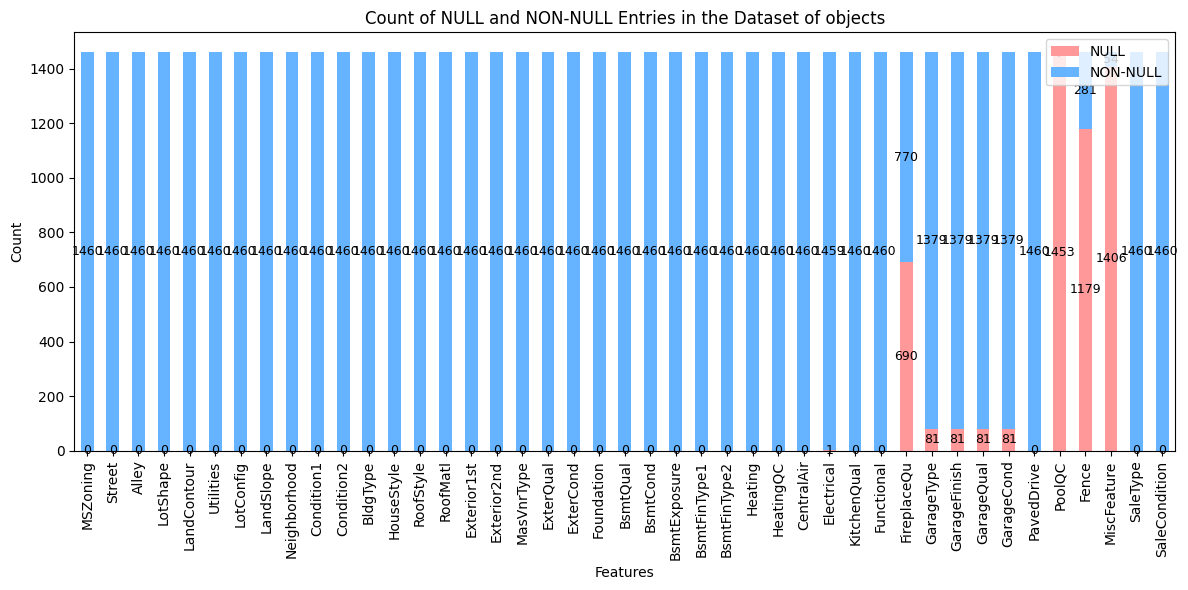

In [79]:
check_null(df[object_columns], 'objects')

In [80]:
df['Heating'].value_counts()

# Heating: Type of heating
		
#        Floor	Floor Furnace
#        GasA	Gas forced warm air furnace
#        GasW	Gas hot water or steam heat
#        Grav	Gravity furnace	
#        OthW	Hot water or steam heat other than gas
#        Wall	Wall furnace

### drop

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [81]:
df['HeatingQC'].value_counts()

# HeatingQC: Heating quality and condition

#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        Po	Poor

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [82]:
heating_qc_dict = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}


In [83]:
# df['HeatingQC'] = df['HeatingQC'].replace(heating_qc_dict)

df['HeatingQC'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/1463310239.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['HeatingQC'] = df['HeatingQC'].replace(heating_qc_dict)


array([5, 4, 3, 2, 1])

In [84]:


df['CentralAir'].unique()
# CentralAir: Central air conditioning

#        N	No
#        Y	Yes

array(['Y', 'N'], dtype=object)

In [85]:
central_air_dict = {
    'N': 1,  # No
    'Y': 2   # Yes
}
# df['CentralAir'] = df['CentralAir'].replace(central_air_dict)

df['CentralAir'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/1743997465.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CentralAir'] = df['CentralAir'].replace(central_air_dict)


array([2, 1])

In [86]:
# df['Electrical'].value_counts()
# Electrical: Electrical system

#        SBrkr	Standard Circuit Breakers & Romex
#        FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
#        FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
#        FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
#        Mix	Mixed
# df = df.drop('Electrical', axis = 1)

## drop

In [87]:

# df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['Electrical'].value_counts()

Electrical
SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

In [88]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

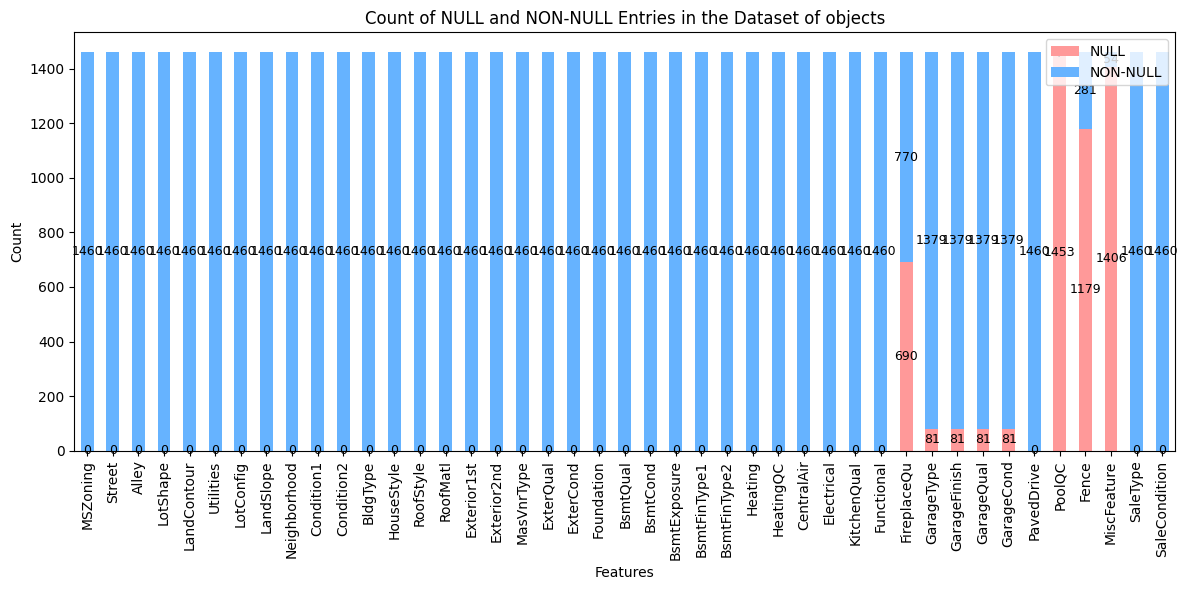

In [89]:
check_null(df[object_columns], 'objects')

In [90]:
df['KitchenQual'].unique()
# KitchenQual: Kitchen quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [91]:
kitchen_qual_dict = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1   # Poor
}
# df['KitchenQual'] = df['KitchenQual'].replace(kitchen_qual_dict)

df['KitchenQual'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/151926431.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['KitchenQual'] = df['KitchenQual'].replace(kitchen_qual_dict)


array([4, 3, 5, 2])

In [92]:
df['Functional'].value_counts()

# Functional: Home functionality (Assume typical unless deductions are warranted)

#        Typ	Typical Functionality
#        Min1	Minor Deductions 1
#        Min2	Minor Deductions 2
#        Mod	Moderate Deductions
#        Maj1	Major Deductions 1
#        Maj2	Major Deductions 2
#        Sev	Severely Damaged
#        Sal	Salvage only

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [93]:
df['FireplaceQu'].unique()
# FireplaceQu: Fireplace quality

#        Ex	Excellent - Exceptional Masonry Fireplace
#        Gd	Good - Masonry Fireplace in main level
#        TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#        Fa	Fair - Prefabricated Fireplace in basement
#        Po	Poor - Ben Franklin Stove
#        NA	No Fireplace

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [94]:

fireplace_qual_dict = {
    'Ex': 5,  # Excellent - Exceptional Masonry Fireplace
    'Gd': 4,  # Good - Masonry Fireplace in main level
    'TA': 3,  # Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
    'Fa': 2,  # Fair - Prefabricated Fireplace in basement
    'Po': 1,  # Poor - Ben Franklin Stove
}

# df['FireplaceQu'] = df['FireplaceQu'].fillna(0)

# Replace values based on the dictionary
# df['FireplaceQu'] = df['FireplaceQu'].replace(fireplace_qual_dict)

df['FireplaceQu'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/979304009.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FireplaceQu'] = df['FireplaceQu'].replace(fireplace_qual_dict)


array([0, 3, 4, 2, 5, 1])

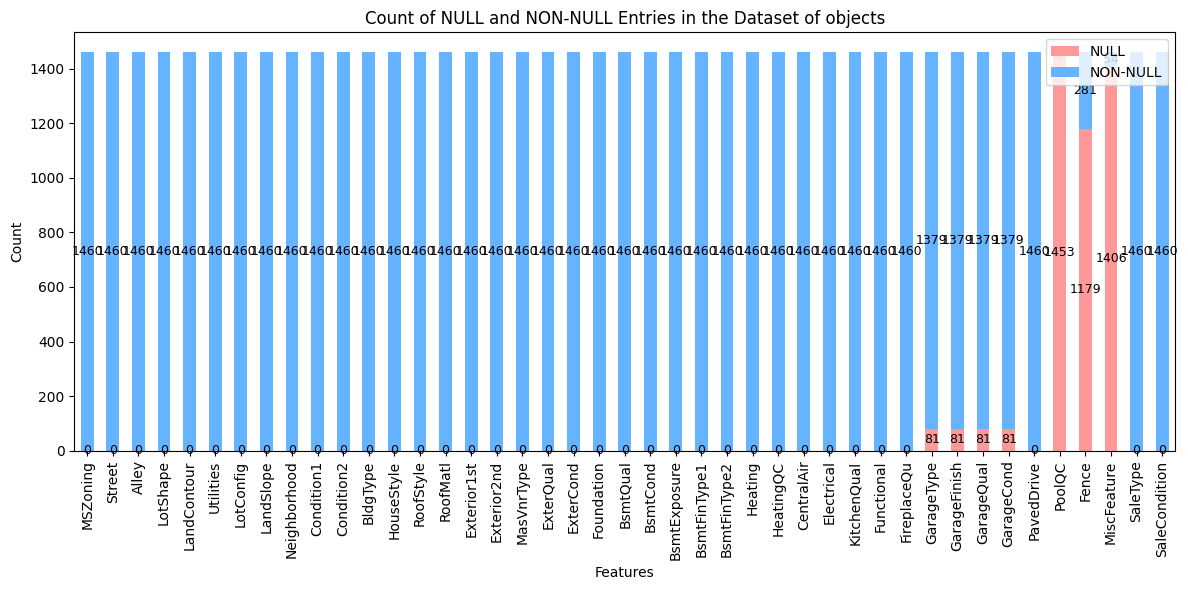

In [95]:
check_null(df[object_columns], 'objects')


In [96]:
df['GarageType'].unique()
# GarageType: Garage location
		
#        2Types	More than one type of garage
#        Attchd	Attached to home
#        Basment	Basement Garage
#        BuiltIn	Built-In (Garage part of house - typically has room above garage)
#        CarPort	Car Port
#        Detchd	Detached from home
#        NA	No Garage

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [97]:
# Define the mapping dictionary
dic = { 'Attchd' :	'Attached to home','Basment': 'Basment Garage', 'BuiltIn':'Built-In',  'CarPort':'Car Port',  'Detchd':'Detached from home'}
# df['GarageType'] = df['GarageType'].fillna('No Garage')

# # Replace values based on the dictionary
# df['GarageType'] = df['GarageType'].replace(dic)

df['GarageType'].unique()

array(['Attached to home', 'Detached from home', 'Built-In', 'Car Port',
       'No Garage', 'Basment Garage', '2Types'], dtype=object)

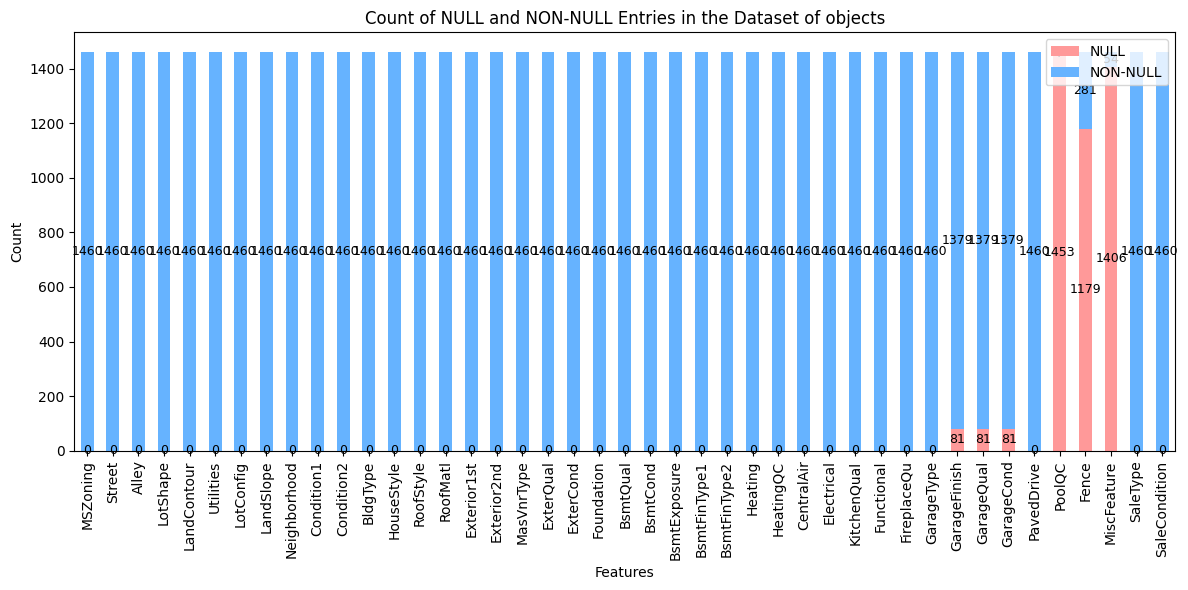

In [98]:
check_null(df[object_columns], 'objects')

In [99]:
df['GarageFinish'].unique()
# GarageFinish: Interior finish of the garage

#        Fin	Finished
#        RFn	Rough Finished	
#        Unf	Unfinished
#        NA	No Garage

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [100]:

garage_finish_dict = {
    'Fin': 3,  # Finished
    'RFn': 2,  # Rough Finished
    'Unf': 1,  # Unfinished
}

# df['GarageFinish'] = df['GarageFinish'].fillna(0)

# # Replace values based on the dictionary
# df['GarageFinish'] = df['GarageFinish'].replace(garage_finish_dict)

df['GarageFinish'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/1453195702.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GarageFinish'] = df['GarageFinish'].replace(garage_finish_dict)


array([2, 1, 3, 0])

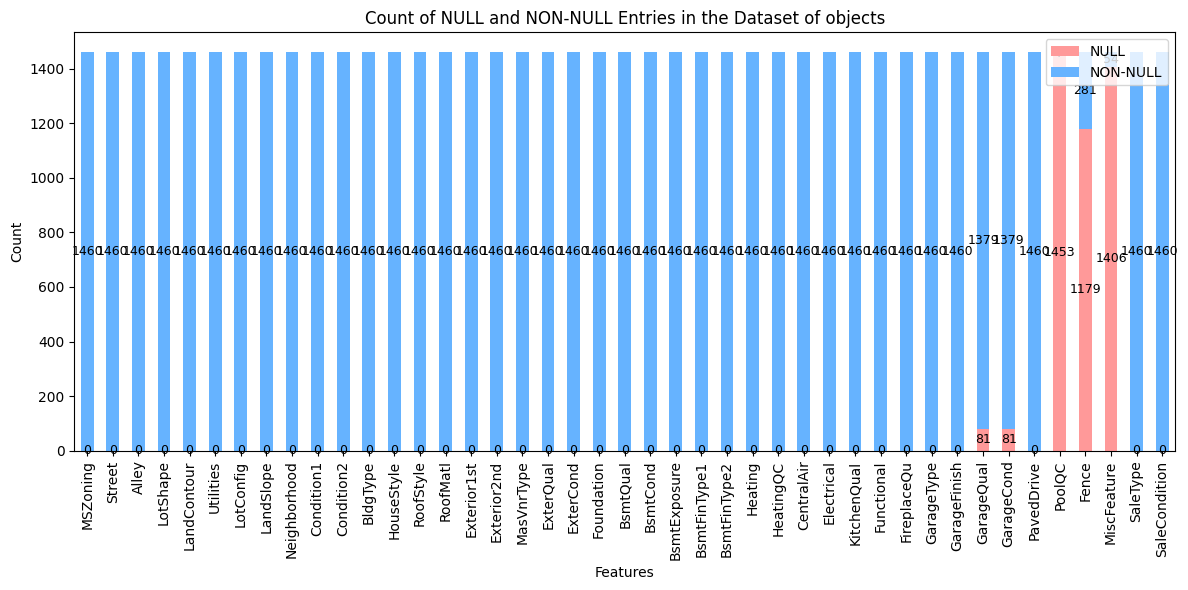

In [101]:
check_null(df[object_columns], 'objects')

In [102]:
df['GarageQual'].unique()
# GarageQual: Garage quality

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [103]:

garage_qual_dict = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
}

# df['GarageQual'] = df['GarageQual'].fillna(0)

# # Replace values based on the dictionary
# df['GarageQual'] = df['GarageQual'].replace(garage_qual_dict)

df['GarageQual'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/740368953.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GarageQual'] = df['GarageQual'].replace(garage_qual_dict)


array([3, 2, 4, 0, 5, 1])

In [104]:
df['GarageCond'].unique()
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [105]:
garage_con_dict = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Typical/Average
    'Fa': 2,  # Fair
    'Po': 1,  # Poor
}
# df['GarageCond'] = df['GarageCond'].fillna(0)

# # Replace values based on the dictionary
# df['GarageCond'] = df['GarageCond'].replace(garage_con_dict)

df['GarageCond'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/1792621495.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GarageCond'] = df['GarageCond'].replace(garage_con_dict)


array([3, 2, 0, 4, 1, 5])

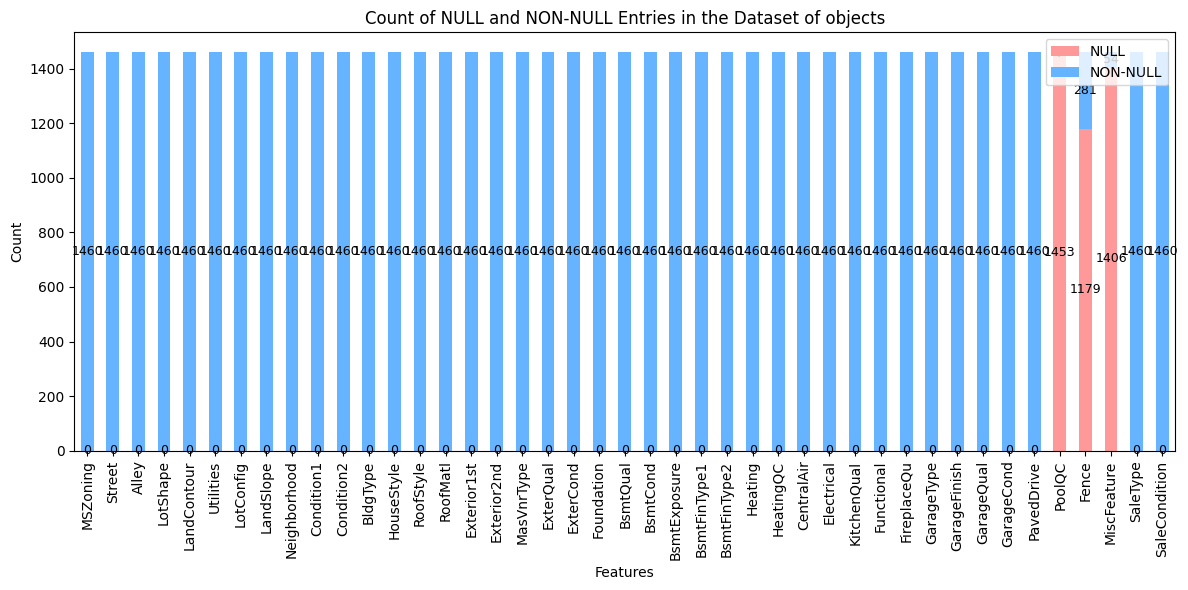

In [106]:
check_null(df[object_columns], 'objects')

In [107]:
df['PoolQC'].unique()
# PoolQC: Pool quality
		
#        Ex	Excellent
#        Gd	Good
#        TA	Average/Typical
#        Fa	Fair
#        NA	No Pool

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [108]:
pool_qc_dict = {
    'Ex': 5,  # Excellent
    'Gd': 4,  # Good
    'TA': 3,  # Average/Typical
    'Fa': 2,  # Fair
    'NA': 0   # No Pool
}

df['PoolQC'] = df['PoolQC'].fillna(0)

# Replace values based on the dictionary
df['PoolQC'] = df['PoolQC'].replace(pool_qc_dict)

df['PoolQC'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/1083168256.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['PoolQC'] = df['PoolQC'].replace(pool_qc_dict)


array([0, 5, 2, 4])

In [109]:
df['Fence'].unique()
# Fence: Fence quality
		
#        GdPrv	Good Privacy
#        MnPrv	Minimum Privacy
#        GdWo	Good Wood
#        MnWw	Minimum Wood/Wire
#        NA	No Fence

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [110]:
fence_quality_dict = {
    'GdPrv': 4,  # Good Privacy
    'MnPrv': 3,  # Minimum Privacy
    'GdWo': 4,   # Good Wood
    'MnWw': 2,   # Minimum Wood/Wire
}

# df['Fence'] = df['Fence'].fillna(0)

# # Replace values based on the dictionary
# df['Fence'] = df['Fence'].replace(fence_quality_dict)

df['Fence'].unique()

/var/folders/vf/28sqncwx6v18cj6z8zjy48r80000gn/T/ipykernel_6673/4073541330.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Fence'] = df['Fence'].replace(fence_quality_dict)


array([0, 3, 4, 2])

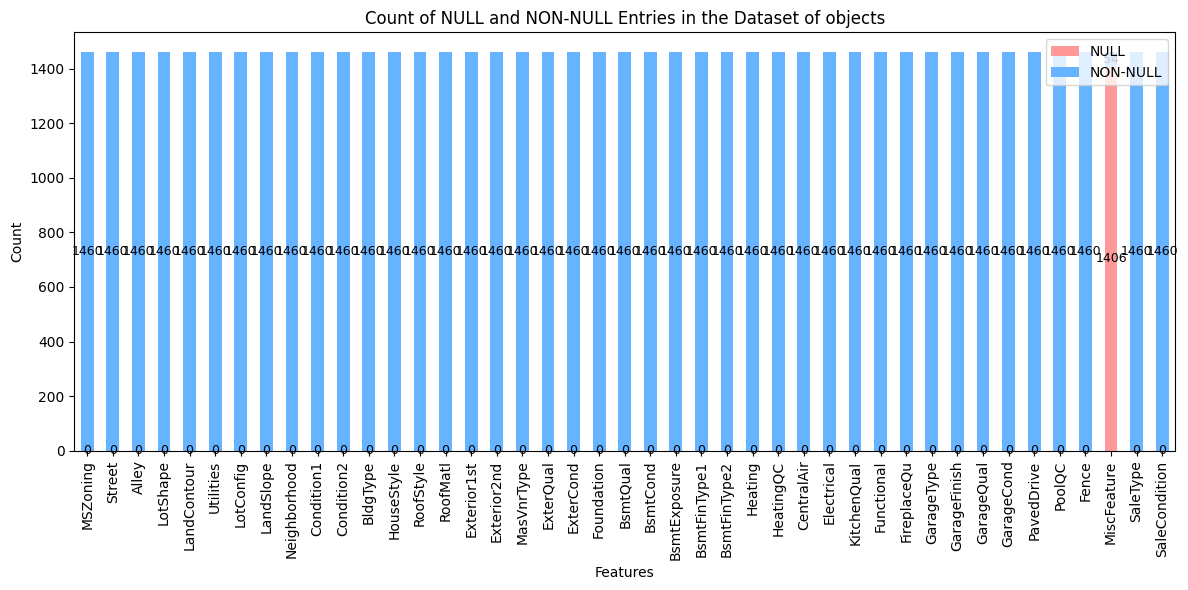

In [111]:
check_null(df[object_columns], 'objects')

In [112]:
df['MiscFeature'].unique()
# MiscFeature: Miscellaneous feature not covered in other categories
		
#        Elev	Elevator
#        Gar2	2nd Garage (if not described in garage section)
#        Othr	Other
#        Shed	Shed (over 100 SF)
#        TenC	Tennis Court
#        NA	None

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [113]:
# Define the mapping dictionary
# dic = { 'Elev': 'Elevator', 'Gar2':'2nd Garage','Othr':' Other',  'Shed':'Shed', 'TenC':'Tennis Court'}
# df['MiscFeature'] = df['MiscFeature'].fillna('None')

# # Replace values based on the dictionary
# df['MiscFeature'] = df['MiscFeature'].replace(dic)

df['MiscFeature'].unique()

array(['None', 'Shed', '2nd Garage', ' Other', 'Tennis Court'],
      dtype=object)

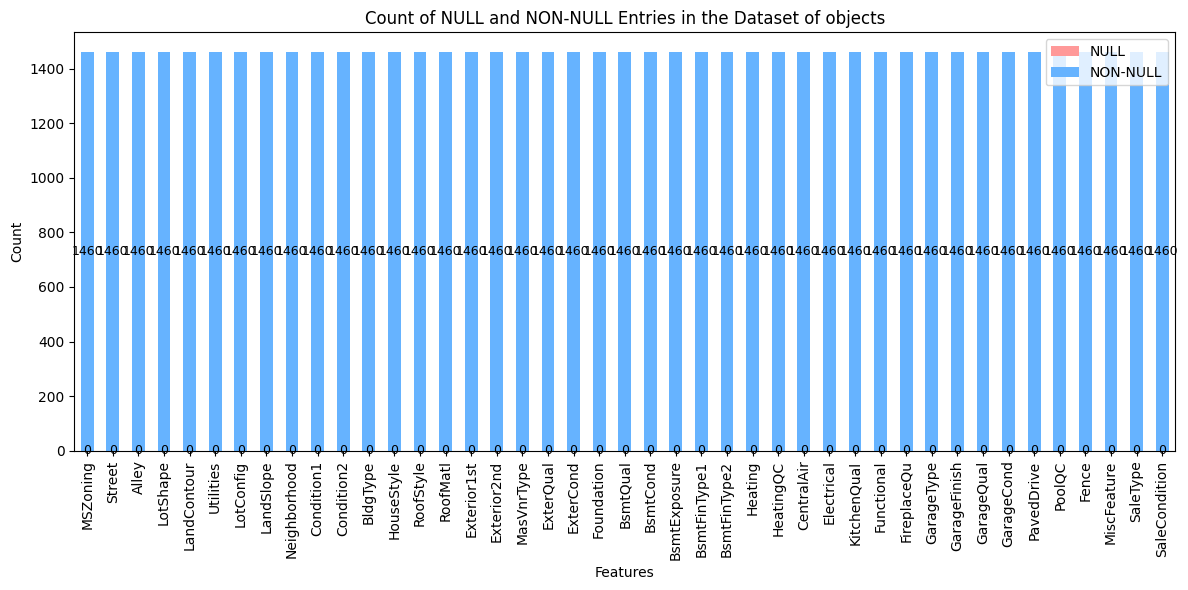

In [114]:
check_null(df[object_columns], 'objects')


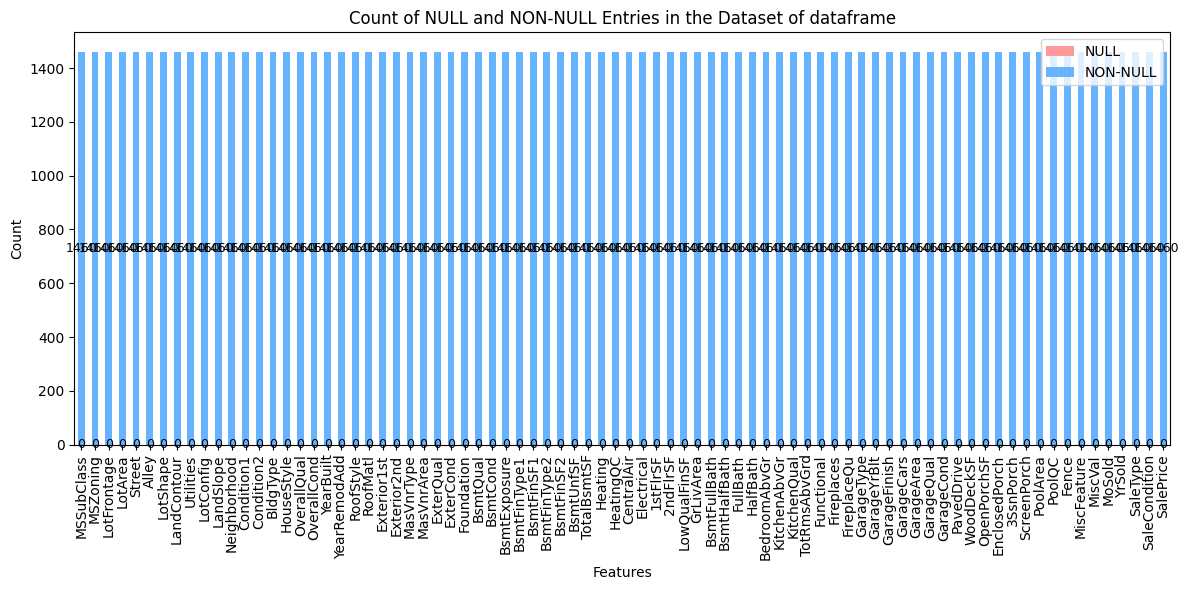

In [115]:
check_null(df, 'dataframe')

In [116]:
# Numericals Columns feature engineering

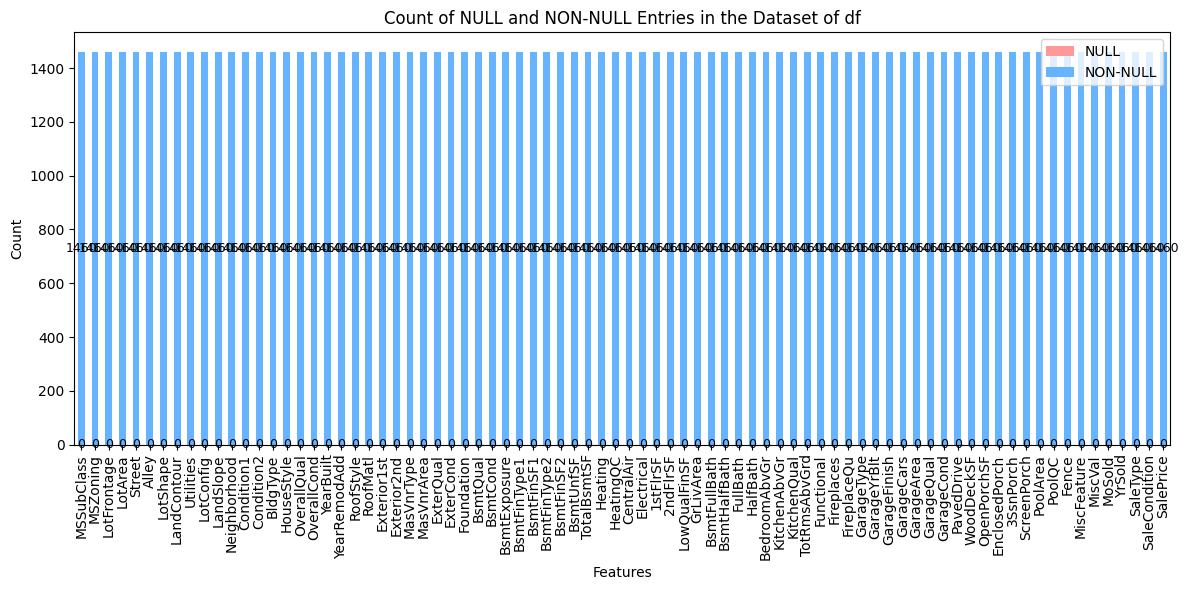

In [117]:
check_null(df, 'df')

In [118]:
def combined_plot(df, feature):
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), dpi=200)

    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[0])
    axes[0].set_title(f'Boxplot for {feature}')

    # Distribution plot
    sns.histplot(x=df[feature], ax=axes[1], kde=True)  # 'sns.displot()' is for creating standalone plots, use sns.histplot within subplots
    axes[1].set_title(f'Distribution Plot for {feature}')

    plt.tight_layout()
    plt.show()
    print(df[feature].describe() , df[feature].head())

In [119]:
# IQR Capping modifies outliers to fit within the range but keeps the dataset size the same.
# IQR Trimming removes rows with outliers entirely, reducing the size of the dataset.

def up_lo_bond(feature):   
    quantile1, quantile3 = np.percentile(df[feature],[25, 75])
    iqr = quantile3 - quantile1
    lower_bound = quantile1 - (1.5 *iqr)
    upper_bound = quantile3 + (1.5 *iqr)
    return upper_bound, lower_bound


# The function caps the outliers in a given column by replacing values above the upper limit with the upper limit and values below the lower limit with the lower limit. This method helps in handling extreme values while preserving the rest of the data
def IQR_capping(df, feature):
    upper_limit, lower_limit = up_lo_bond(feature)
    return np.where(df[feature] > upper_limit, upper_limit,
                    np.where(df[feature] < lower_limit, lower_limit, df[feature]))




# The function removes rows where the feature has values that lie outside the IQR (outliers). This is useful for cleaning the data by eliminating extreme values that might skew analysis
def IQR_trimming(df, feature):
    upper_limit, lower_limit = up_lo_bond(feature)
    return df[(df[feature] < upper_limit) & (df[feature] > lower_limit)]


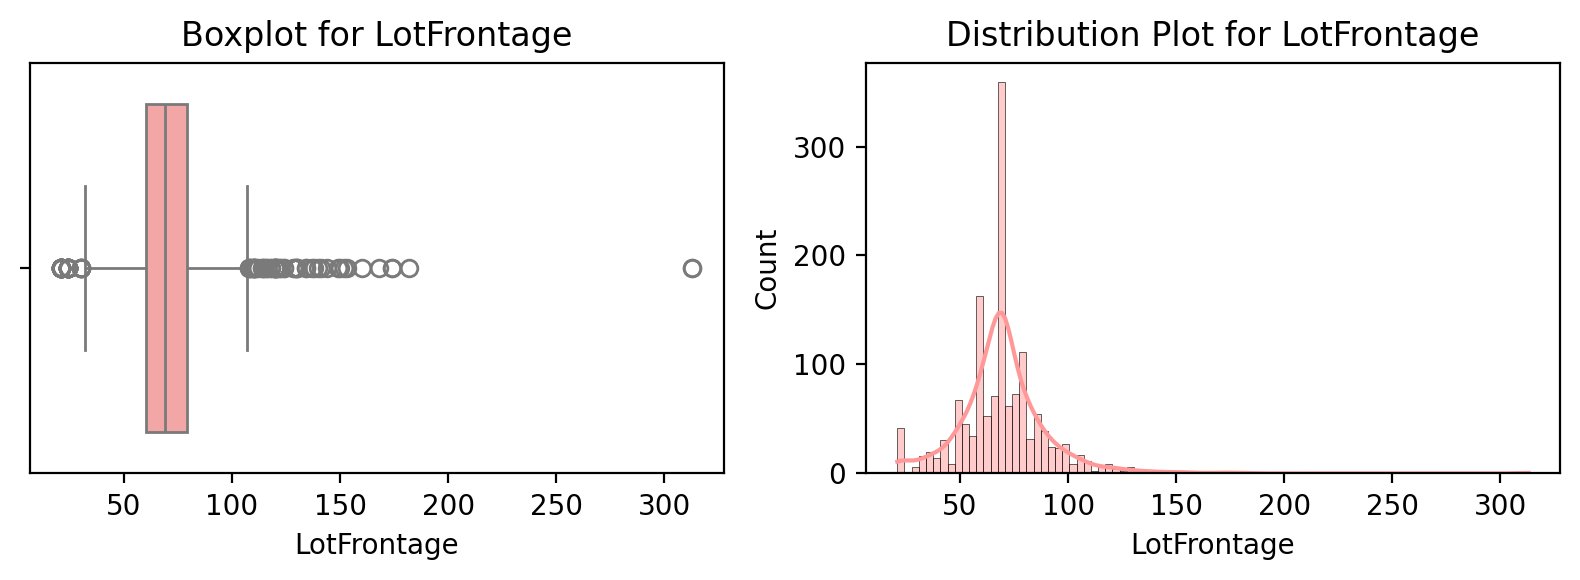

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64 0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64


In [120]:
combined_plot(df, 'LotFrontage')

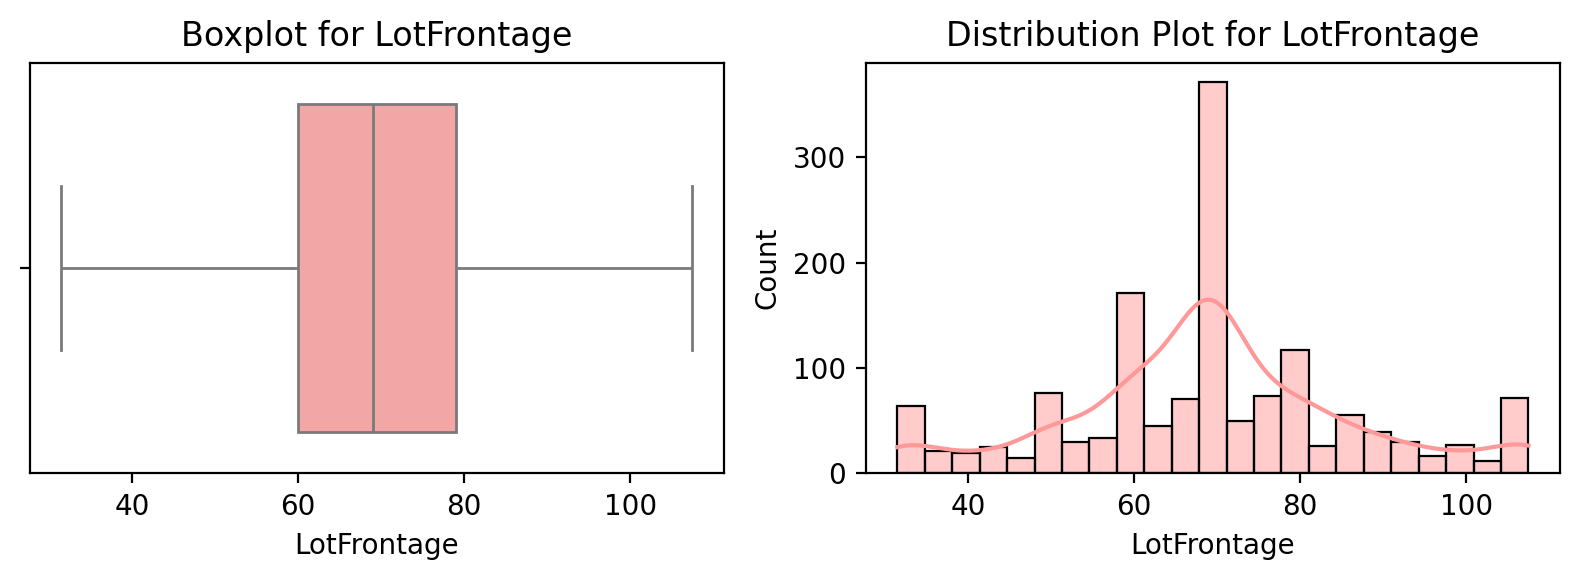

count    1460.000000
mean       69.090411
std        17.231909
min        31.500000
25%        60.000000
50%        69.000000
75%        79.000000
max       107.500000
Name: LotFrontage, dtype: float64 0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64


In [121]:
df['LotFrontage'] = IQR_capping(df, 'LotFrontage')
combined_plot(df, 'LotFrontage')

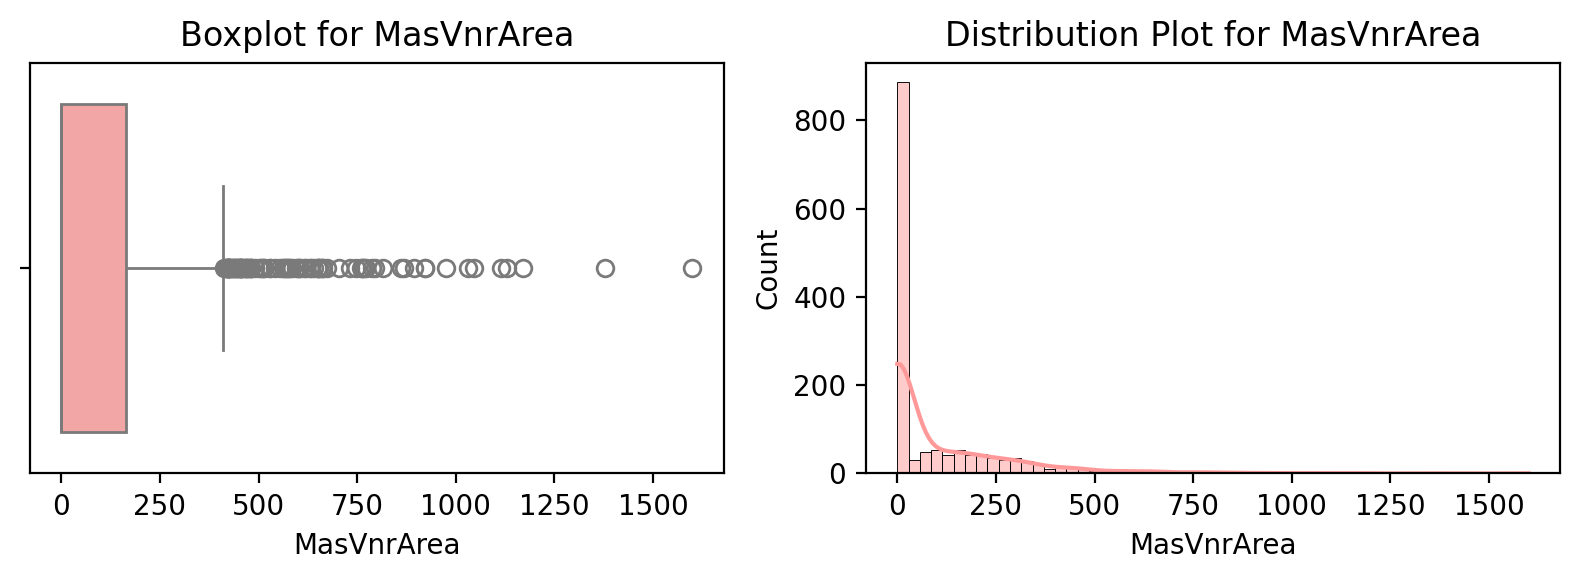

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64 0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64


In [122]:
combined_plot(df, 'MasVnrArea')


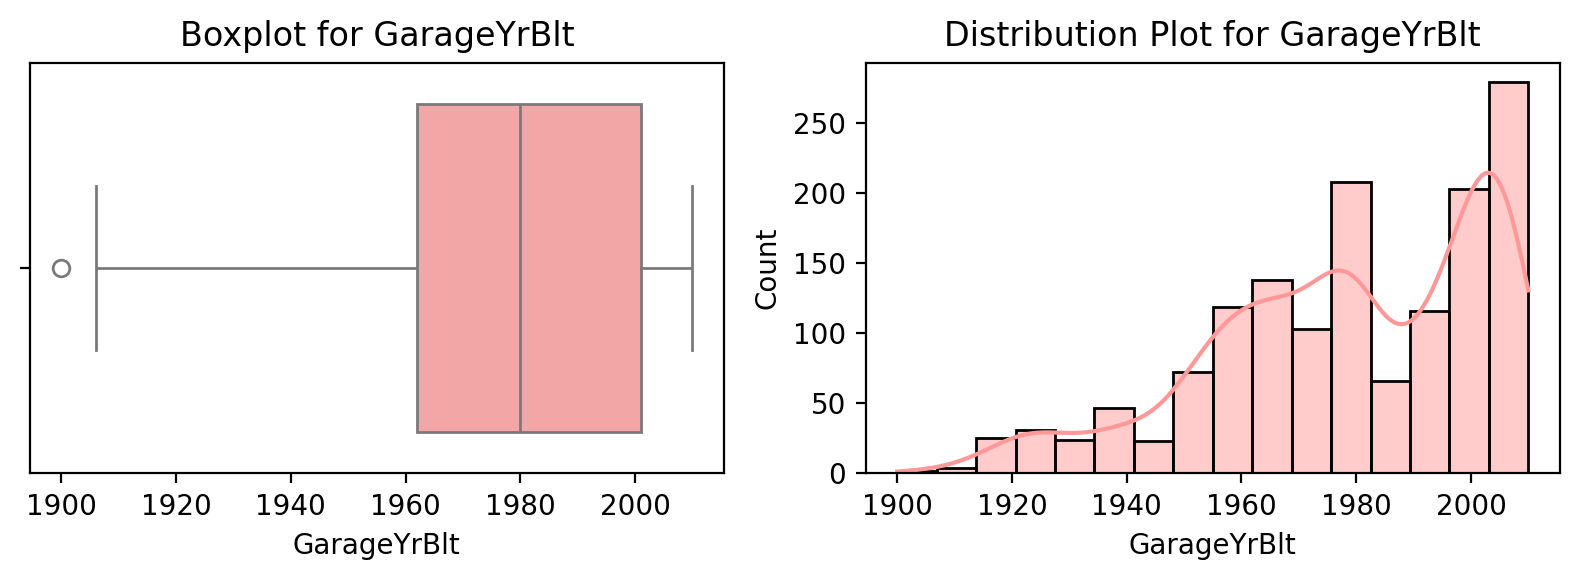

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64 0    2003.0
1    1976.0
2    2001.0
3    1998.0
4    2000.0
Name: GarageYrBlt, dtype: float64


In [123]:
combined_plot(df, 'GarageYrBlt')

In [124]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype(int)

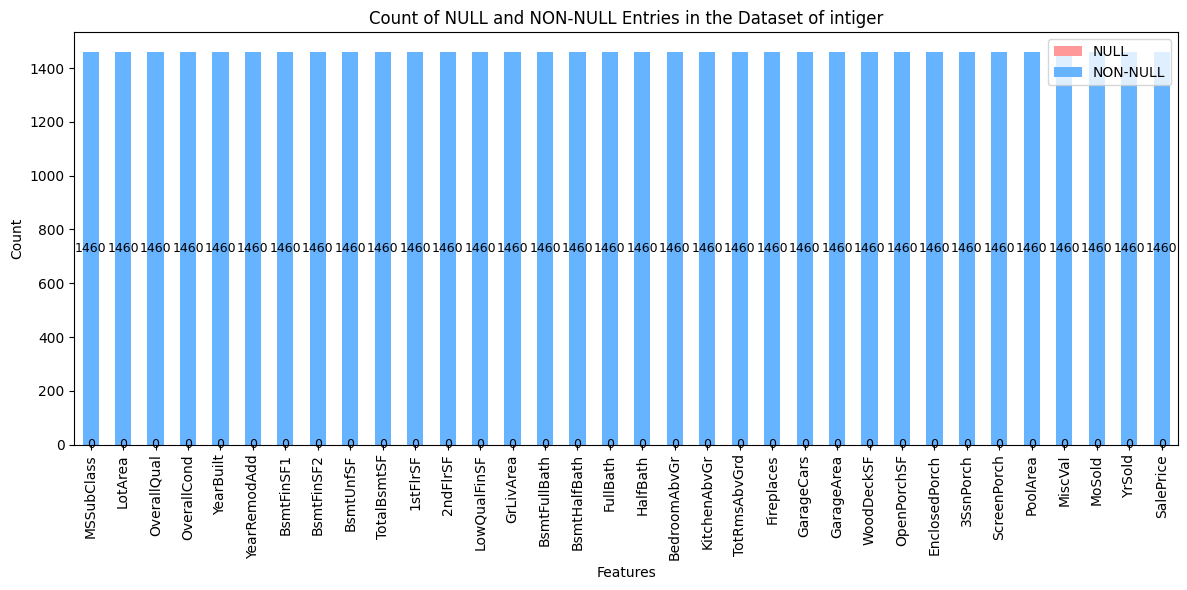

In [125]:
# intiger dataframe
check_null(df[int_columns], 'intiger')

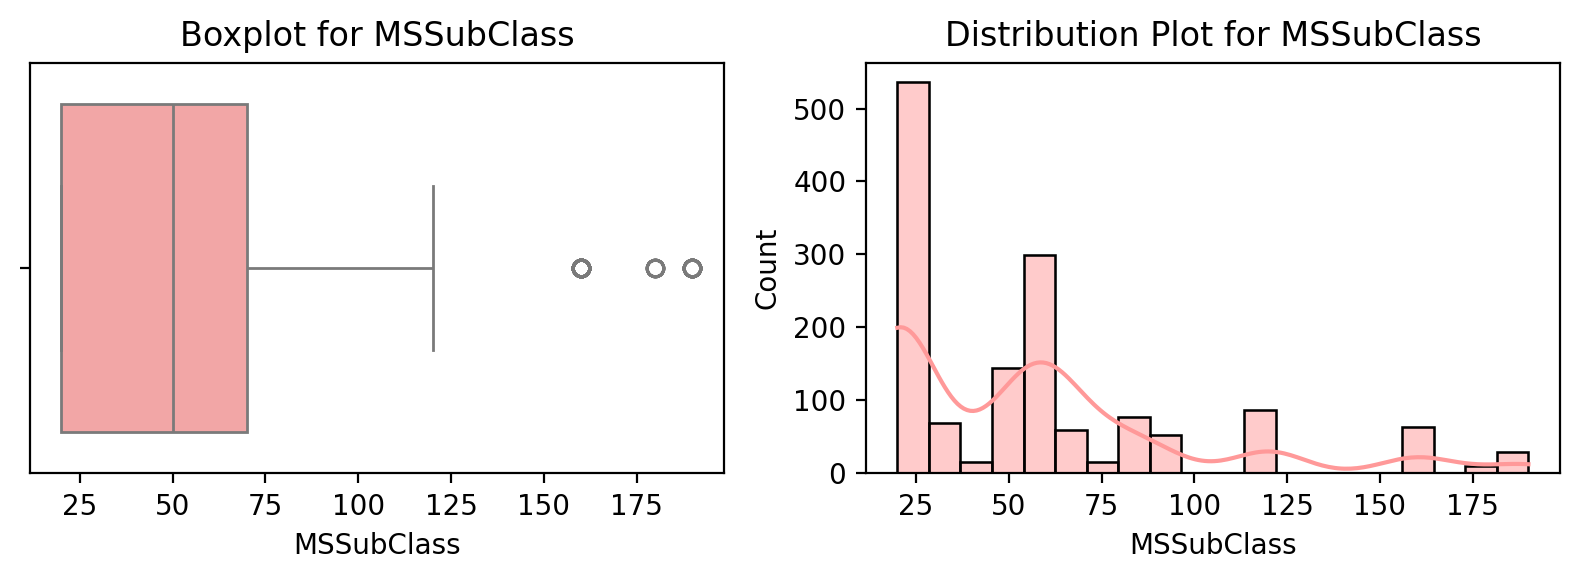

count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64 0    60
1    20
2    60
3    70
4    60
Name: MSSubClass, dtype: int64


In [126]:
combined_plot(df, 'MSSubClass')

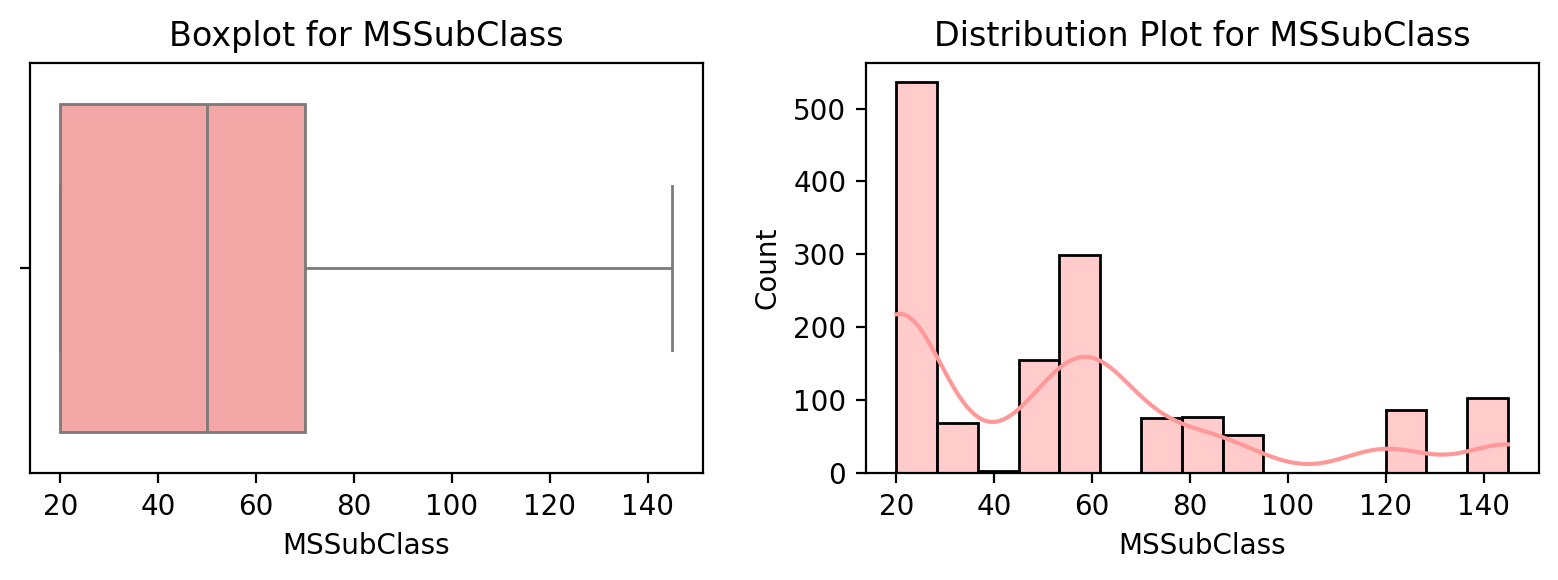

count    1460.000000
mean       55.085616
std        37.508183
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       145.000000
Name: MSSubClass, dtype: float64 0    60.0
1    20.0
2    60.0
3    70.0
4    60.0
Name: MSSubClass, dtype: float64


In [127]:
df['MSSubClass'] = IQR_capping(df, 'MSSubClass')
combined_plot(df, 'MSSubClass')

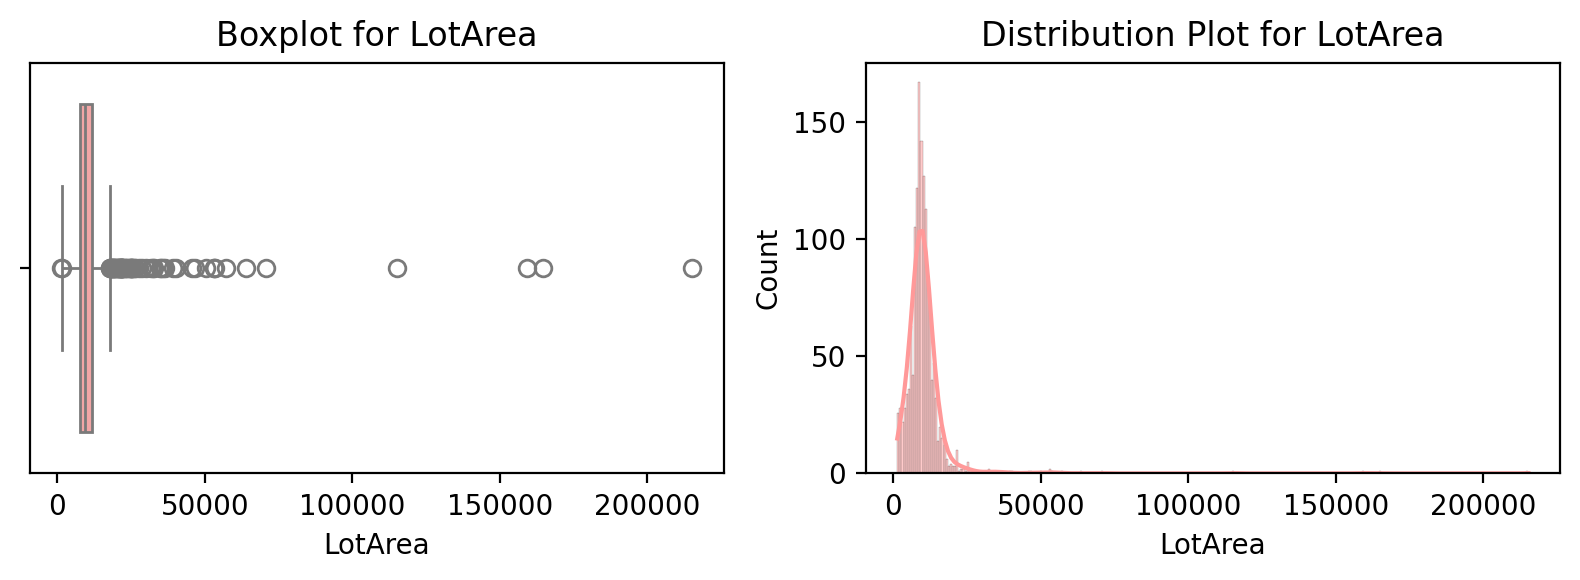

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64


In [128]:
combined_plot(df, 'LotArea')

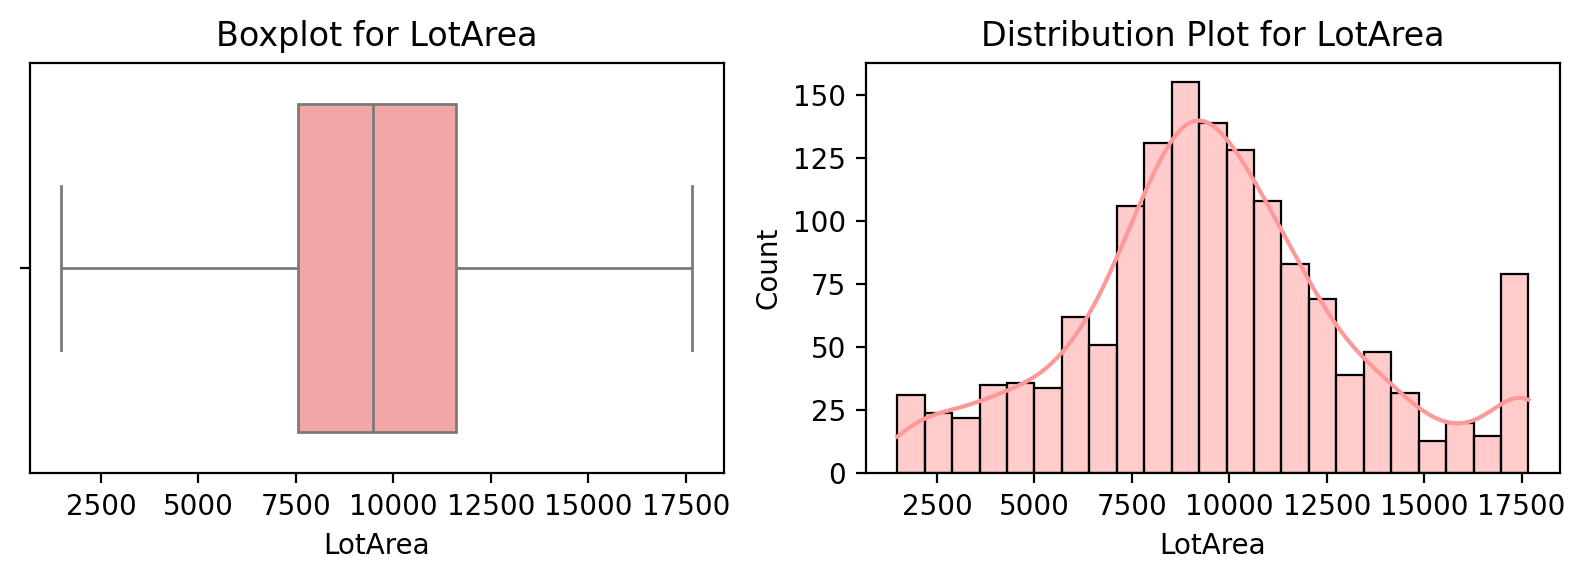

count     1460.000000
mean      9647.388014
std       3594.356399
min       1481.500000
25%       7553.500000
50%       9478.500000
75%      11601.500000
max      17673.500000
Name: LotArea, dtype: float64 0     8450.0
1     9600.0
2    11250.0
3     9550.0
4    14260.0
Name: LotArea, dtype: float64


In [129]:
df['LotArea'] = IQR_capping(df, 'LotArea')
combined_plot(df, 'LotArea')


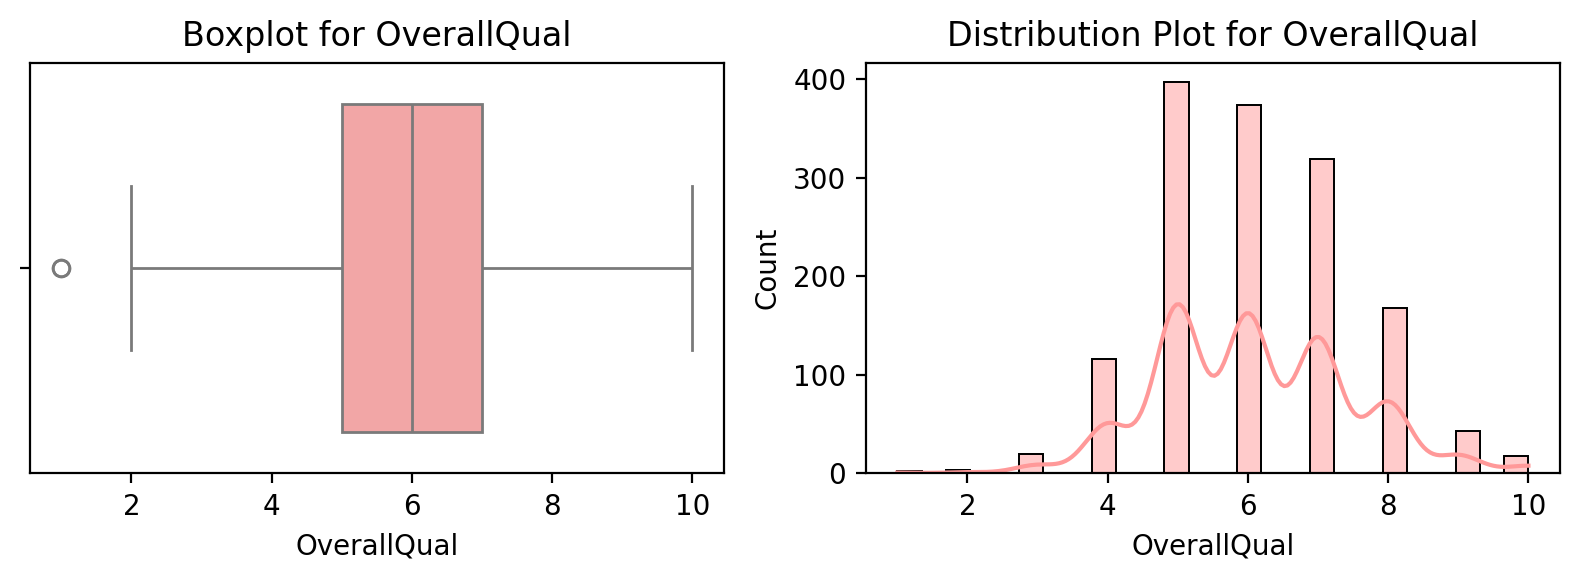

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64 0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64


In [130]:
combined_plot(df, 'OverallQual')

In [131]:
# df['OverallQual'] = IQR_capping(df, 'OverallQual')
# combined_plot(df, 'OverallQual')

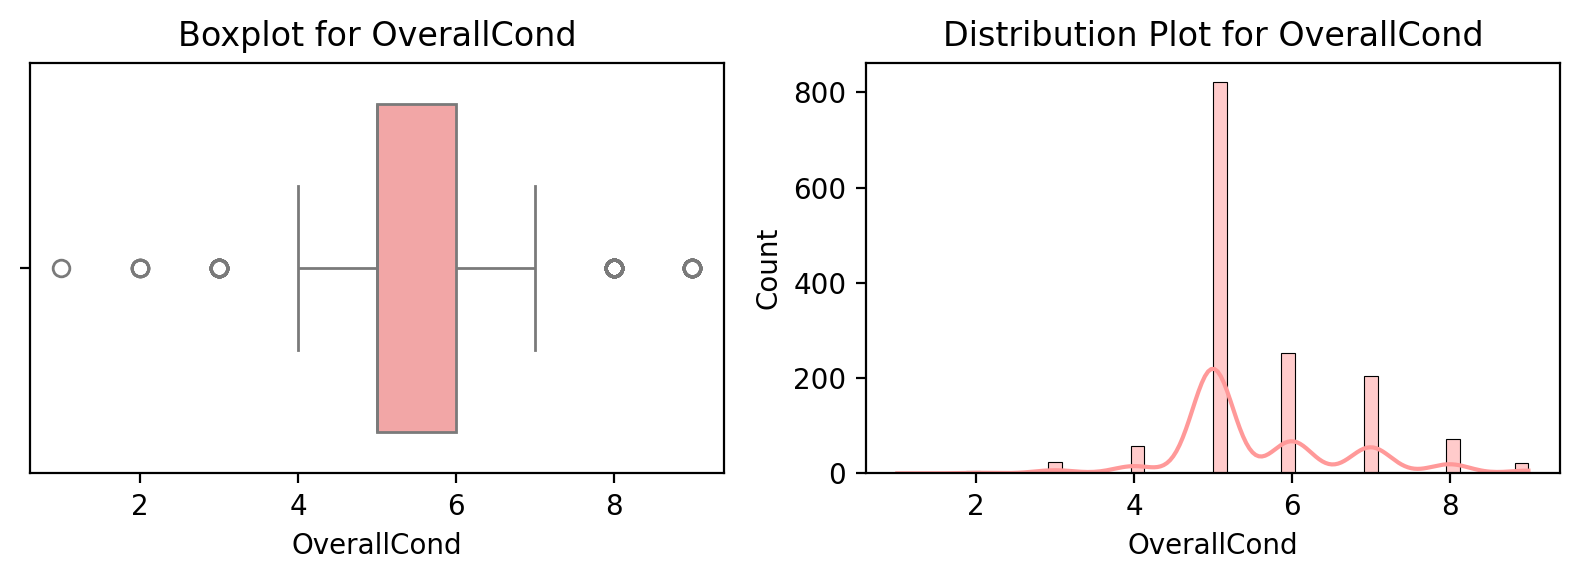

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallCond, dtype: float64 0    5
1    8
2    5
3    5
4    5
Name: OverallCond, dtype: int64


In [132]:
combined_plot(df, 'OverallCond')

In [133]:
# df['OverallCond'] = IQR_capping(df, 'OverallCond')
# combined_plot(df, 'OverallCond')

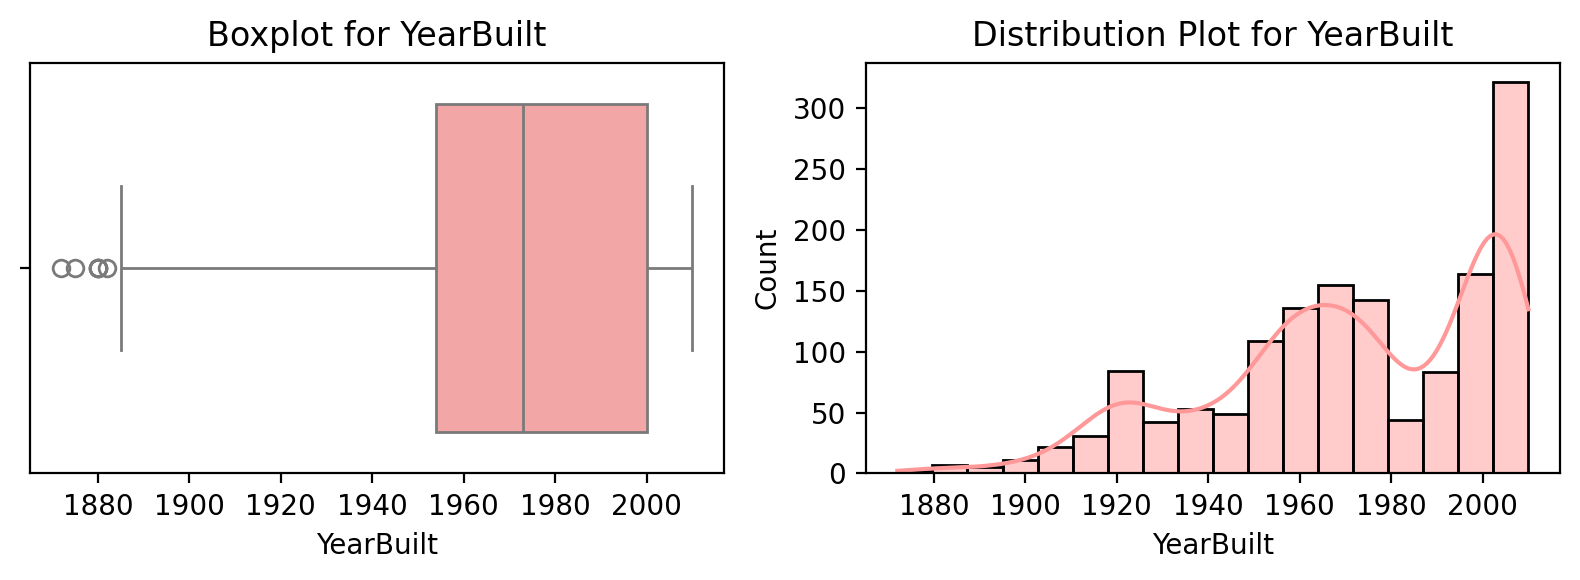

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64 0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64


In [134]:

combined_plot(df, 'YearBuilt')

In [135]:
# df = IQR_trimming(df, 'YearBuilt')
# combined_plot(df, 'YearBuilt')

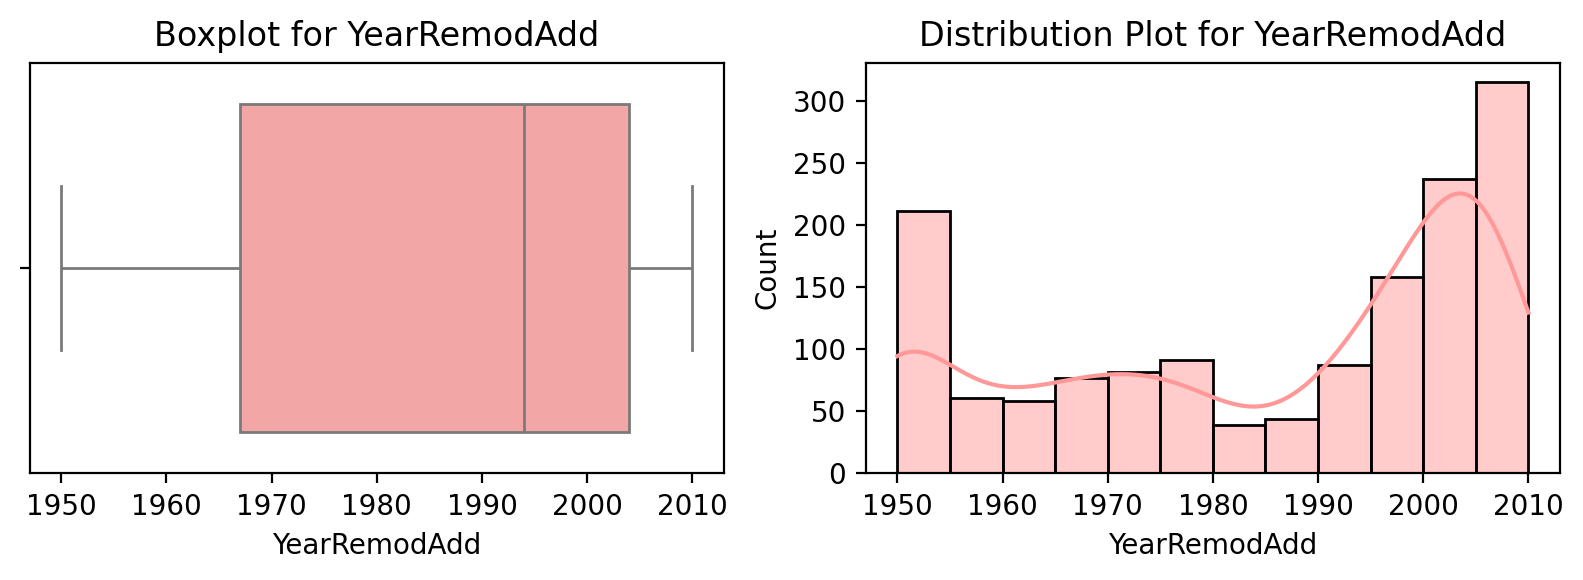

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64 0    2003
1    1976
2    2002
3    1970
4    2000
Name: YearRemodAdd, dtype: int64


In [136]:

combined_plot(df, 'YearRemodAdd')

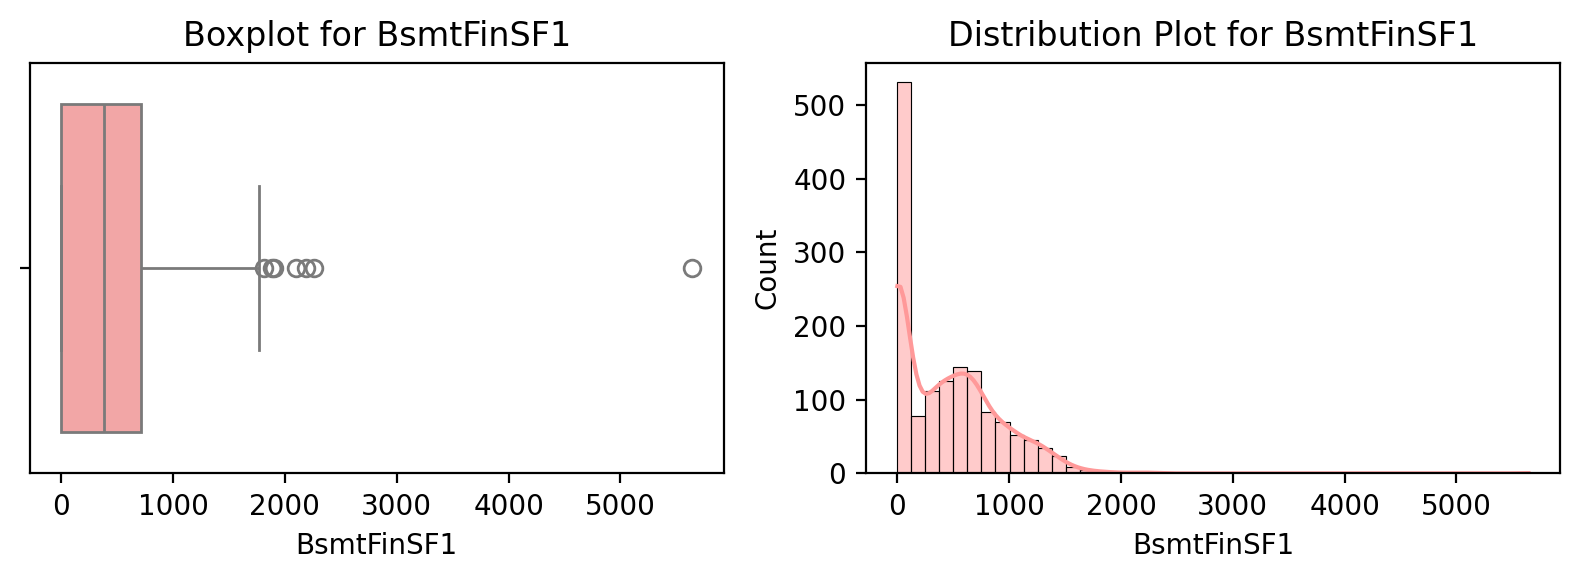

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      5644.000000
Name: BsmtFinSF1, dtype: float64 0    706
1    978
2    486
3    216
4    655
Name: BsmtFinSF1, dtype: int64


In [137]:
combined_plot(df, 'BsmtFinSF1')

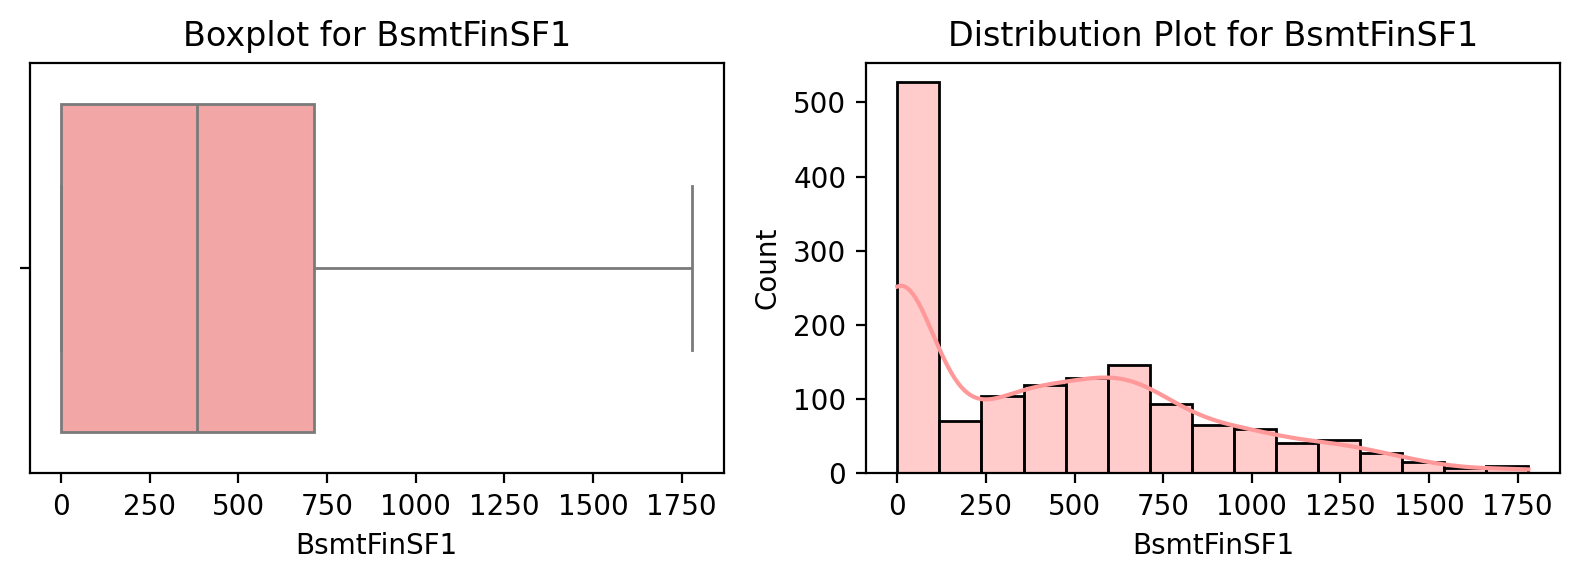

count    1460.000000
mean      439.997517
std       433.219435
min         0.000000
25%         0.000000
50%       383.500000
75%       712.250000
max      1780.625000
Name: BsmtFinSF1, dtype: float64 0    706.0
1    978.0
2    486.0
3    216.0
4    655.0
Name: BsmtFinSF1, dtype: float64


In [138]:
df['BsmtFinSF1'] = IQR_capping(df, 'BsmtFinSF1')
combined_plot(df, 'BsmtFinSF1')


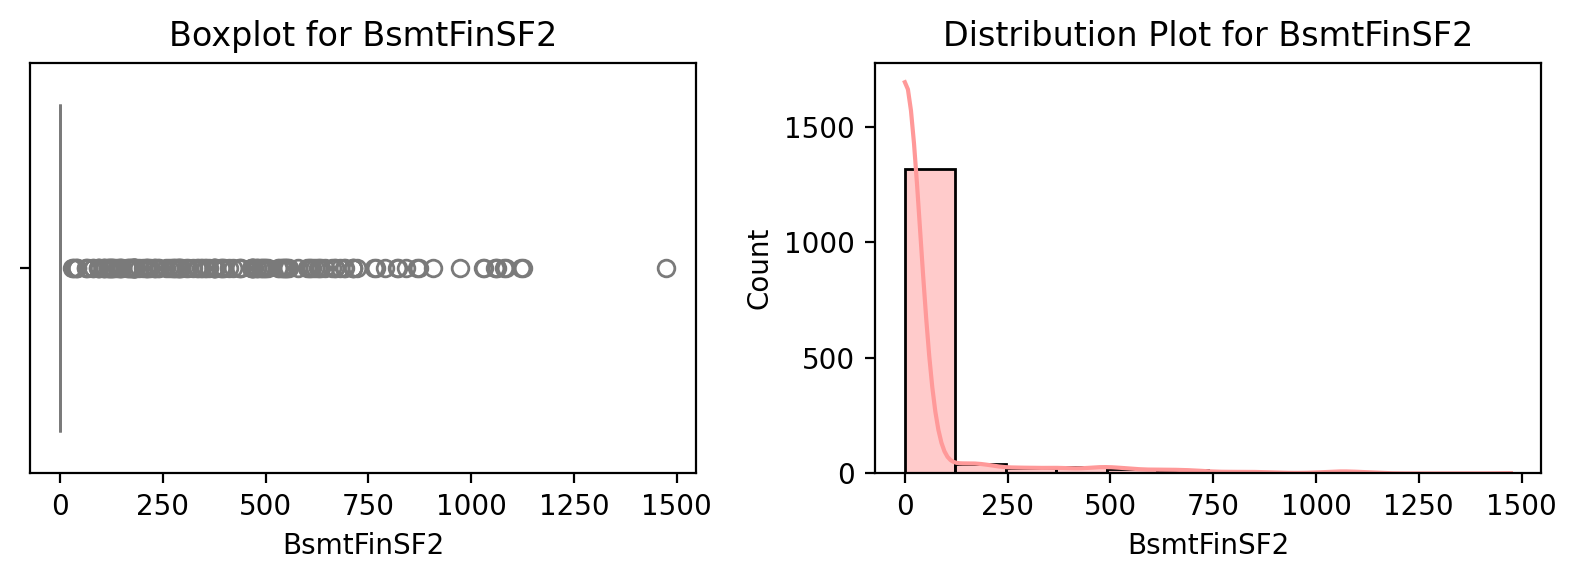

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64 0    0
1    0
2    0
3    0
4    0
Name: BsmtFinSF2, dtype: int64


In [139]:
combined_plot(df, 'BsmtFinSF2')

### drop

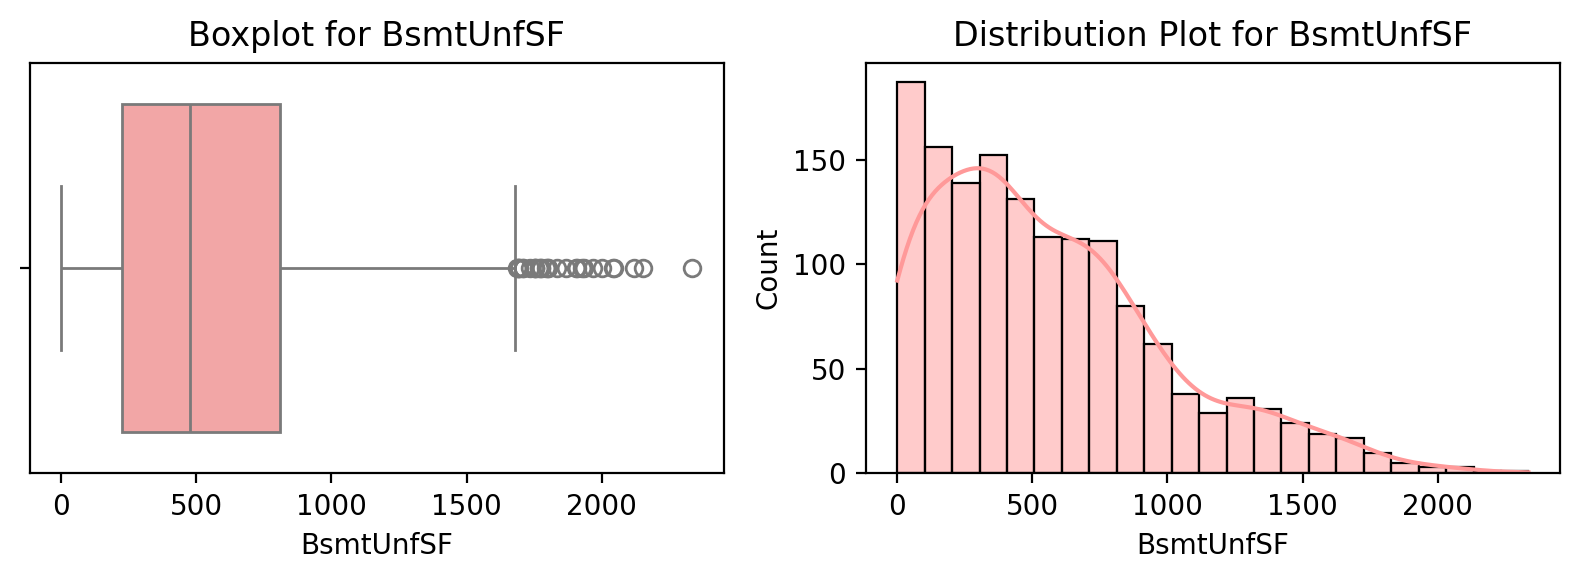

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      2336.000000
Name: BsmtUnfSF, dtype: float64 0    150
1    284
2    434
3    540
4    490
Name: BsmtUnfSF, dtype: int64


In [140]:
combined_plot(df, 'BsmtUnfSF')

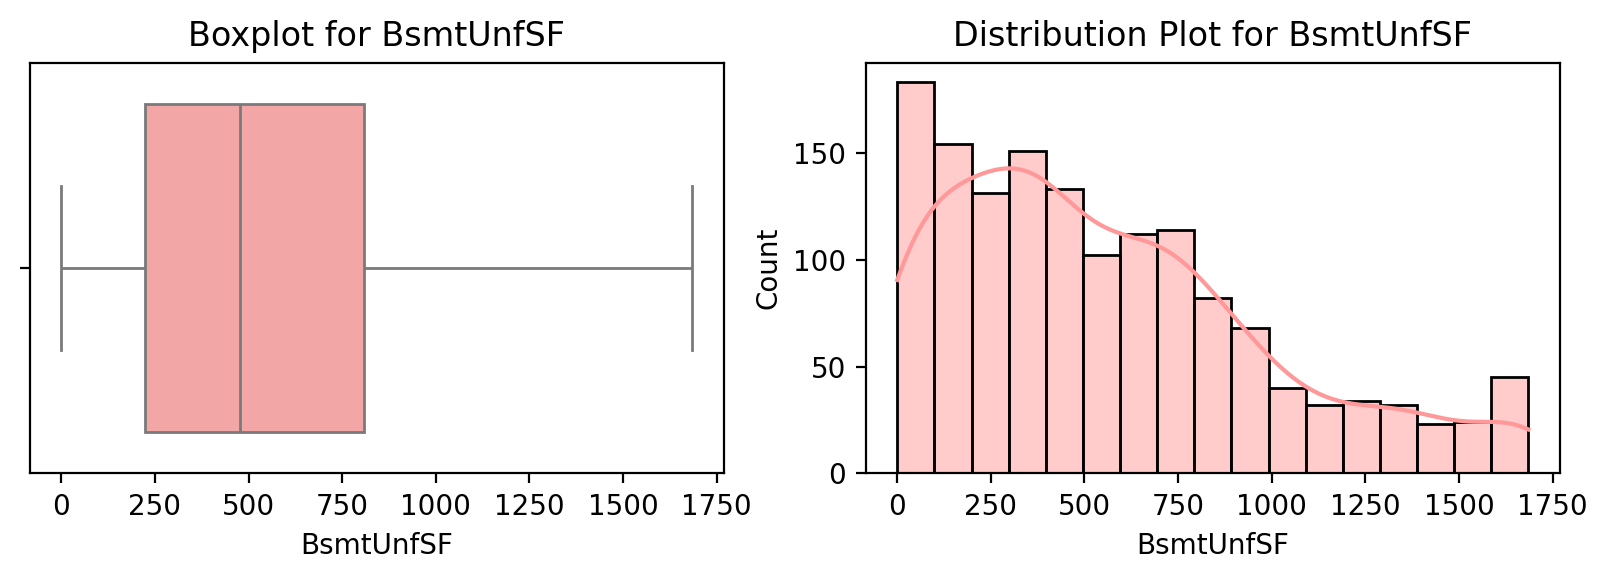

count    1460.000000
mean      563.777740
std       431.710214
min         0.000000
25%       223.000000
50%       477.500000
75%       808.000000
max      1685.500000
Name: BsmtUnfSF, dtype: float64 0    150.0
1    284.0
2    434.0
3    540.0
4    490.0
Name: BsmtUnfSF, dtype: float64


In [141]:
df['BsmtUnfSF'] = IQR_capping(df, 'BsmtUnfSF')
combined_plot(df, 'BsmtUnfSF')

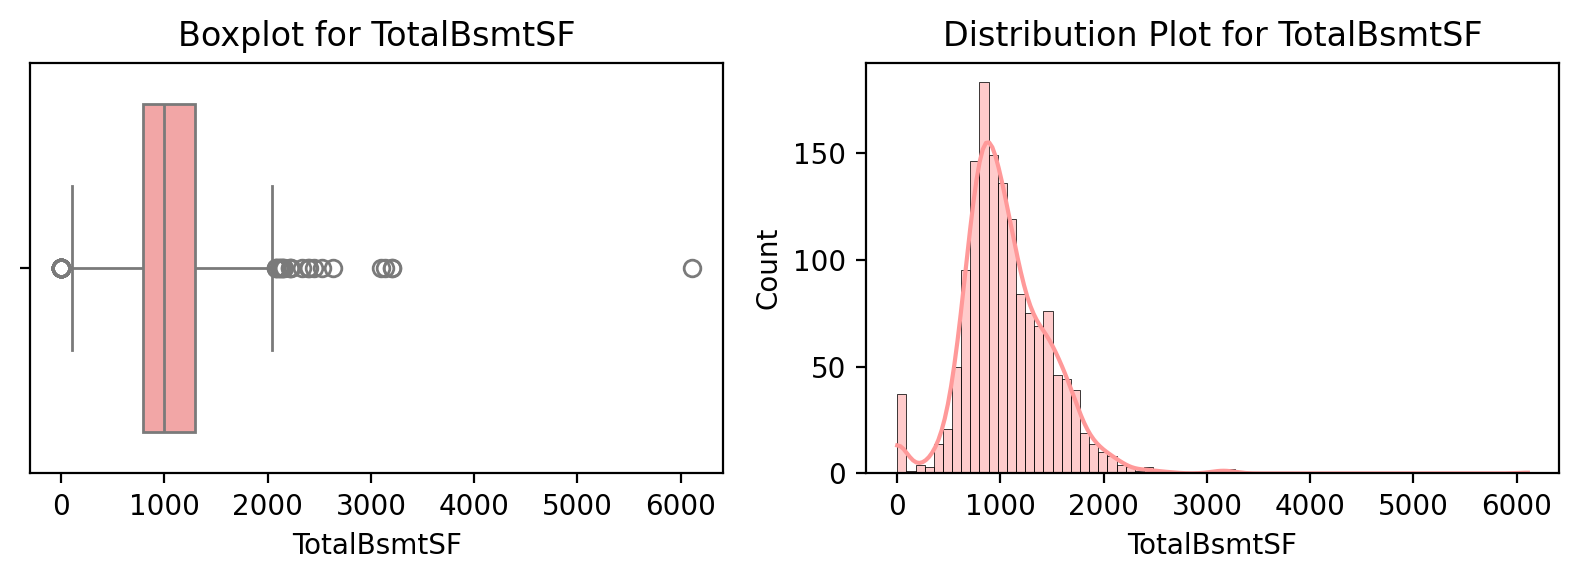

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      6110.000000
Name: TotalBsmtSF, dtype: float64 0     856
1    1262
2     920
3     756
4    1145
Name: TotalBsmtSF, dtype: int64


In [142]:
combined_plot(df, 'TotalBsmtSF')

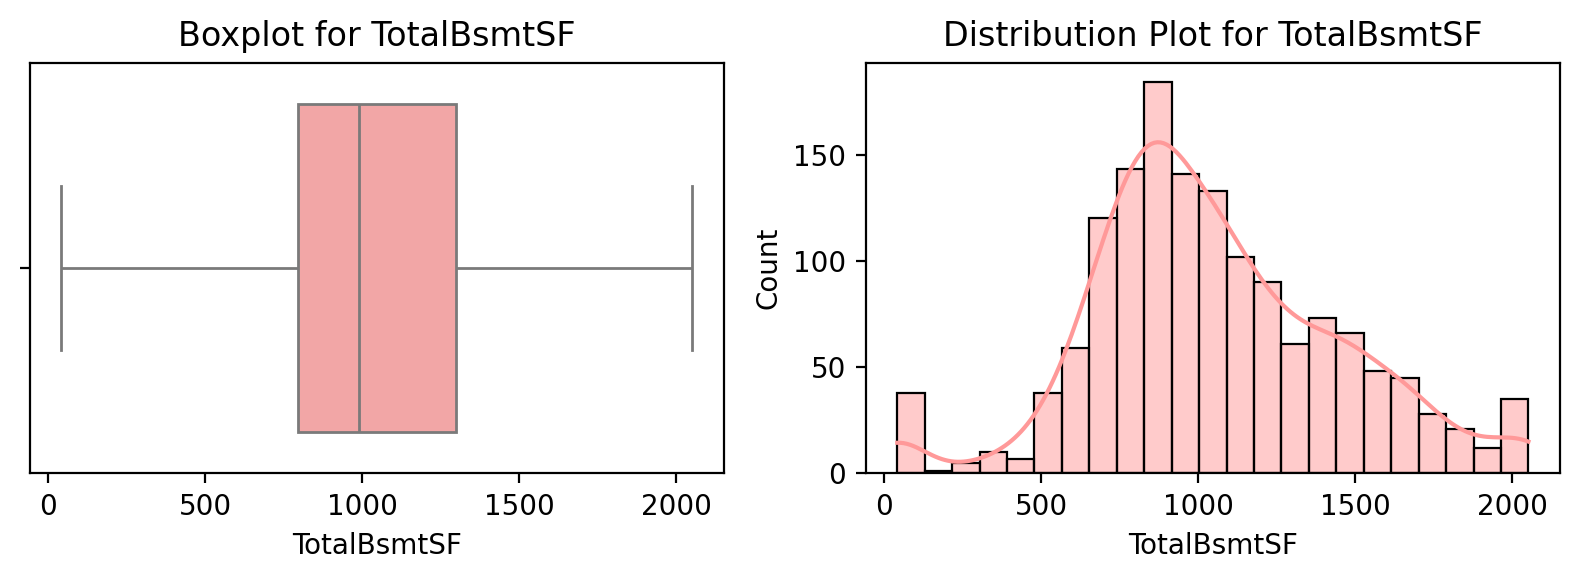

count    1460.000000
mean     1050.254795
std       397.937878
min        42.000000
25%       795.750000
50%       991.500000
75%      1298.250000
max      2052.000000
Name: TotalBsmtSF, dtype: float64 0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
Name: TotalBsmtSF, dtype: float64


In [143]:
df['TotalBsmtSF'] = IQR_capping(df, 'TotalBsmtSF')
combined_plot(df, 'TotalBsmtSF')

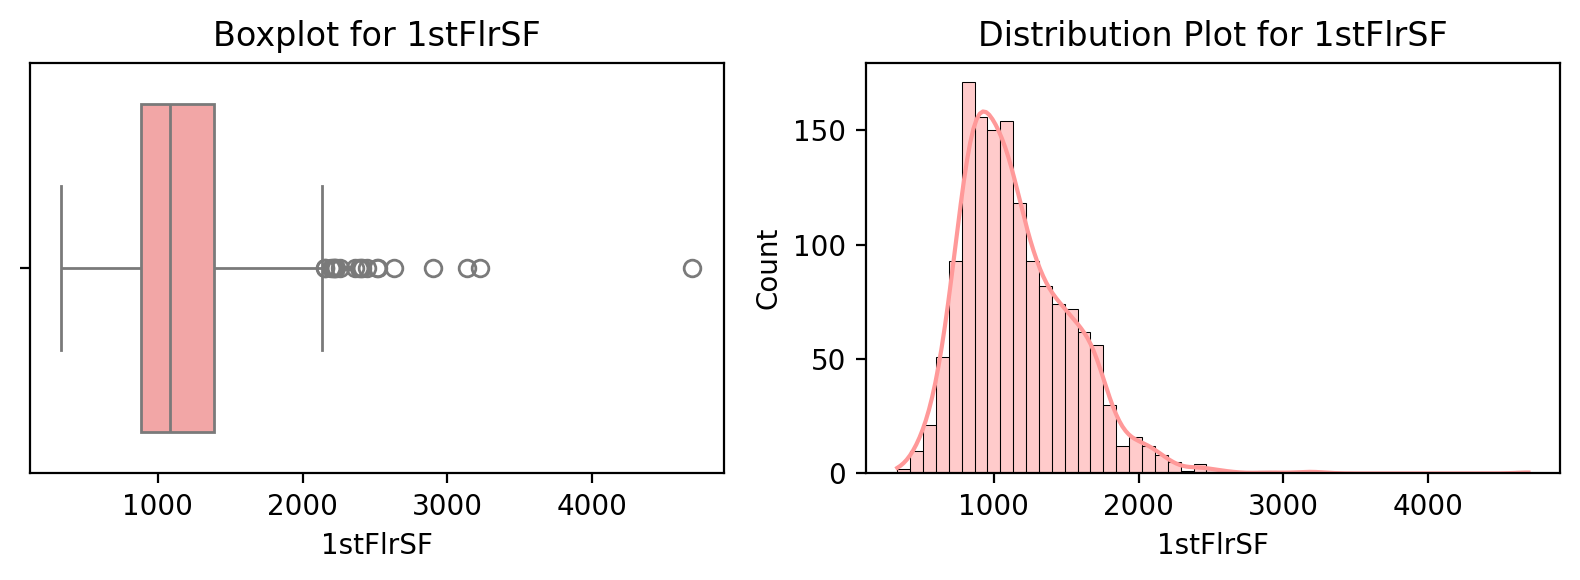

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64 0     856
1    1262
2     920
3     961
4    1145
Name: 1stFlrSF, dtype: int64


In [144]:
combined_plot(df, '1stFlrSF')


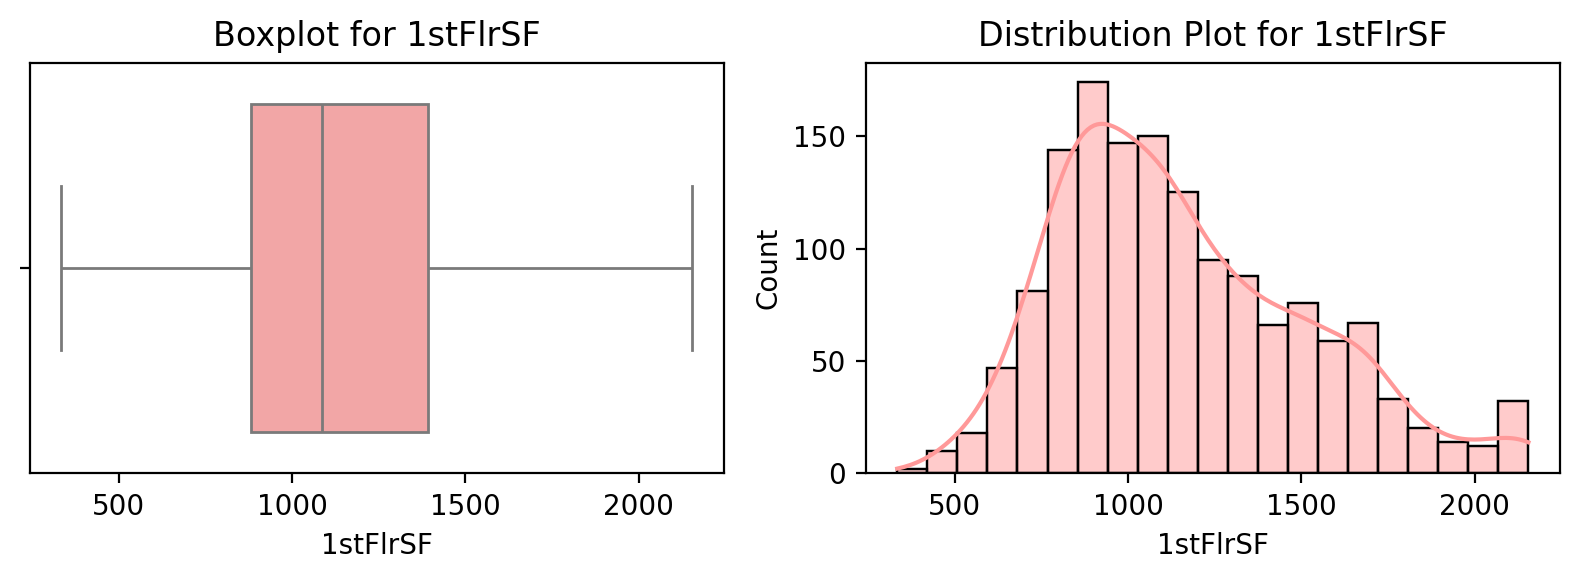

count    1460.000000
mean     1157.018151
std       362.583002
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      2155.125000
Name: 1stFlrSF, dtype: float64 0     856.0
1    1262.0
2     920.0
3     961.0
4    1145.0
Name: 1stFlrSF, dtype: float64


In [145]:
df['1stFlrSF'] = IQR_capping(df, '1stFlrSF')
combined_plot(df, '1stFlrSF')

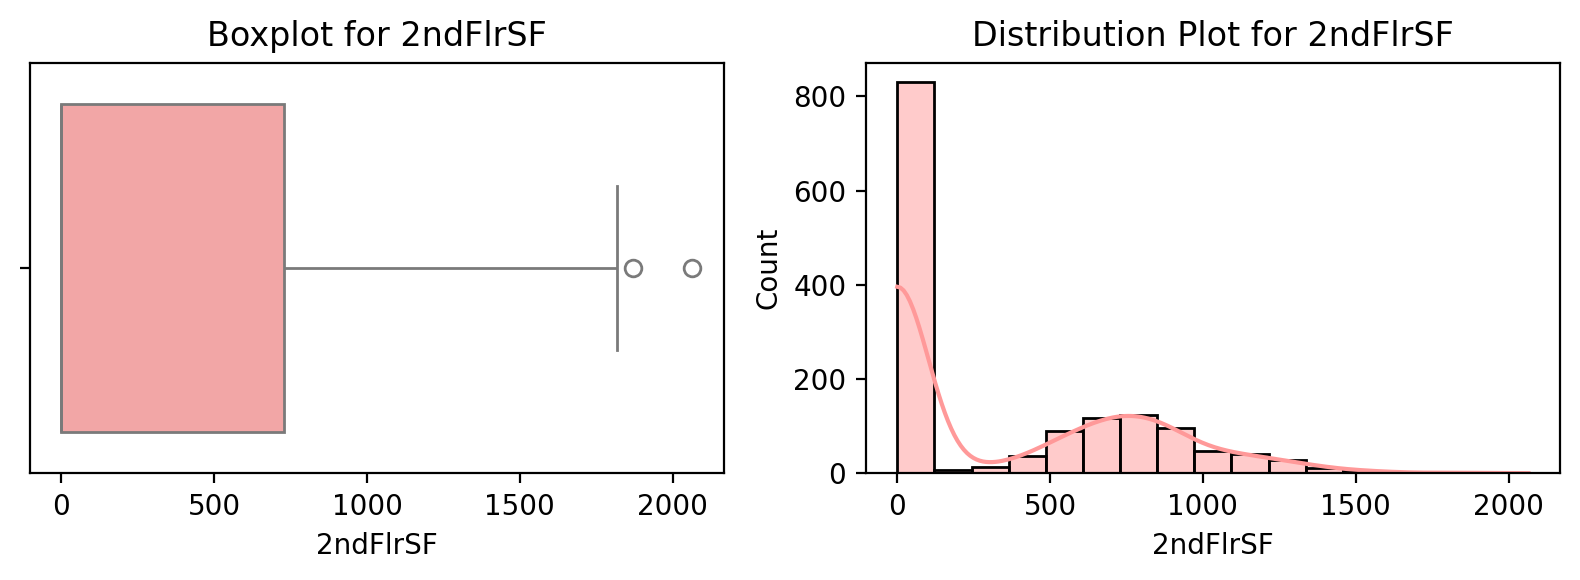

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      2065.000000
Name: 2ndFlrSF, dtype: float64 0     854
1       0
2     866
3     756
4    1053
Name: 2ndFlrSF, dtype: int64


In [146]:
combined_plot(df, '2ndFlrSF')

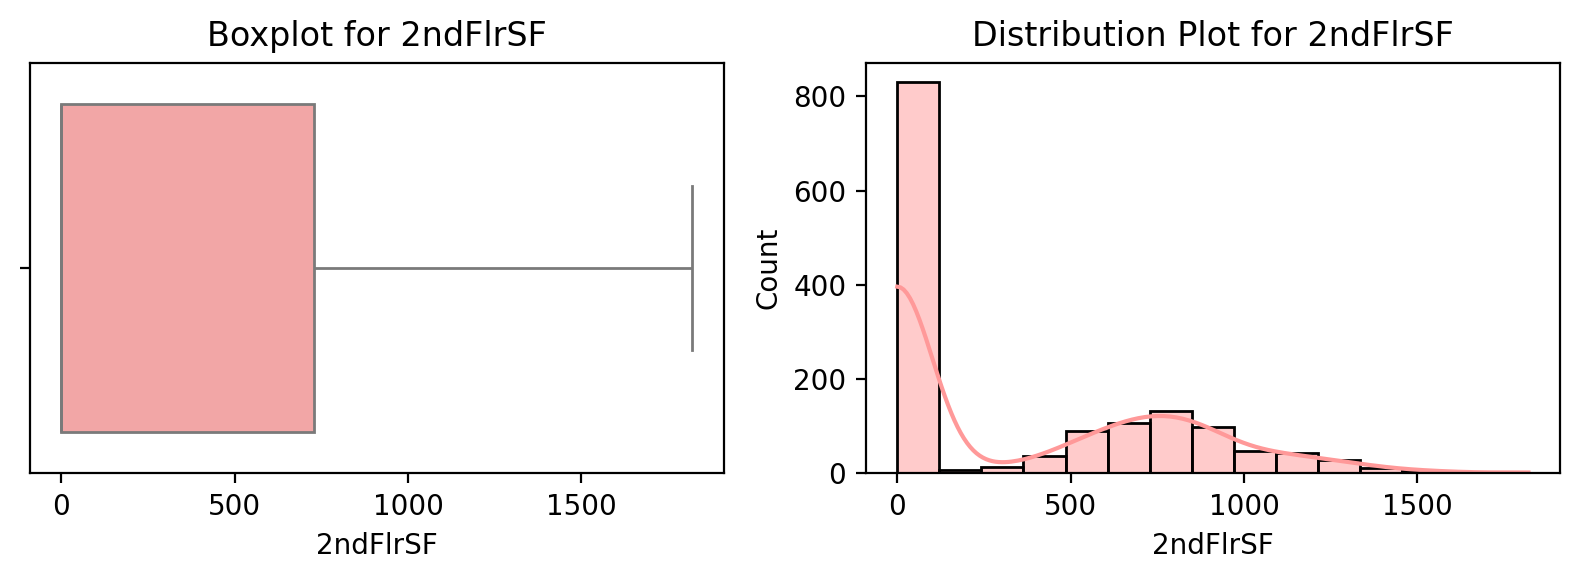

count    1460.000000
mean      346.789041
std       435.791621
min         0.000000
25%         0.000000
50%         0.000000
75%       728.000000
max      1820.000000
Name: 2ndFlrSF, dtype: float64 0     854.0
1       0.0
2     866.0
3     756.0
4    1053.0
Name: 2ndFlrSF, dtype: float64


In [147]:
df['2ndFlrSF'] = IQR_capping(df, '2ndFlrSF')
combined_plot(df, '2ndFlrSF')

In [148]:
# combined_plot(df, 'LowQualFinSF')

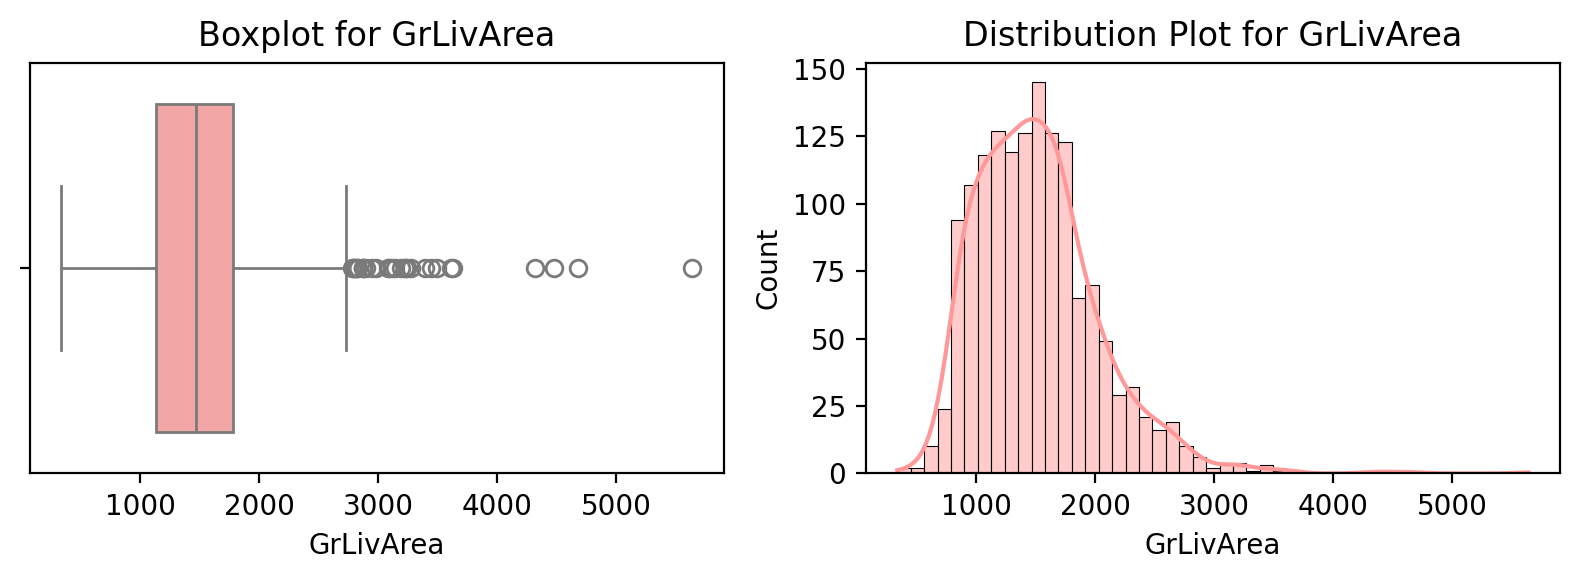

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64 0    1710
1    1262
2    1786
3    1717
4    2198
Name: GrLivArea, dtype: int64


In [149]:
combined_plot(df, 'GrLivArea')

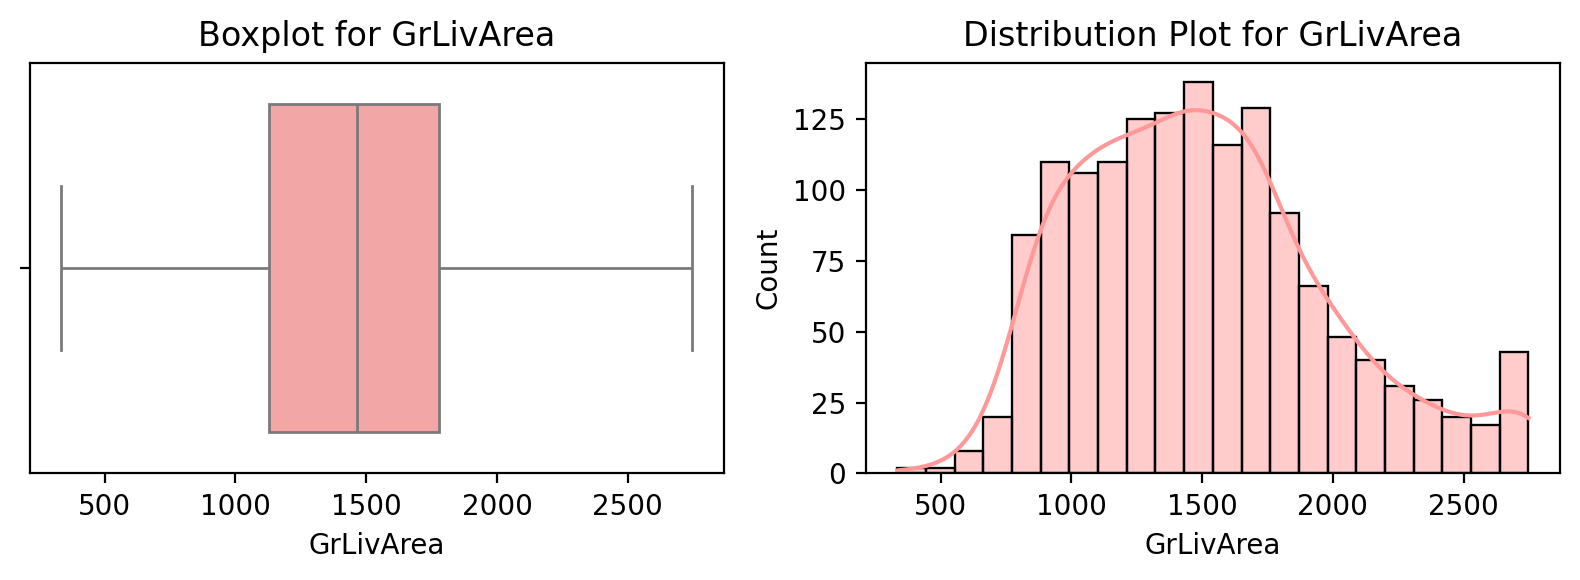

count    1460.000000
mean     1503.735873
std       481.375641
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      2747.625000
Name: GrLivArea, dtype: float64 0    1710.0
1    1262.0
2    1786.0
3    1717.0
4    2198.0
Name: GrLivArea, dtype: float64


In [150]:
df['GrLivArea'] = IQR_capping(df, 'GrLivArea')
combined_plot(df, 'GrLivArea')

In [151]:
# combined_plot(df, 'BsmtFullBath')
df['BsmtFullBath'].unique()

array([1, 0, 2, 3])

In [152]:
# combined_plot(df, 'BsmtHalfBath')
df['BsmtHalfBath'].unique()

array([0, 1, 2])

In [153]:
# combined_plot(df, 'FullBath')
df['FullBath'].unique()

array([2, 1, 3, 0])

In [154]:
# combined_plot(df, 'HalfBath')
df['HalfBath'].unique()

array([1, 0, 2])

In [155]:
# combined_plot(df, 'BedroomAbvGr')
df['BedroomAbvGr'].unique()

array([3, 4, 1, 2, 0, 5, 6, 8])

In [156]:
# df['BedroomAbvGr'] = IQR_capping(df, 'BedroomAbvGr')
# combined_plot(df, 'BedroomAbvGr')

In [157]:
# combined_plot(df, 'KitchenAbvGr')
df['KitchenAbvGr'].unique()

array([1, 2, 3, 0])

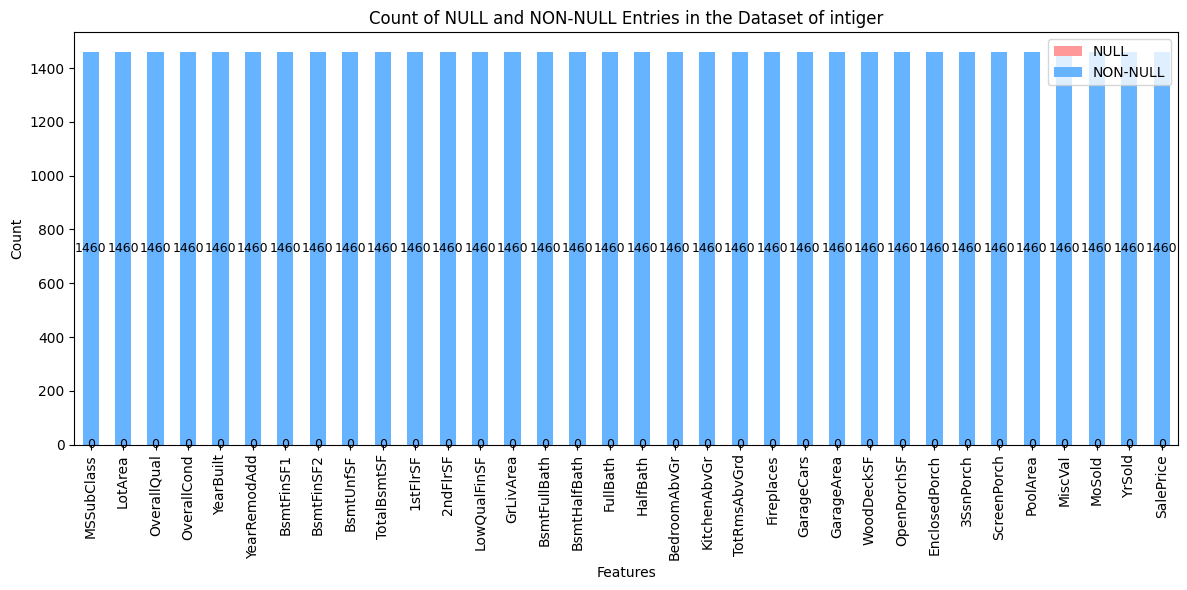

In [158]:
check_null(df[int_columns], 'intiger')

In [159]:
# df['KitchenAbvGr'] = IQR_capping(df, 'KitchenAbvGr')
# combined_plot(df, 'KitchenAbvGr')

In [160]:
# combined_plot(df, 'TotRmsAbvGrd')
df['TotRmsAbvGrd'].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14])

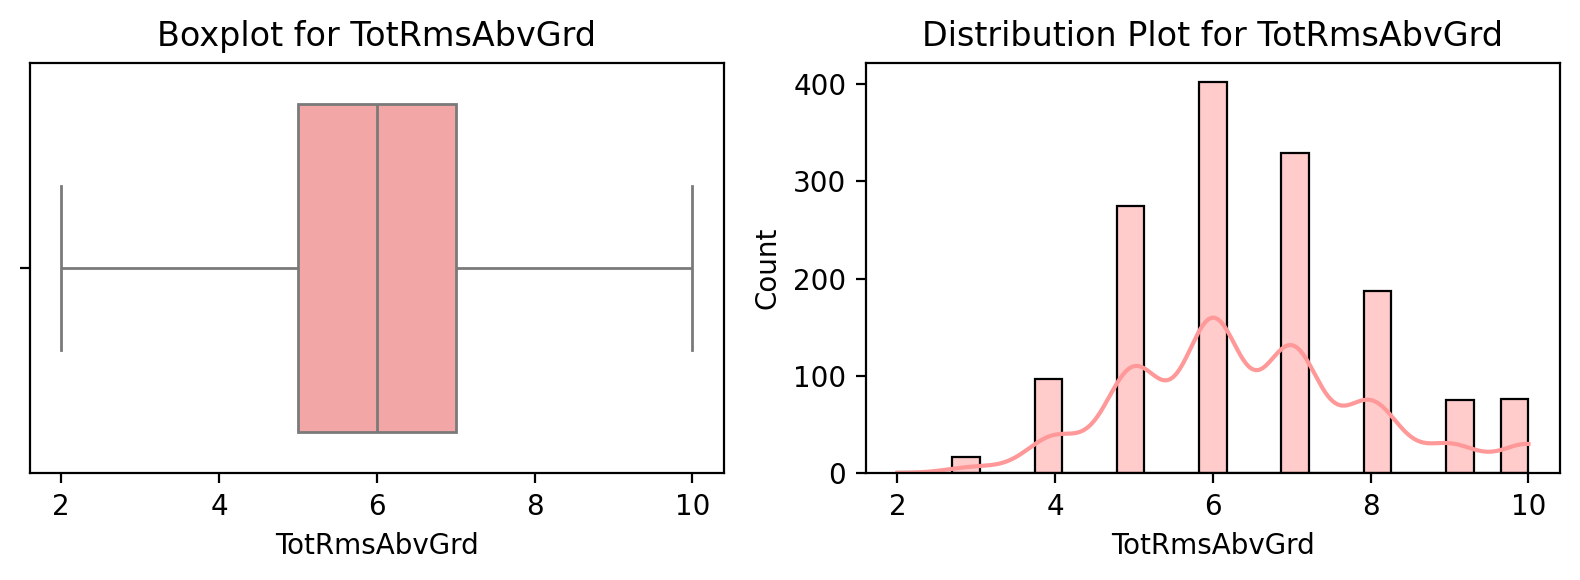

count    1460.000000
mean        6.487671
std         1.541916
min         2.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: TotRmsAbvGrd, dtype: float64 0    8.0
1    6.0
2    6.0
3    7.0
4    9.0
Name: TotRmsAbvGrd, dtype: float64


In [161]:
df['TotRmsAbvGrd'] = IQR_capping(df, 'TotRmsAbvGrd')
combined_plot(df, 'TotRmsAbvGrd')

In [162]:
# combined_plot(df, 'Fireplaces')
df['Fireplaces'].unique()

array([0, 1, 2, 3])

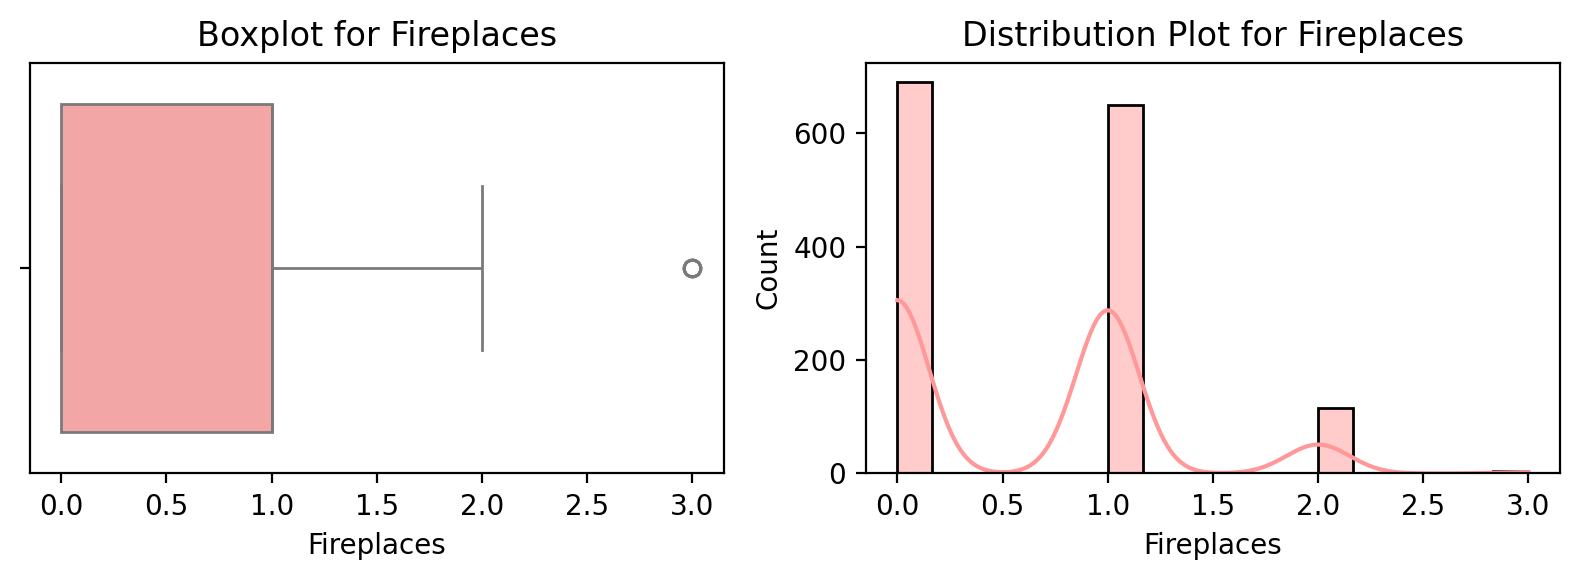

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: Fireplaces, dtype: float64 0    0
1    1
2    1
3    1
4    1
Name: Fireplaces, dtype: int64


In [163]:
# df['Fireplaces'] = IQR_capping(df, 'Fireplaces')
combined_plot(df, 'Fireplaces')

In [164]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype('int')

In [165]:
# combined_plot(df, 'GarageCars')
df['GarageCars'].unique()

array([2, 3, 1, 0, 4])

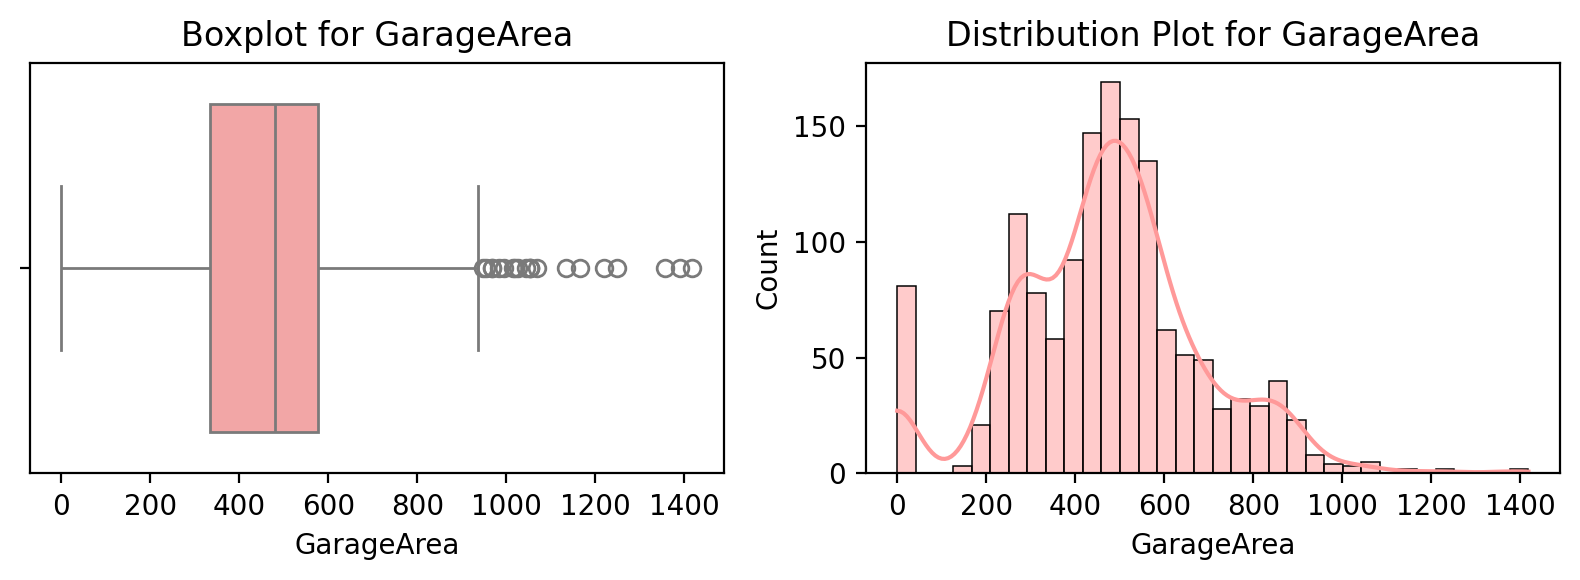

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64 0    548
1    460
2    608
3    642
4    836
Name: GarageArea, dtype: int64


In [166]:
combined_plot(df, 'GarageArea')

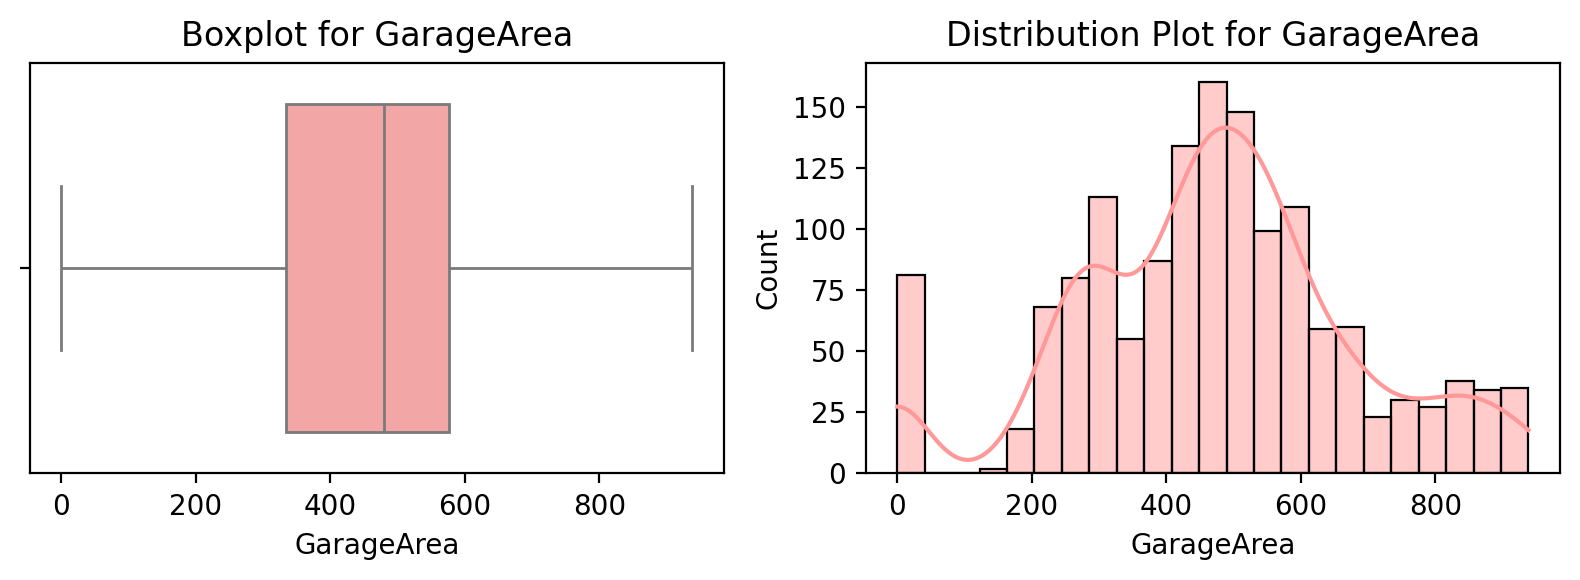

count    1460.000000
mean      470.670719
std       207.105729
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max       938.250000
Name: GarageArea, dtype: float64 0    548.0
1    460.0
2    608.0
3    642.0
4    836.0
Name: GarageArea, dtype: float64


In [167]:
df['GarageArea'] = IQR_capping(df, 'GarageArea')
combined_plot(df, 'GarageArea')

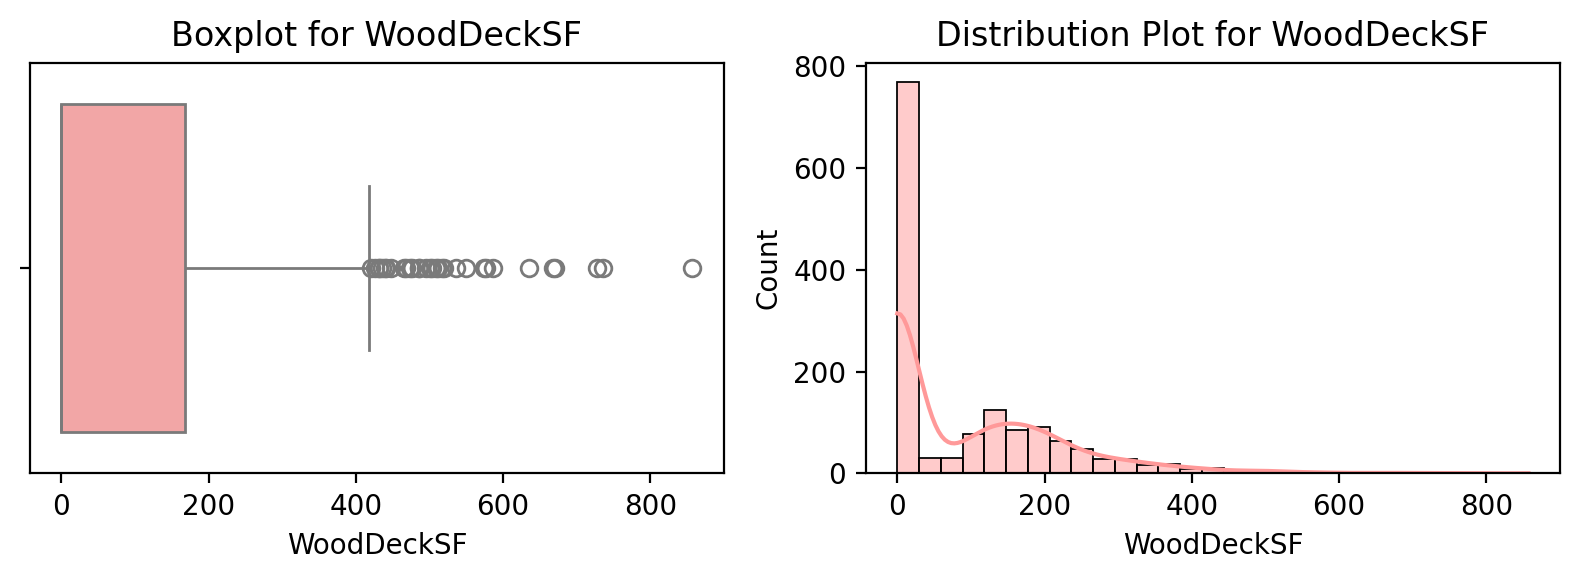

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       857.000000
Name: WoodDeckSF, dtype: float64 0      0
1    298
2      0
3      0
4    192
Name: WoodDeckSF, dtype: int64


In [168]:
combined_plot(df, 'WoodDeckSF')

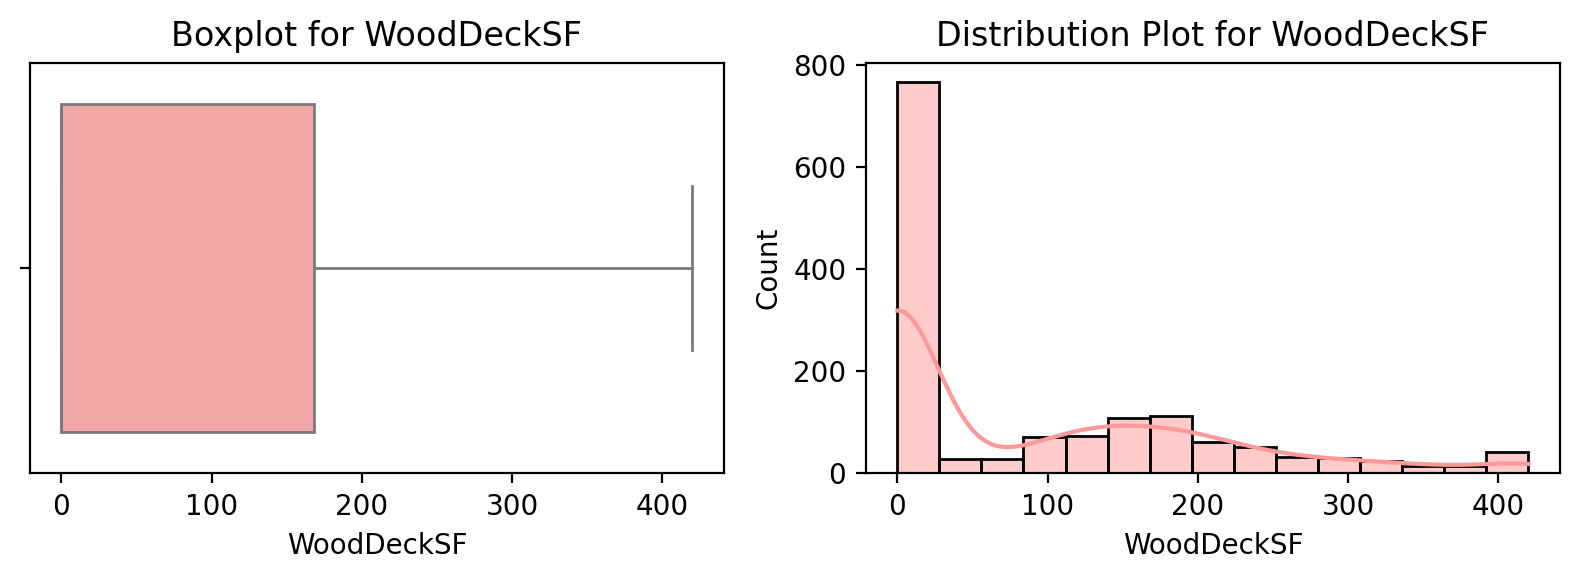

count    1460.000000
mean       91.806849
std       116.658120
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max       420.000000
Name: WoodDeckSF, dtype: float64 0      0.0
1    298.0
2      0.0
3      0.0
4    192.0
Name: WoodDeckSF, dtype: float64


In [169]:
df['WoodDeckSF'] = IQR_capping(df, 'WoodDeckSF')
combined_plot(df, 'WoodDeckSF')

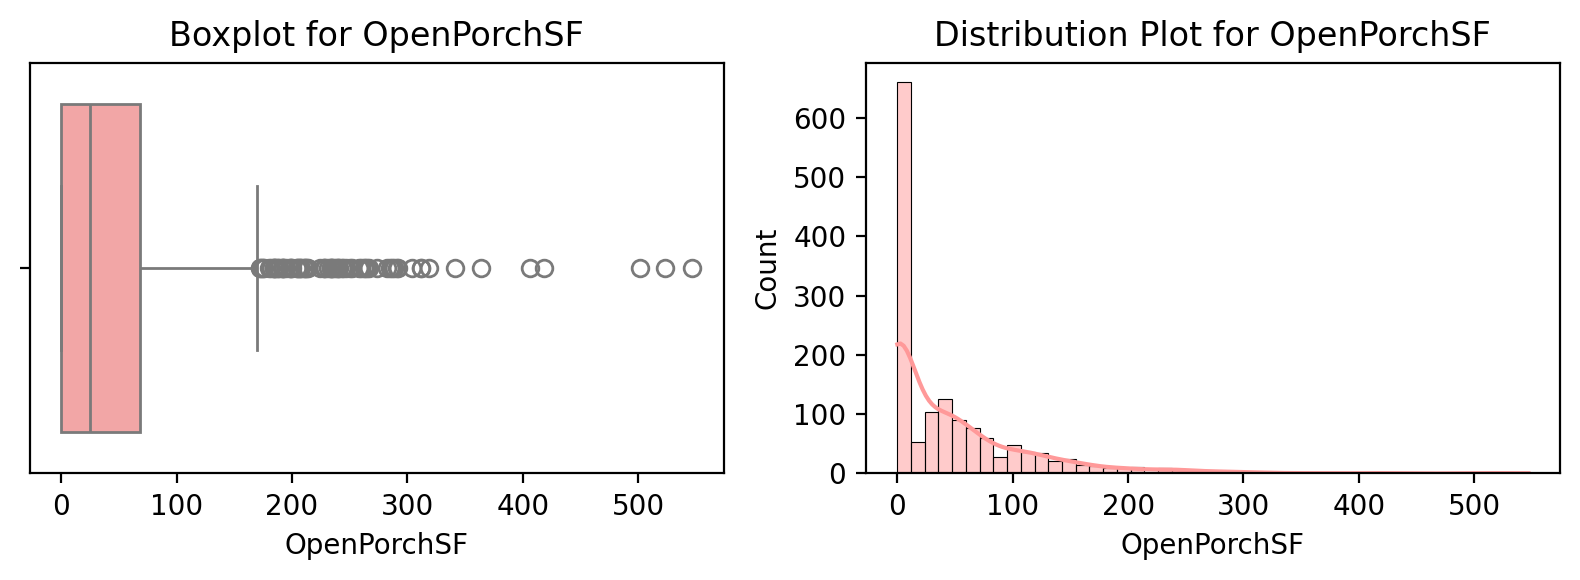

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       547.000000
Name: OpenPorchSF, dtype: float64 0    61
1     0
2    42
3    35
4    84
Name: OpenPorchSF, dtype: int64


In [170]:
combined_plot(df, 'OpenPorchSF')

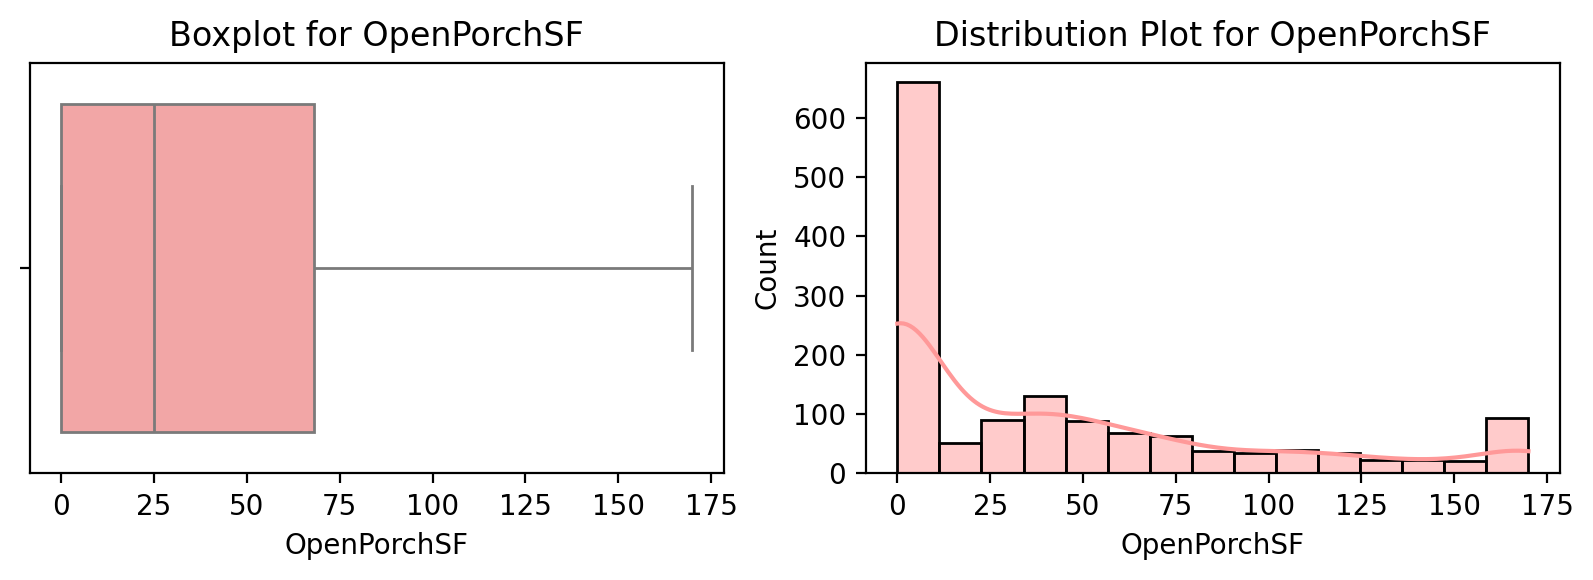

count    1460.000000
mean       42.603425
std        52.501584
min         0.000000
25%         0.000000
50%        25.000000
75%        68.000000
max       170.000000
Name: OpenPorchSF, dtype: float64 0    61.0
1     0.0
2    42.0
3    35.0
4    84.0
Name: OpenPorchSF, dtype: float64


In [171]:
df['OpenPorchSF'] = IQR_capping(df, 'OpenPorchSF')
combined_plot(df, 'OpenPorchSF')

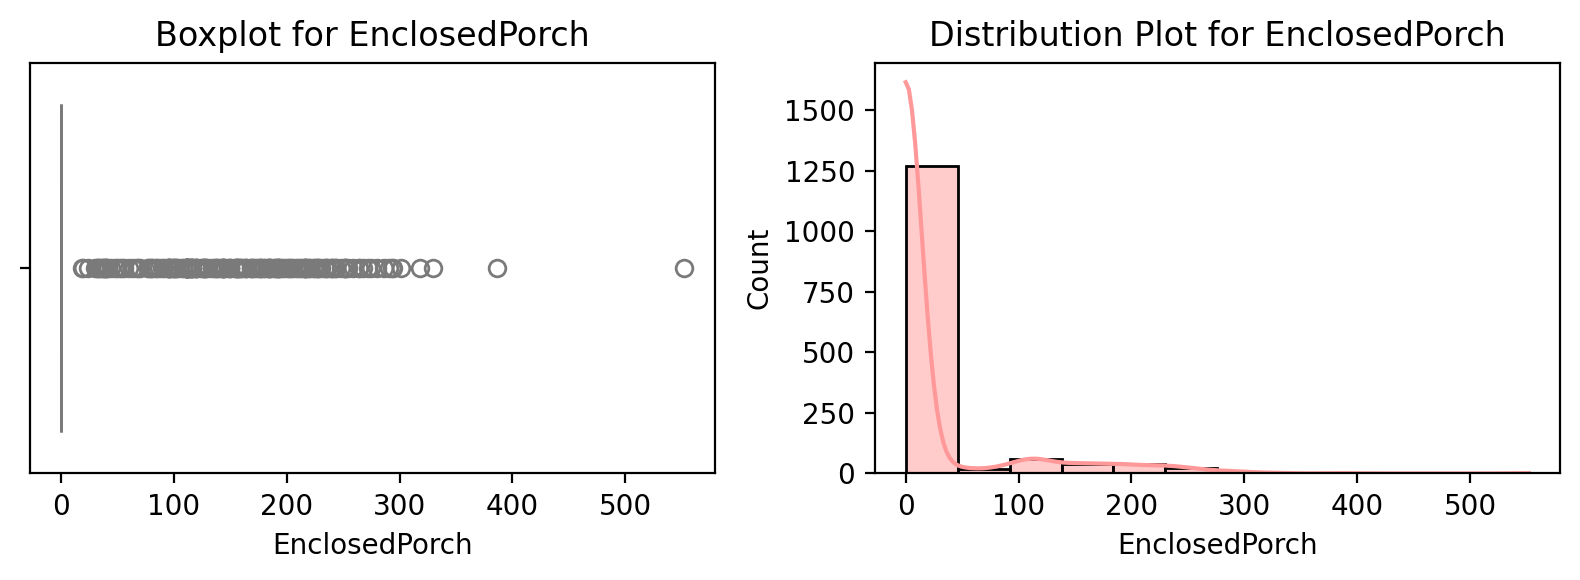

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       552.000000
Name: EnclosedPorch, dtype: float64 0      0
1      0
2      0
3    272
4      0
Name: EnclosedPorch, dtype: int64


In [172]:
combined_plot(df, 'EnclosedPorch')

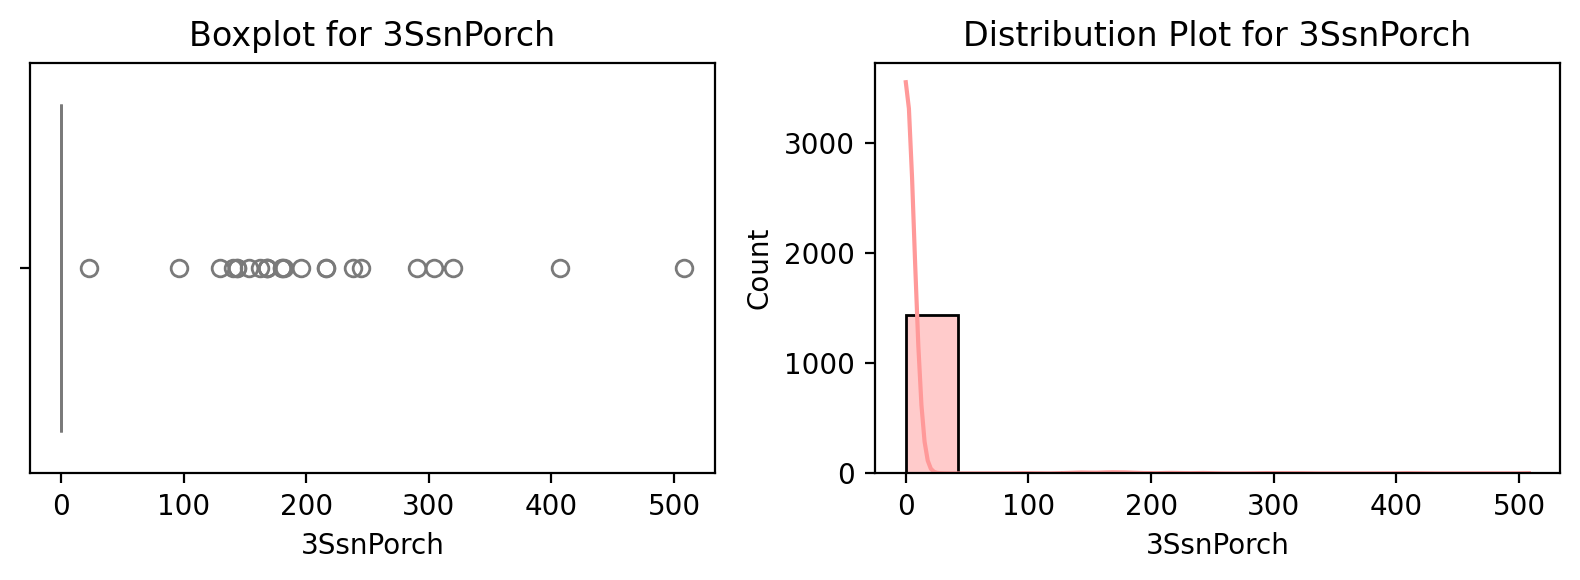

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3SsnPorch, dtype: float64 0    0
1    0
2    0
3    0
4    0
Name: 3SsnPorch, dtype: int64


In [173]:
combined_plot(df, '3SsnPorch')

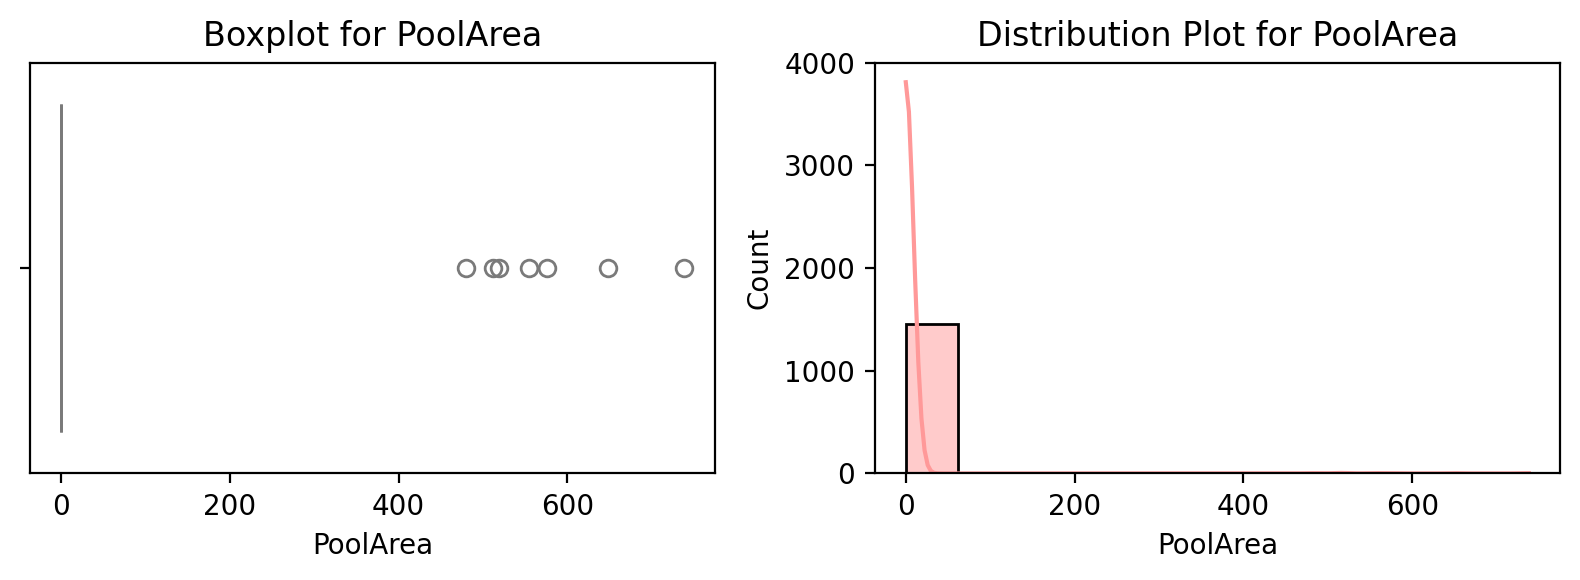

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64 0    0
1    0
2    0
3    0
4    0
Name: PoolArea, dtype: int64


In [174]:
combined_plot(df, 'PoolArea')

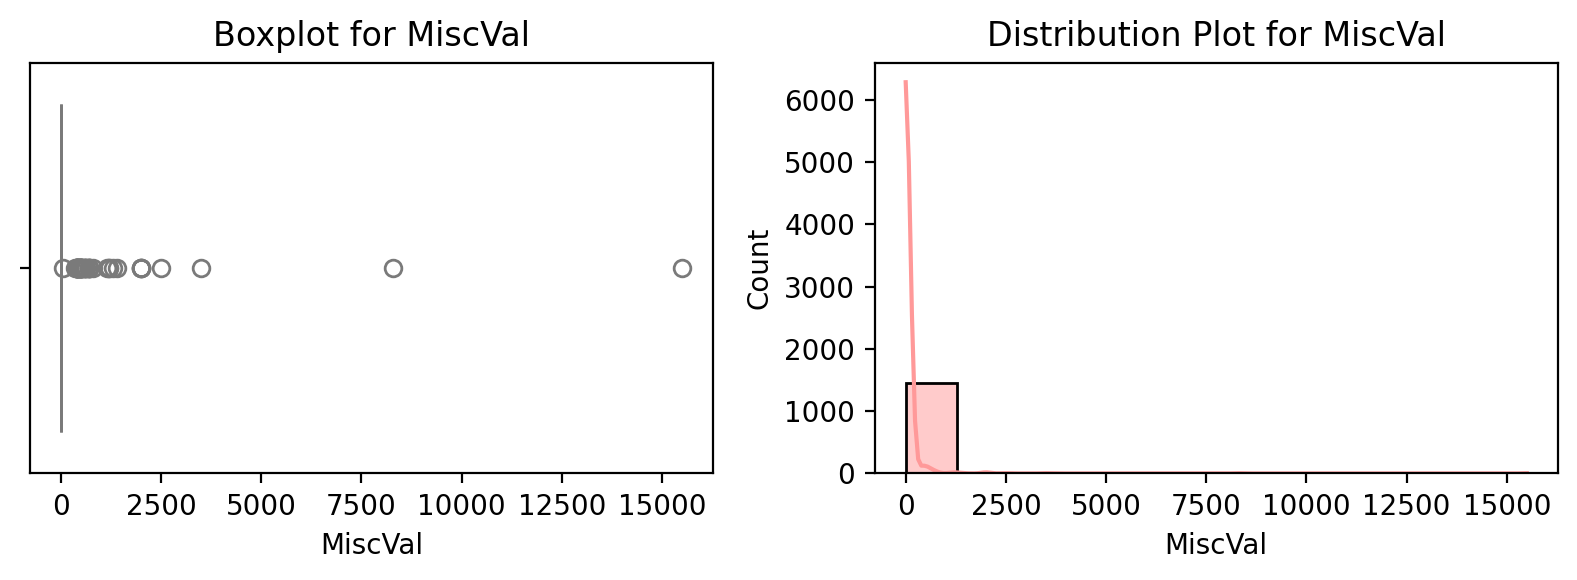

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64 0    0
1    0
2    0
3    0
4    0
Name: MiscVal, dtype: int64


In [175]:
combined_plot(df, 'MiscVal')
# drop

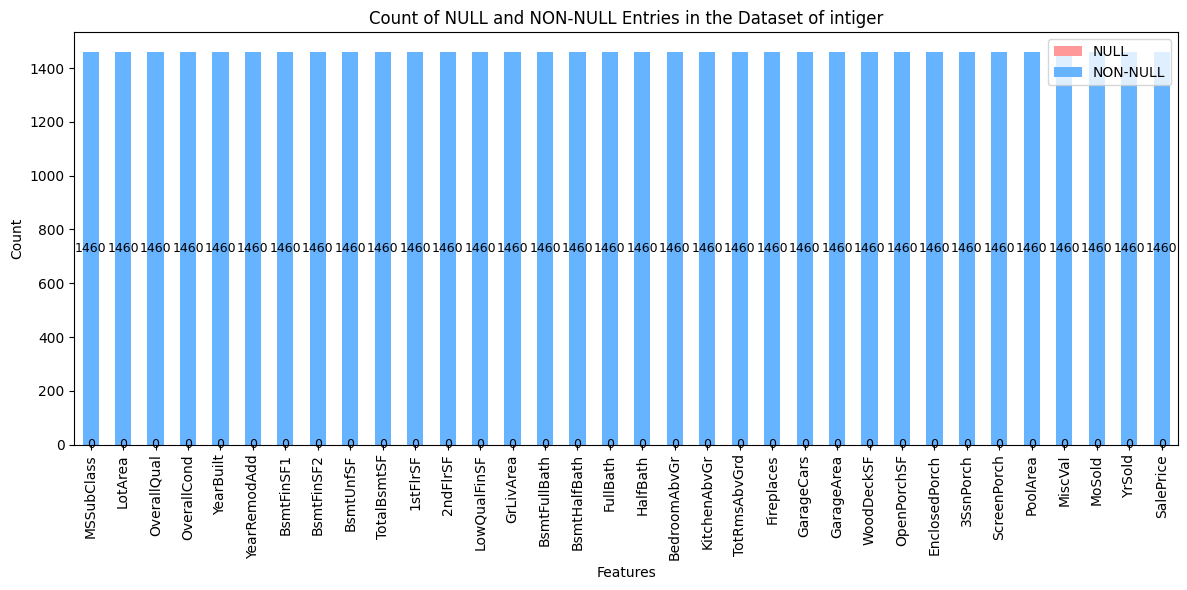

In [176]:
check_null(df[int_columns], 'intiger')

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [189]:
int_columns, float_columns, object_columns = separate_columns_by_dtype(df)

In [179]:



df_numeric = df.select_dtypes(exclude='object')

In [190]:
int_columns, float_columns, object_columns

(['Alley',
  'LandContour',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'ExterQual',
  'ExterCond',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'BsmtFinSF2',
  'HeatingQC',
  'CentralAir',
  'LowQualFinSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'KitchenQual',
  'Fireplaces',
  'FireplaceQu',
  'GarageYrBlt',
  'GarageFinish',
  'GarageCars',
  'GarageQual',
  'GarageCond',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'PoolQC',
  'Fence',
  'MiscVal',
  'MoSold',
  'YrSold',
  'SalePrice'],
 ['MSSubClass',
  'LotFrontage',
  'LotArea',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'GrLivArea',
  'TotRmsAbvGrd',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF'],
 ['MSZoning',
  'Street',
  'LotShape',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2'

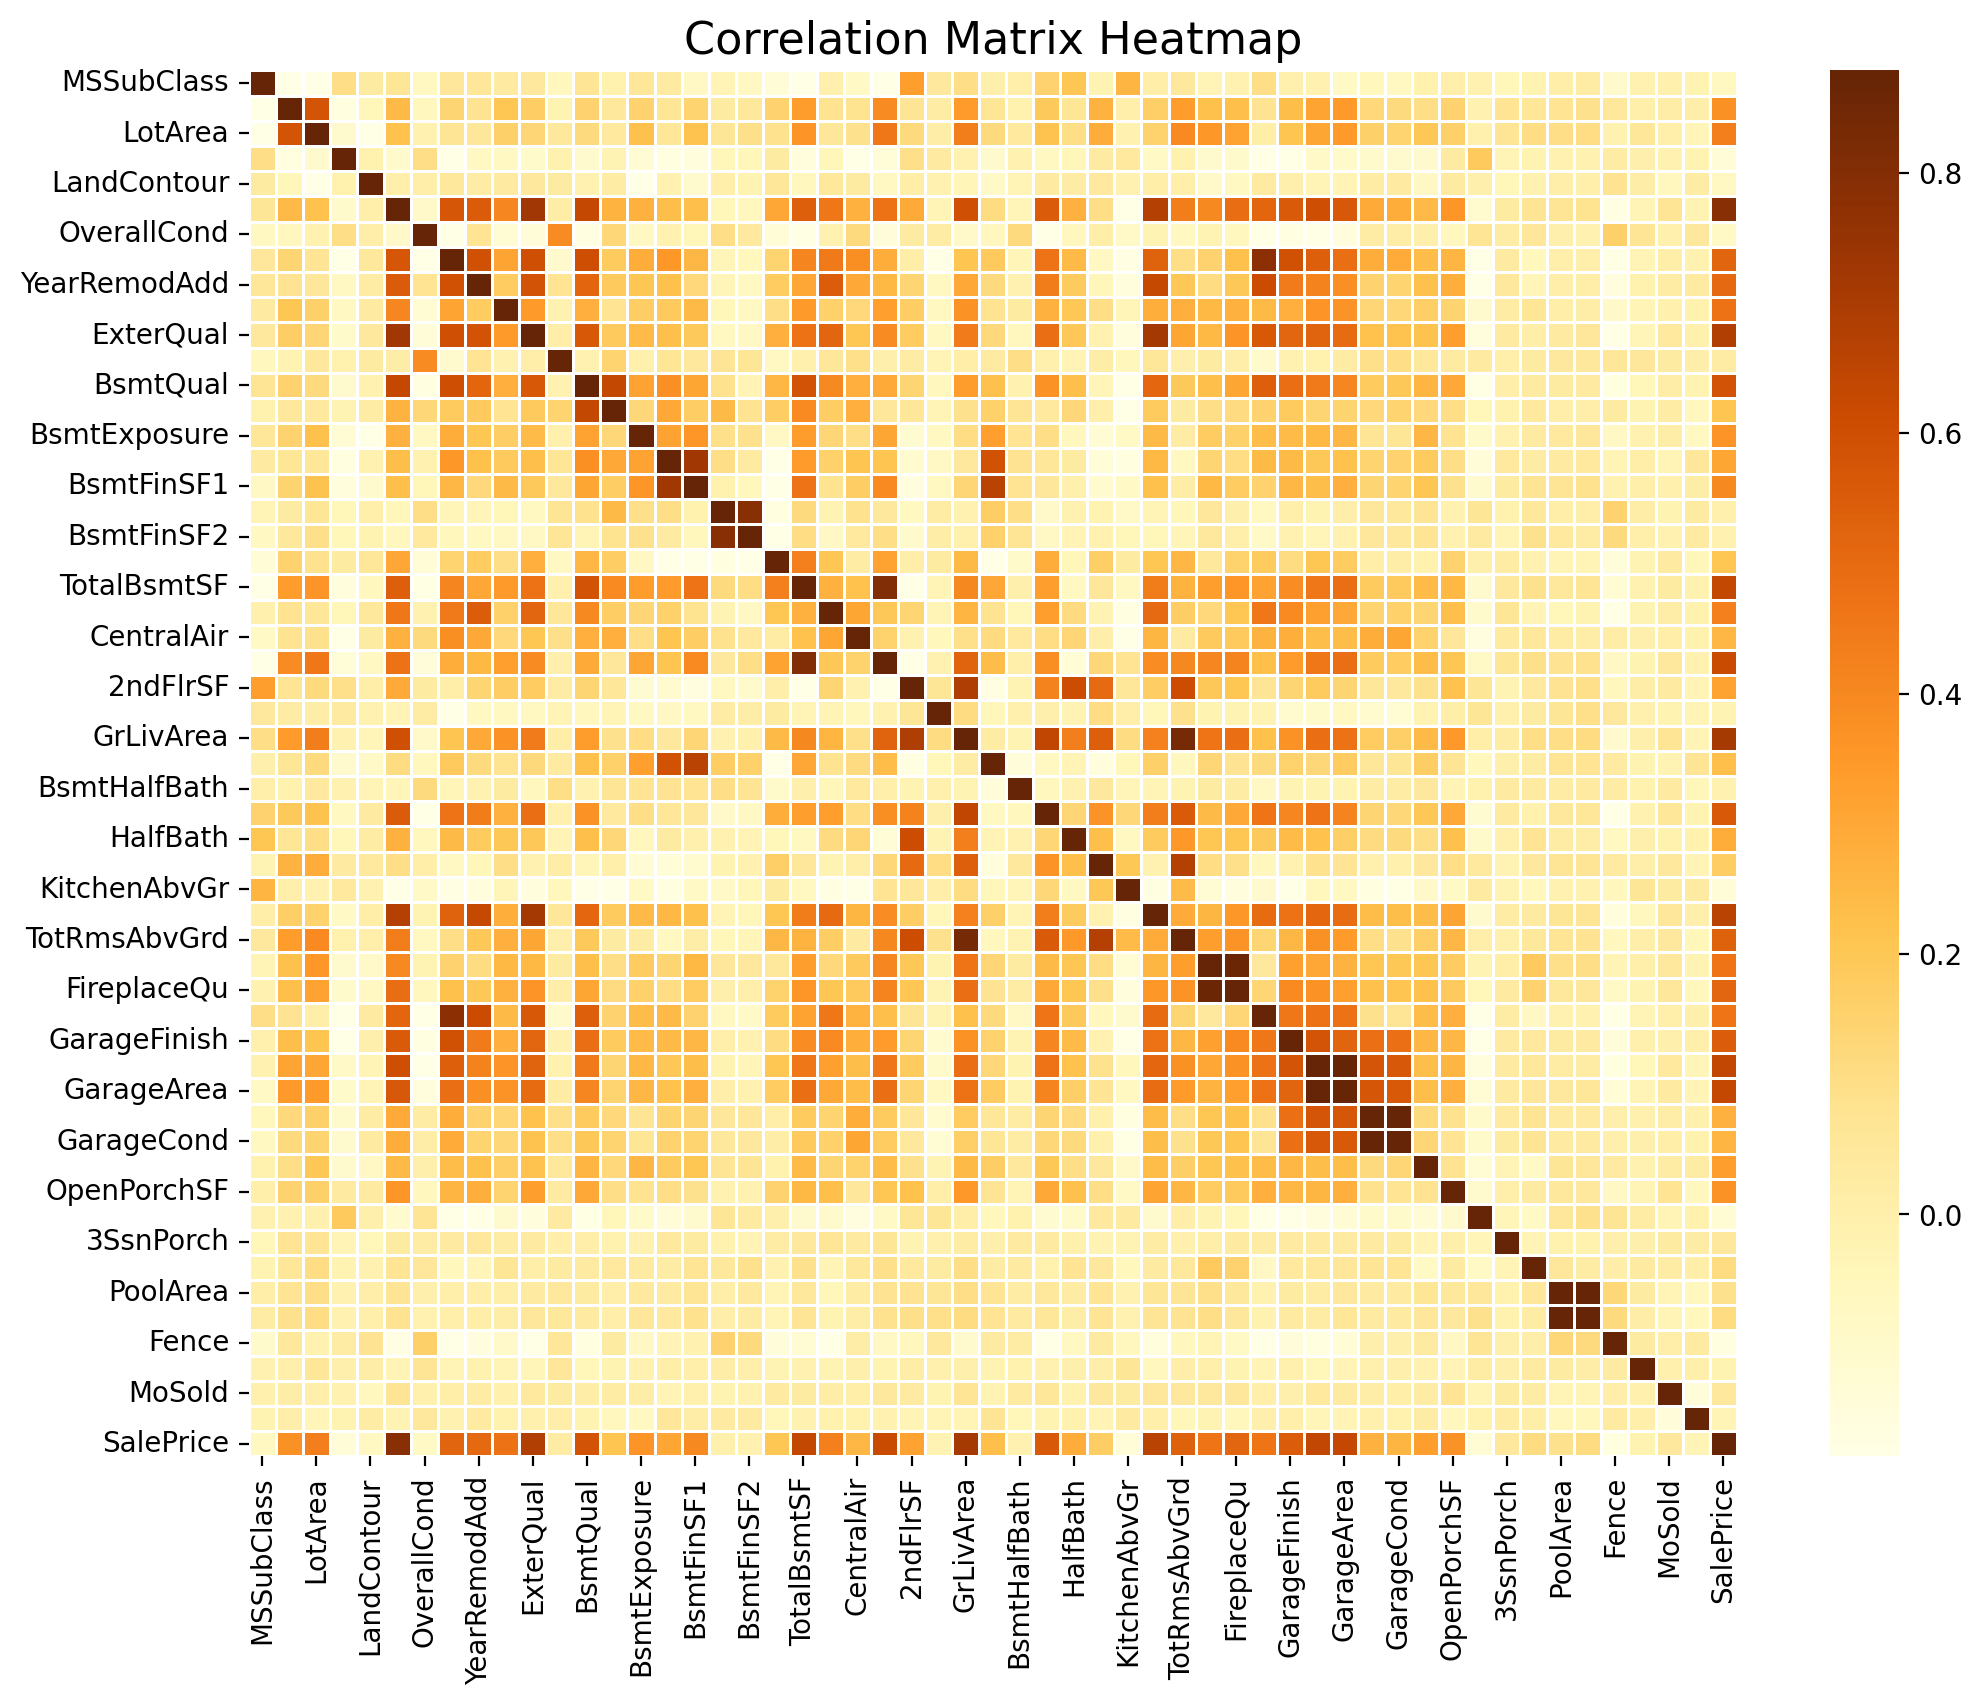

In [180]:
# Set the figure size
plt.figure(figsize=(12, 9), dpi = 200)



# Create a heatmap with annotations and custom color palette
sns.heatmap(df_numeric.corr(), cmap='YlOrBr', linewidths=0.5, robust = True)

# Set title
plt.title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

In [181]:
df

MSSubClass                 MSZoning  LotFrontage  LotArea Street  Alley  \
0           60.0  Residential Low Density         65.0   8450.0   Pave      1   
1           20.0  Residential Low Density         80.0   9600.0   Pave      1   
2           60.0  Residential Low Density         68.0  11250.0   Pave      1   
3           70.0  Residential Low Density         60.0   9550.0   Pave      1   
4           60.0  Residential Low Density         84.0  14260.0   Pave      1   
...          ...                      ...          ...      ...    ...    ...   
1455        60.0  Residential Low Density         62.0   7917.0   Pave      1   
1456        20.0  Residential Low Density         85.0  13175.0   Pave      1   
1457        70.0  Residential Low Density         66.0   9042.0   Pave      1   
1458        20.0  Residential Low Density         68.0   9717.0   Pave      1   
1459        20.0  Residential Low Density         75.0   9937.0   Pave      1   

     LotShape  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence  \
0         Reg            4    AllPub    Inside  ...        0      0     0   
1         Reg            4    AllPub       FR2  ...        0      0     0   
2         IR1            4    AllPub    Inside  ...        0      0     0   
3         IR1            4    AllPub    Corner  ...        0      0     0   
4         IR1            4    AllPub       FR2  ...        0      0     0   
...       ...          ...       ...       ...  ...      ...    ...   ...   
1455      Reg            4    AllPub    Inside  ...        0      0     0   
1456      Reg            4    AllPub    Inside  ...        0      0     3   
1457      Reg            4    AllPub    Inside  ...        0      0     4   
1458      Reg            4    AllPub    Inside  ...        0      0     0   
1459      Reg            4    AllPub    Inside  ...        0      0     0   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0           None       0      2    2008        WD         Normal     208500  
1           None       0      5    2007        WD         Normal     181500  
2           None       0      9    2008        WD         Normal     223500  
3           None       0      2    2006        WD        Abnorml     140000  
4           None       0     12    2008        WD         Normal     250000  
...          ...     ...    ...     ...       ...            ...        ...  
1455        None       0      8    2007        WD         Normal     175000  
1456        None       0      2    2010        WD         Normal     210000  
1457        Shed    2500      5    2010        WD         Normal     266500  
1458        None       0      4    2010        WD         Normal     142125  
1459        None       0      6    2008        WD         Normal     147500  

[1460 rows x 80 columns]

### feature selection

In [182]:
# List of columns to drop
drop_list = [
'Street',
'Utilities',
'Condition2',
'RoofMatl',
'MasVnrType',
'Heating',
'Electrical',
'BsmtFinSF2',
'MiscVal'
]

df_excluded = df.drop(columns=drop_list, errors='ignore')

# df_excluded = df.copy()

In [183]:
df_excluded.shape

(1460, 71)

In [184]:
# df_excluded.to_csv('trainning_set_drop.csv', index= False)

# 4. Section

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_excluded = pd.get_dummies(df_excluded, drop_first = True)
# Split the DataFrame into features (X) and target (y)
X = df_excluded.drop(['SalePrice'], axis=1)  # Drop the target column to create features
y = df_excluded['SalePrice']                   # Target variable

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

std = StandardScaler()


X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [186]:
# feature importance with random forest

In [187]:
X_train_std.shape

(1314, 178)

In [188]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score

# Step 1: Define objective function for Optuna
def objective(trial):
    # Step 2: Define hyperparameters to optimize
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    # Step 3: Initialize Random Forest with sampled hyperparameters
    regressor = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Step 4: Fit the model and make predictions
    regressor.fit(X_train_std, y_train)
    y_pred = regressor.predict(X_test_std)
    
    # Step 5: Calculate RMSE
    rmse = mean_squared_error(y_test, y_pred, squared=False)  # squared=False gives RMSE directly
    return rmse

# Create study object
study = optuna.create_study(direction="minimize")

# Run optimization process
study.optimize(objective, n_trials=20, show_progress_bar=True)

# Print best trial and best hyperparameters
print("Best trial:", study.best_trial)
print("Best hyperparameters:", study.best_params)

# Make predictions using the best model from Optuna
best_model = RandomForestRegressor(
    n_estimators=study.best_params['n_estimators'],
    max_depth=study.best_params['max_depth'],
    min_samples_split=study.best_params['min_samples_split'],
    min_samples_leaf=study.best_params['min_samples_leaf'],
    random_state=42
)

best_model.fit(X_train_std, y_train)  # Fit the model with the best parameters
y_pred = best_model.predict(X_test_std)  # Make predictions on the test set

# Calculate the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Print the metrics
print("Regression Model Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print(f"Explained Variance Score: {explained_variance:.2f}")




[I 2024-10-25 20:20:19,488] A new study created in memory with name: no-name-a77b1417-7037-4517-a21e-2c6e48ce2675


  0%|          | 0/20 [00:00<?, ?it/s]

/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:20,589] Trial 0 finished with value: 25602.93075599277 and parameters: {'n_estimators': 180, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 19}. Best is trial 0 with value: 25602.93075599277.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:20,835] Trial 1 finished with value: 25021.154945837905 and parameters: {'n_estimators': 32, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 1 with value: 25021.154945837905.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:21,276] Trial 2 finished with value: 25989.879326969218 and parameters: {'n_estimators': 75, 'max_depth': 15, 'min_samples_split': 12, 'min_samples_leaf': 20}. Best is trial 1 with value: 25021.154945837905.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:22,612] Trial 3 finished with value: 24477.14477719217 and parameters: {'n_estimators': 149, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:22,905] Trial 4 finished with value: 37753.294876852015 and parameters: {'n_estimators': 122, 'max_depth': 2, 'min_samples_split': 7, 'min_samples_leaf': 17}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:24,152] Trial 5 finished with value: 24616.53588996086 and parameters: {'n_estimators': 174, 'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:24,656] Trial 6 finished with value: 25773.30072347504 and parameters: {'n_estimators': 82, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 19}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:24,878] Trial 7 finished with value: 25207.439989783506 and parameters: {'n_estimators': 24, 'max_depth': 18, 'min_samples_split': 16, 'min_samples_leaf': 1}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:25,451] Trial 8 finished with value: 28333.348359951662 and parameters: {'n_estimators': 135, 'max_depth': 4, 'min_samples_split': 6, 'min_samples_leaf': 14}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:26,441] Trial 9 finished with value: 24692.790847516815 and parameters: {'n_estimators': 123, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 7}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:28,119] Trial 10 finished with value: 24992.243251970332 and parameters: {'n_estimators': 198, 'max_depth': 9, 'min_samples_split': 15, 'min_samples_leaf': 1}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:29,257] Trial 11 finished with value: 24700.75759975321 and parameters: {'n_estimators': 158, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 10}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:30,363] Trial 12 finished with value: 24761.273713584156 and parameters: {'n_estimators': 157, 'max_depth': 16, 'min_samples_split': 20, 'min_samples_leaf': 11}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:31,760] Trial 13 finished with value: 24685.700797920497 and parameters: {'n_estimators': 163, 'max_depth': 12, 'min_samples_split': 14, 'min_samples_leaf': 5}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:33,253] Trial 14 finished with value: 24656.279912638314 and parameters: {'n_estimators': 200, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 9}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:33,862] Trial 15 finished with value: 25279.181767431543 and parameters: {'n_estimators': 91, 'max_depth': 20, 'min_samples_split': 20, 'min_samples_leaf': 13}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:35,173] Trial 16 finished with value: 24489.475586276072 and parameters: {'n_estimators': 141, 'max_depth': 14, 'min_samples_split': 8, 'min_samples_leaf': 4}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:36,398] Trial 17 finished with value: 24564.495166961173 and parameters: {'n_estimators': 137, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:37,445] Trial 18 finished with value: 24544.42249388703 and parameters: {'n_estimators': 109, 'max_depth': 13, 'min_samples_split': 9, 'min_samples_leaf': 3}. Best is trial 3 with value: 24477.14477719217.


/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[I 2024-10-25 20:20:37,820] Trial 19 finished with value: 25473.16383109171 and parameters: {'n_estimators': 54, 'max_depth': 7, 'min_samples_split': 5, 'min_samples_leaf': 7}. Best is trial 3 with value: 24477.14477719217.
Best trial: FrozenTrial(number=3, state=1, values=[24477.14477719217], datetime_start=datetime.datetime(2024, 10, 25, 20, 20, 21, 277543), datetime_complete=datetime.datetime(2024, 10, 25, 20, 20, 22, 612256), params={'n_estimators': 149, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=200, log=False, low=10, step=1), 'max_depth': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_split': IntDistribution(high=20, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=20, log=False, low=1, step=1)}, trial_id=3, value=None)
Best hyperparameters: {'n_estimators': 149, 'max_depth': 17, 'min_samples_split': 10, 'min_samp

/Users/ghanshyamsingh/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:508: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
# Define columns for each type of transformation
simple_imputer_cols = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1']
one_hot_encoding_cols = [
    'MSZoning', 'Alley', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType', 'Exterior2nd', 'Foundation',
    'Heating', 'CentralAir', 'GarageType', 'Fence', 'MiscFeature', 'Electrical'
]
ordinal_encoding_cols = [
    'Street', 'LotShape', 'LandContour', 'LotConfig', 'Utilities', 'Condition1', 
    'Condition2', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
    'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC'
]

# Create transformers
simple_imputer = SimpleImputer(strategy='mean')
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')
ordinal_encoder = OrdinalEncoder()

# Define ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('simple_imputer', simple_imputer, simple_imputer_cols),
        ('one_hot_encoder', one_hot_encoder, one_hot_encoding_cols),
        ('ordinal_encoder', ordinal_encoder, ordinal_encoding_cols)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Example pipeline with a regressor, e.g., RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler()),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Split the data (replace df and target with your actual DataFrame and target variable)
X = df_excluded.drop(columns=['SalePrice'])  # Drop the target column
y = df_excluded['SalePrice']                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model (example: RMSE)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')


ValueError: A given column is not a column of the dataframe